In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

from astropy.table import Table

%matplotlib notebook

In [2]:
dat = Table.read('ZTF_CV_lcs_adamamiller.fit')
df = dat.to_pandas()

<IPython.core.display.Javascript object>


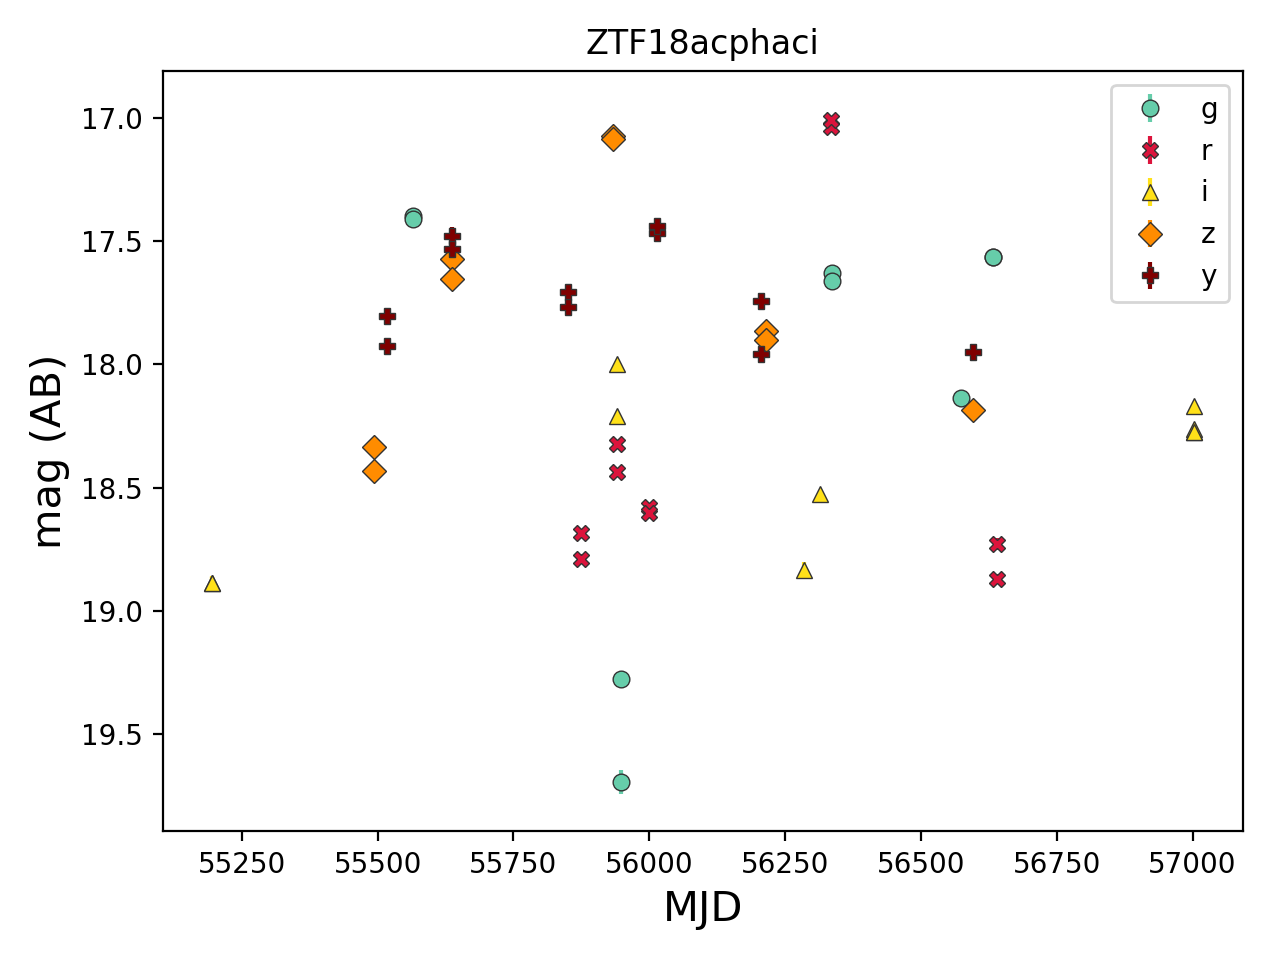

<IPython.core.display.Javascript object>


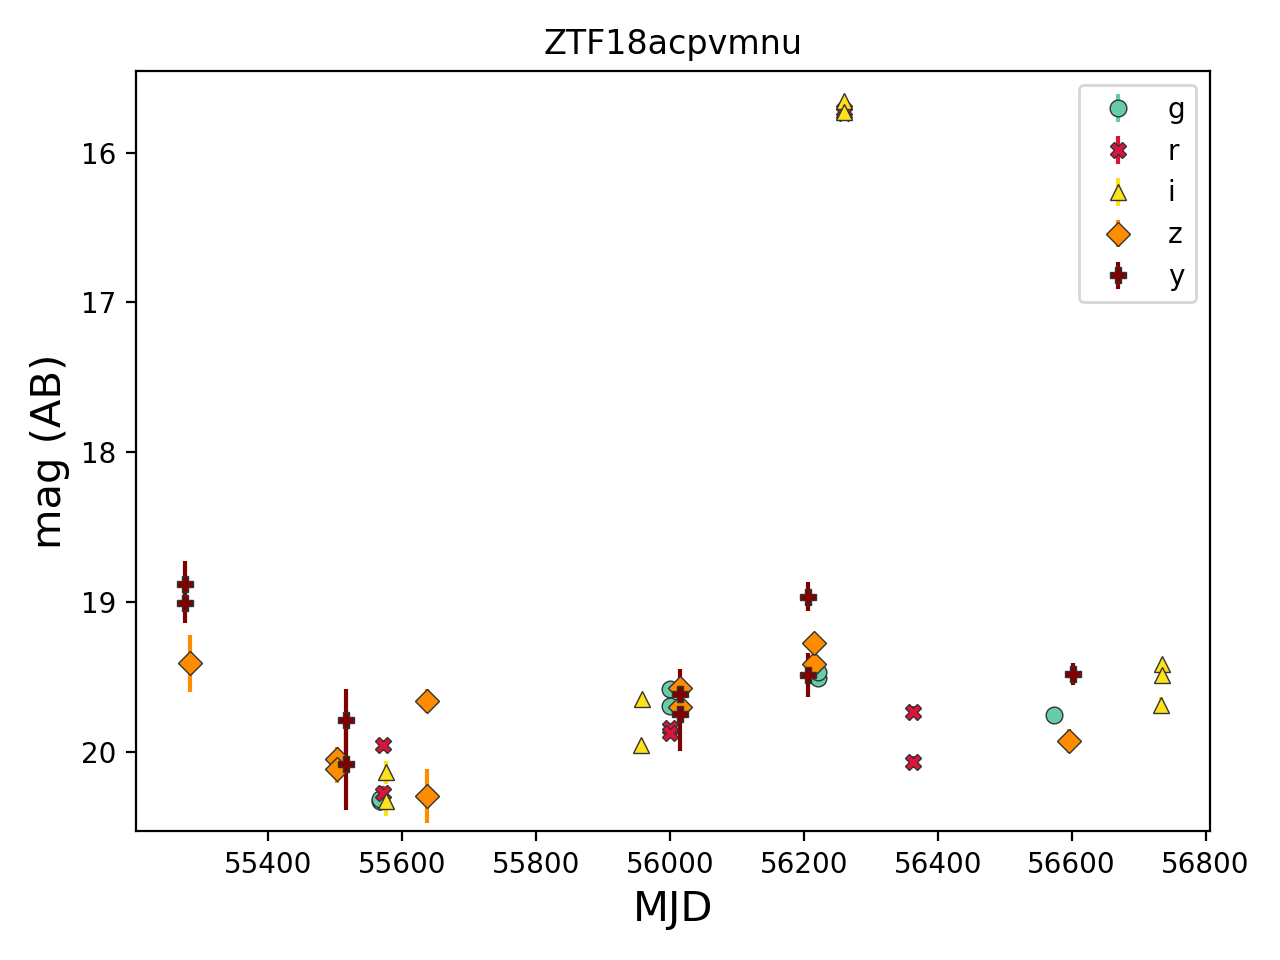

<IPython.core.display.Javascript object>


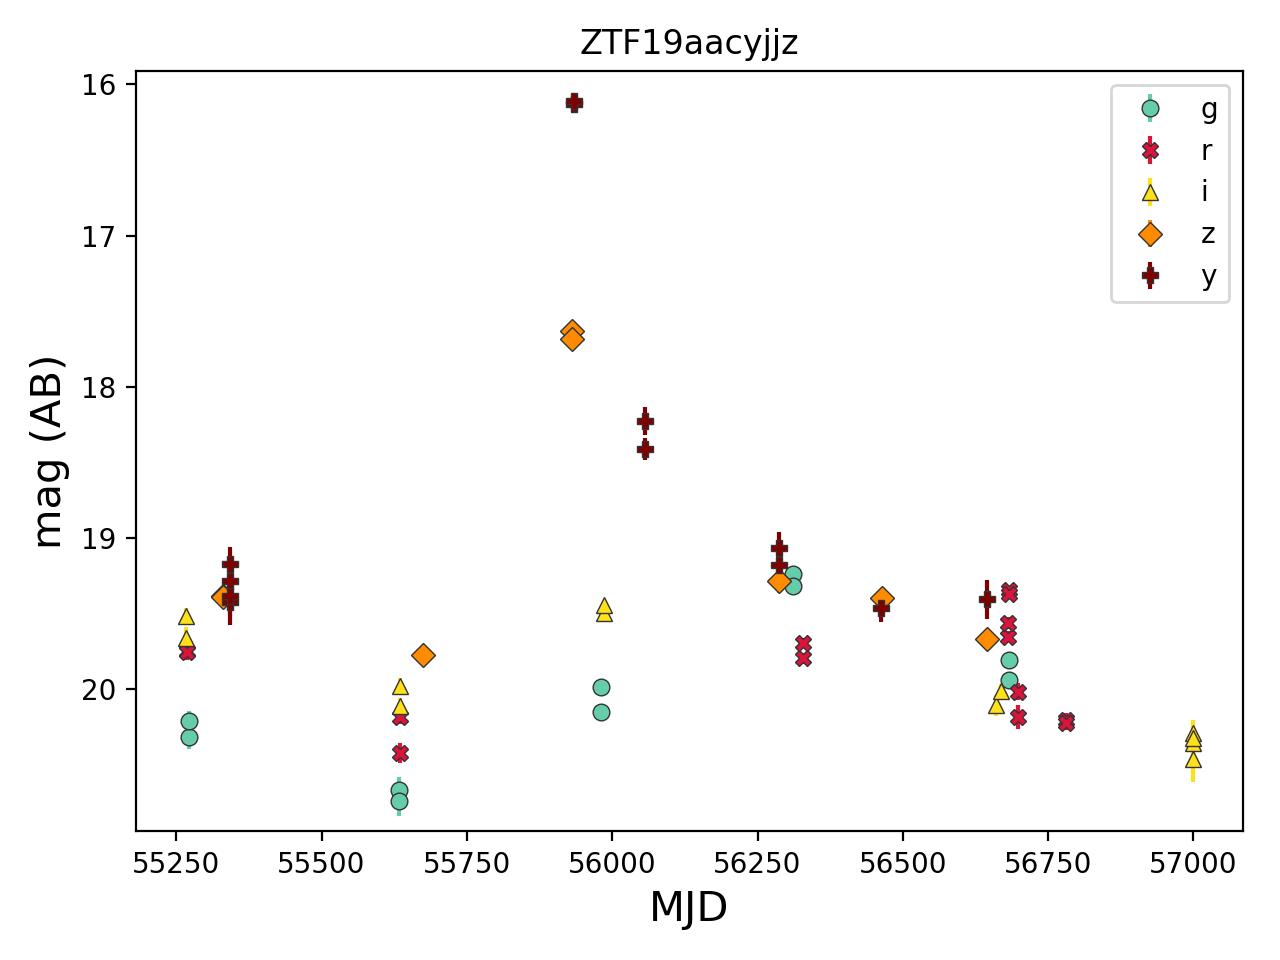

<IPython.core.display.Javascript object>


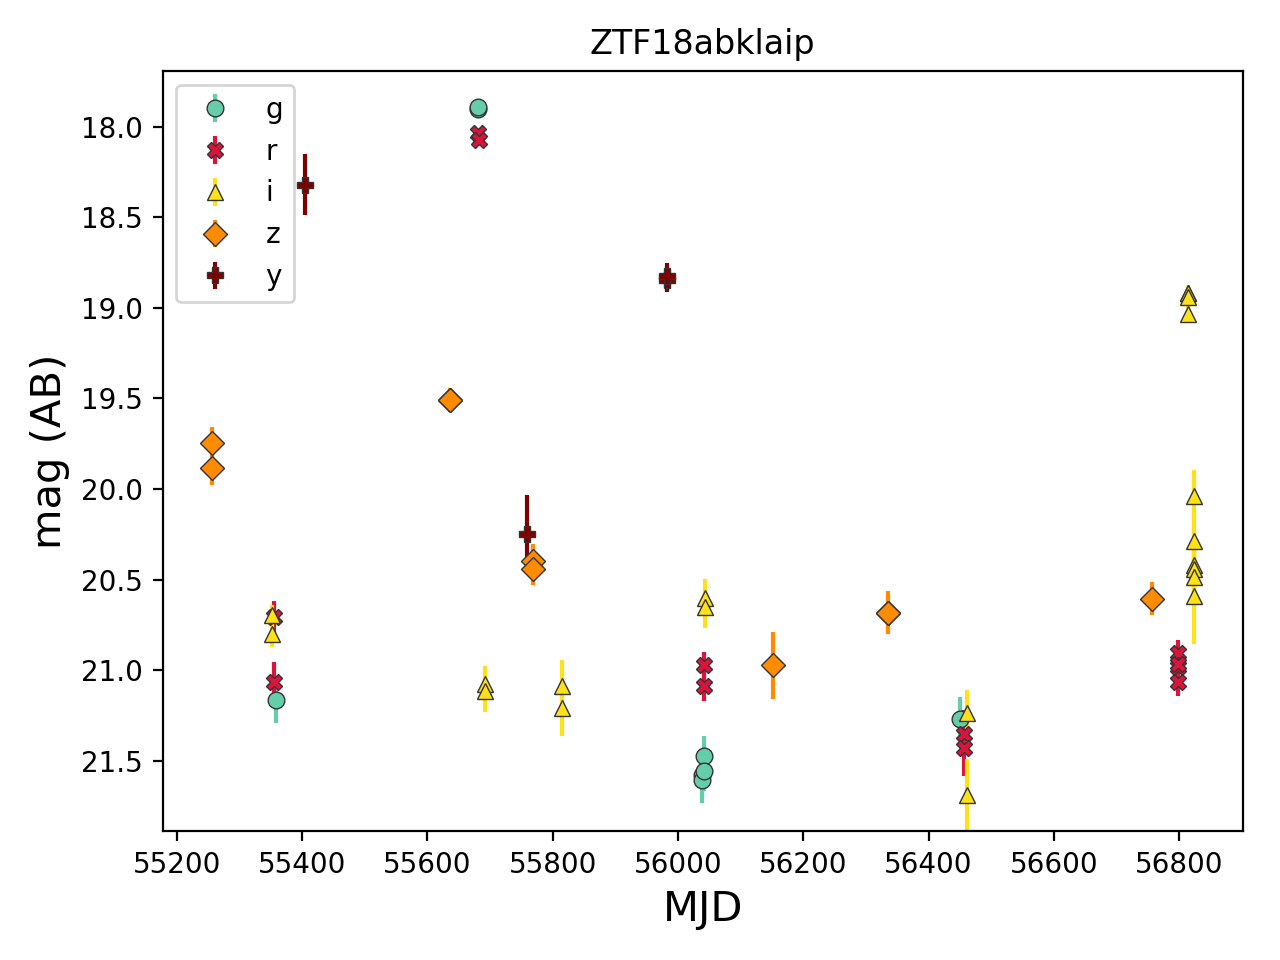

<IPython.core.display.Javascript object>


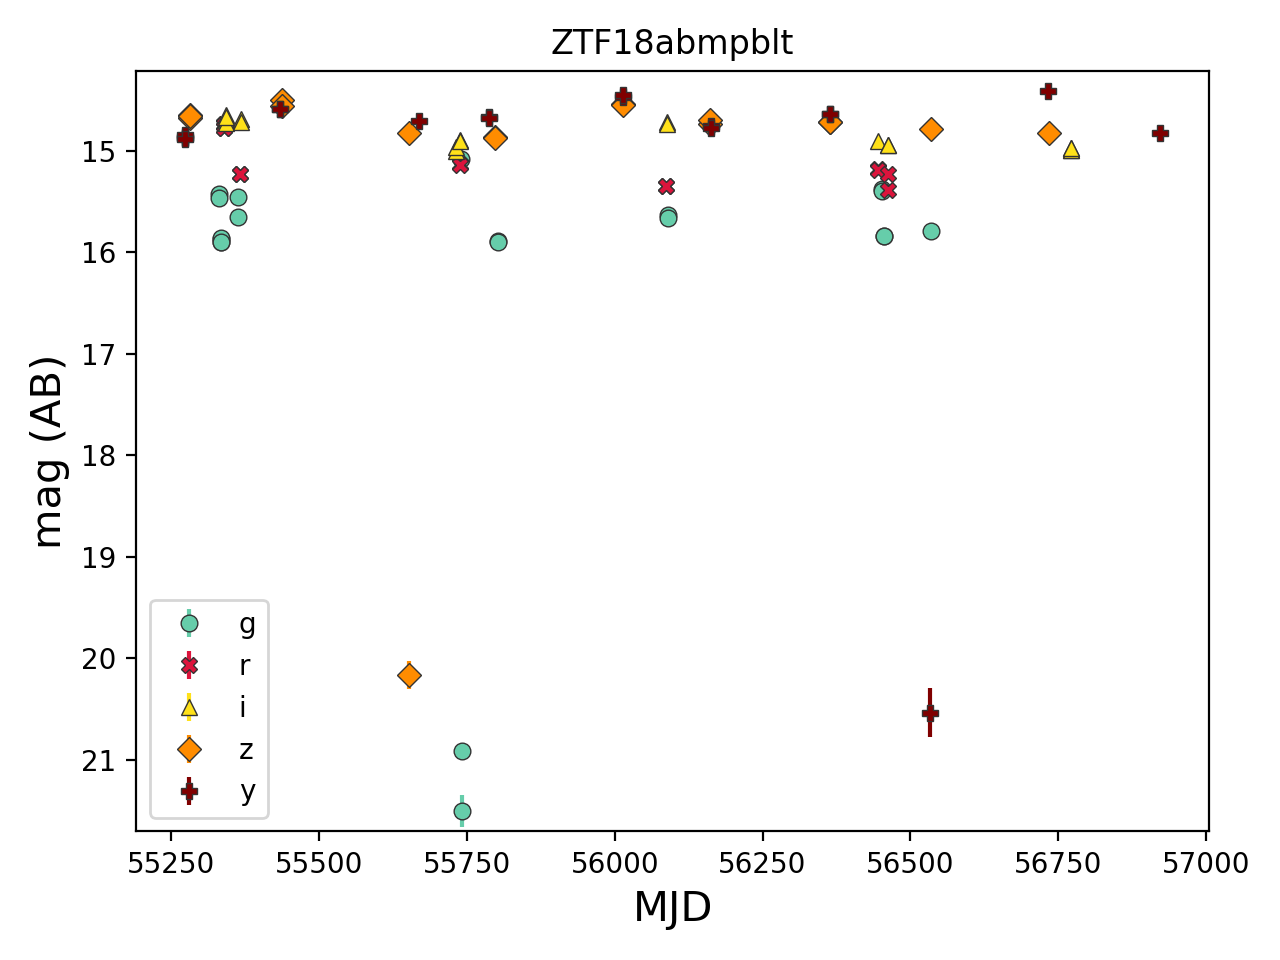

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


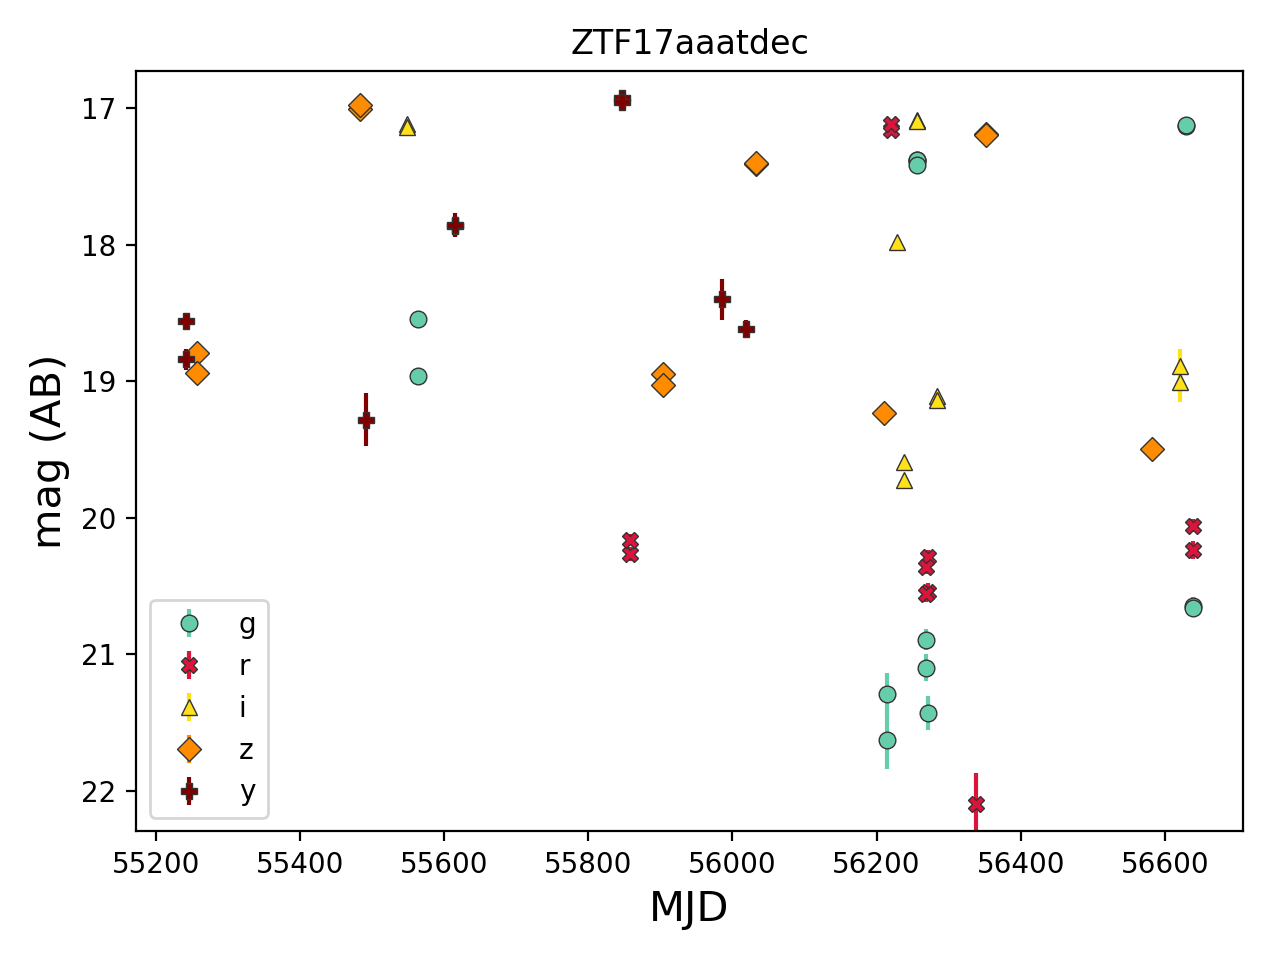

<IPython.core.display.Javascript object>


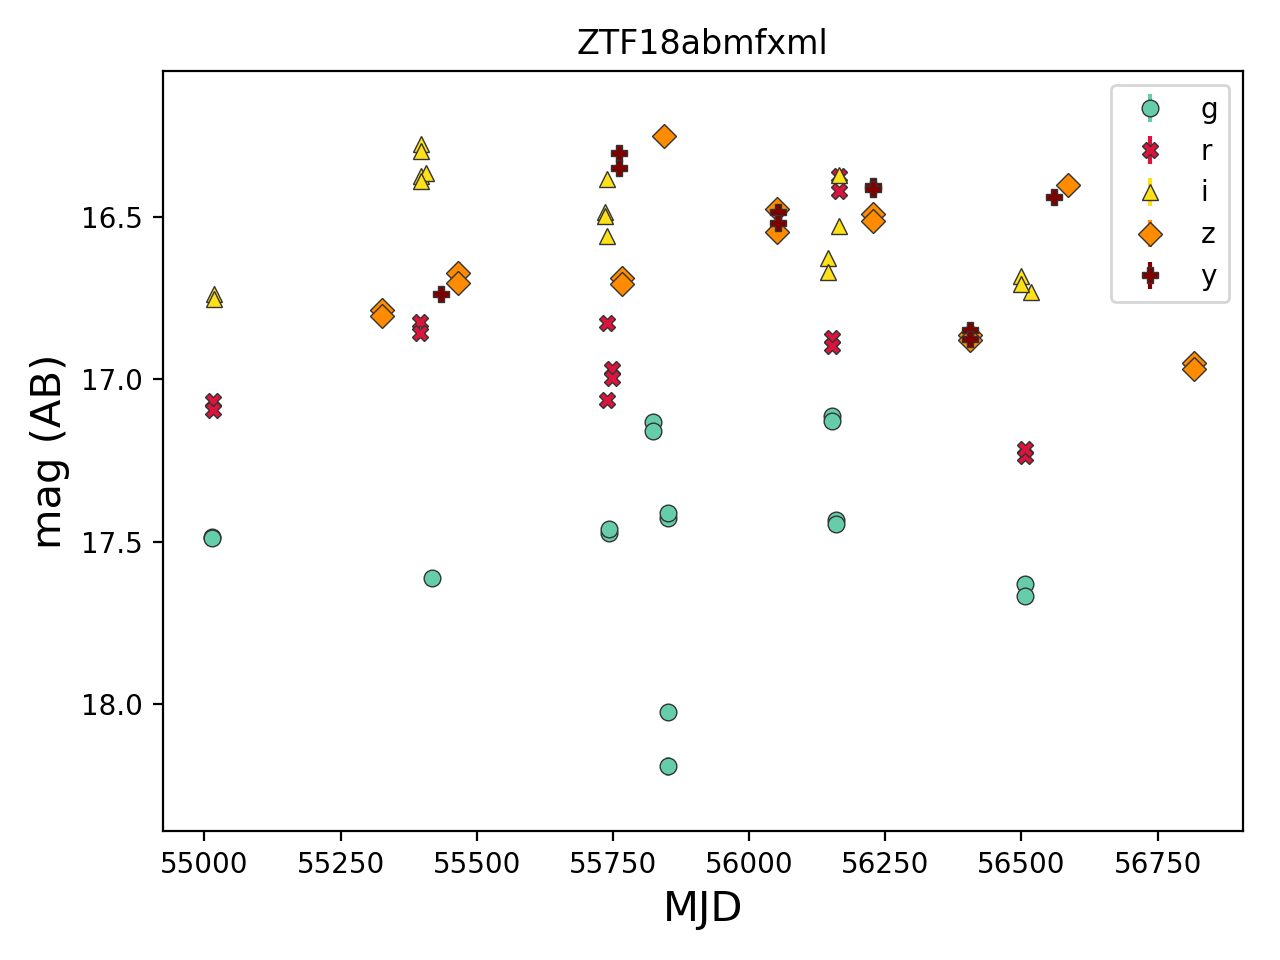

<IPython.core.display.Javascript object>


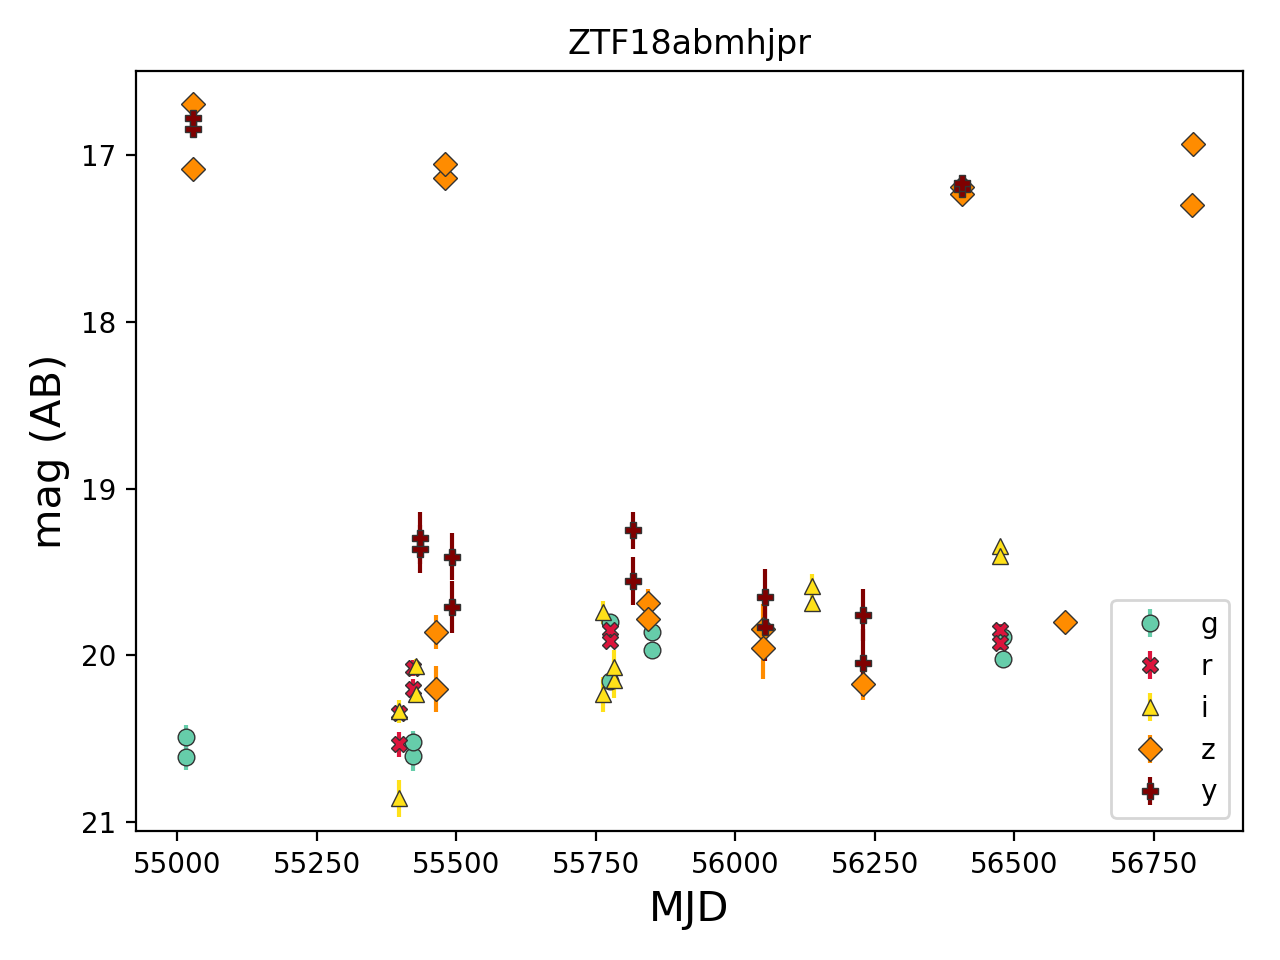

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


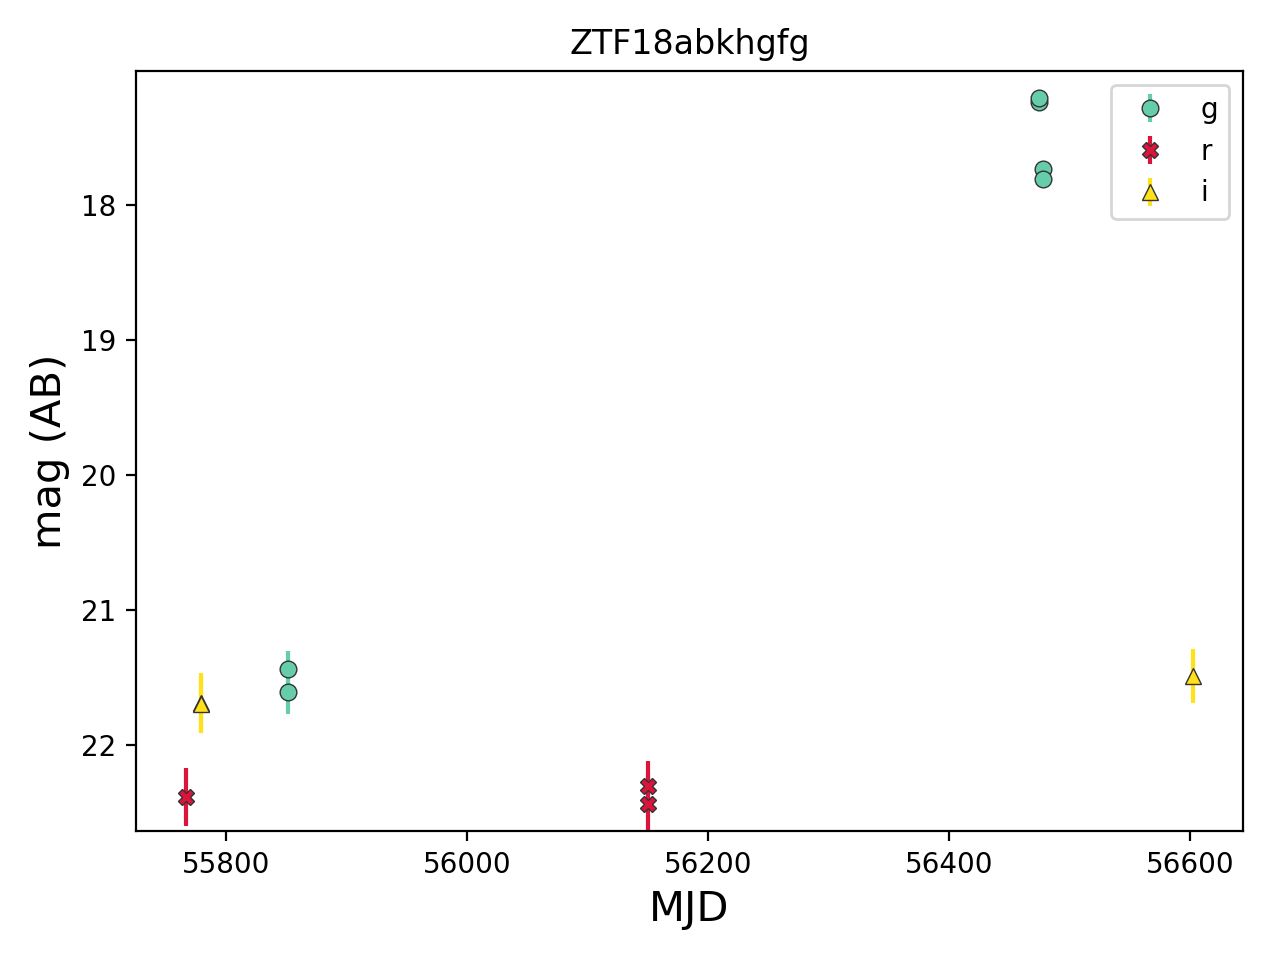

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


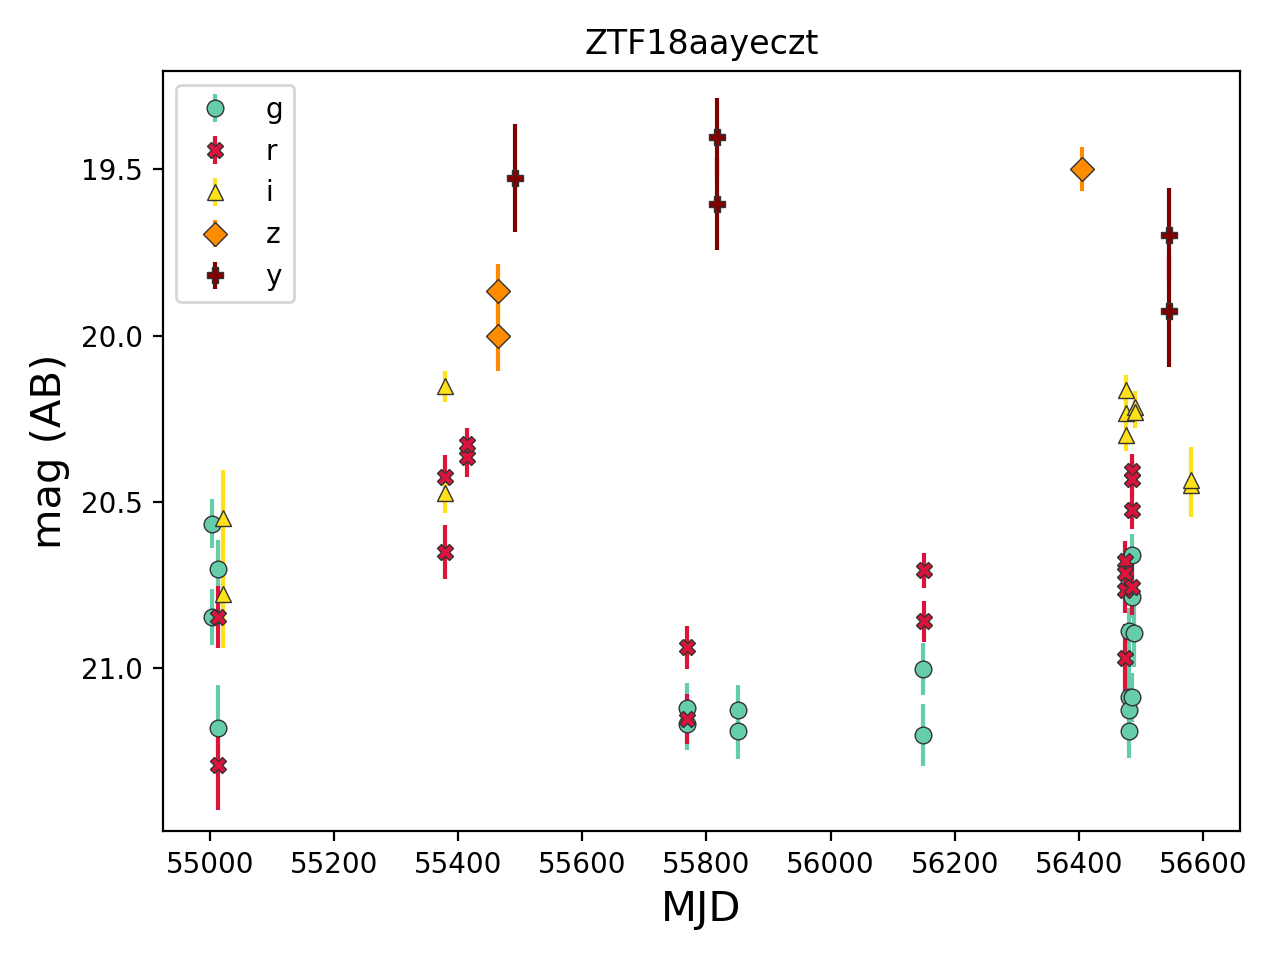

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


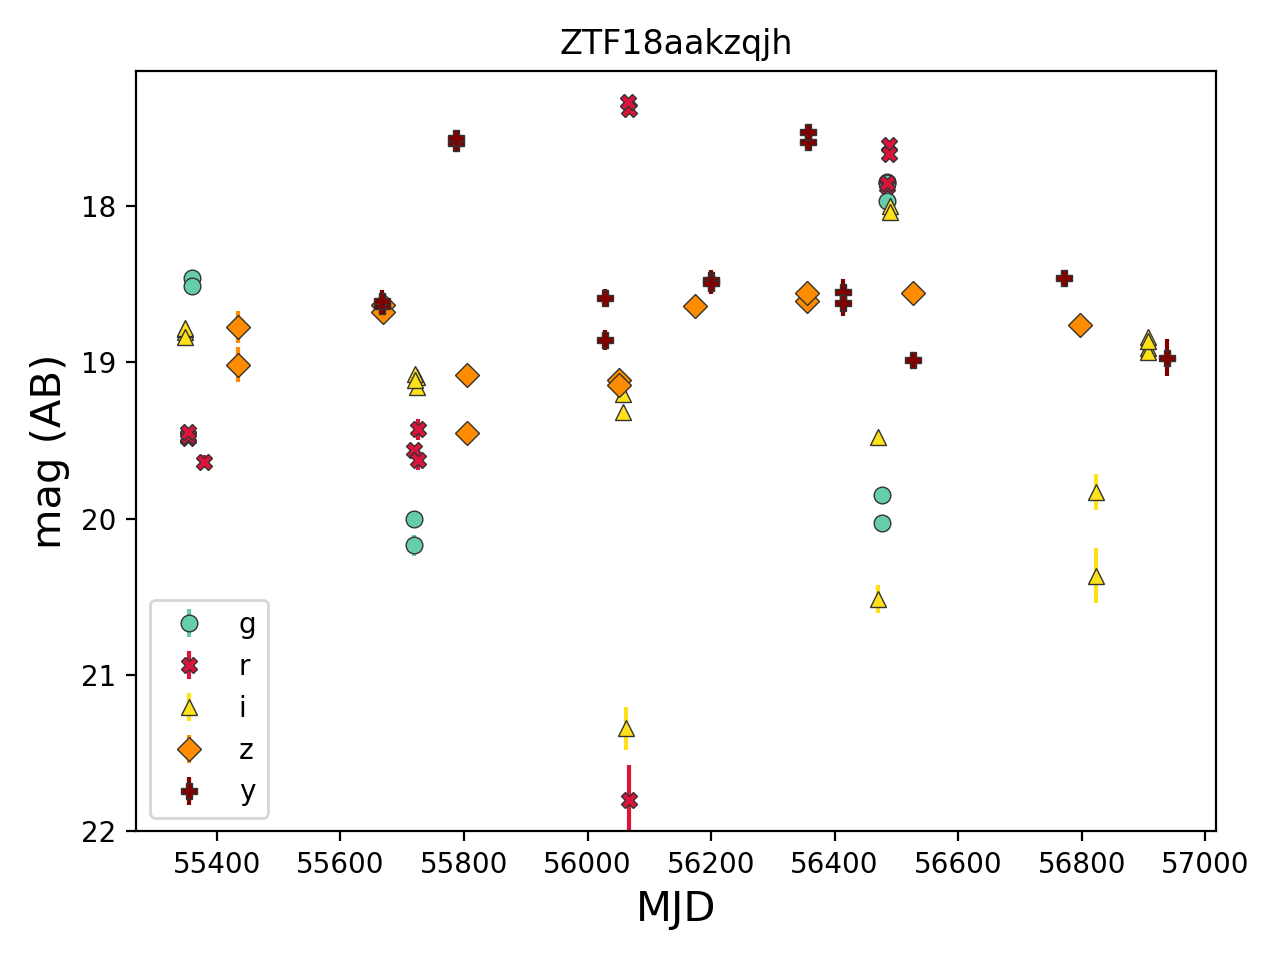

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


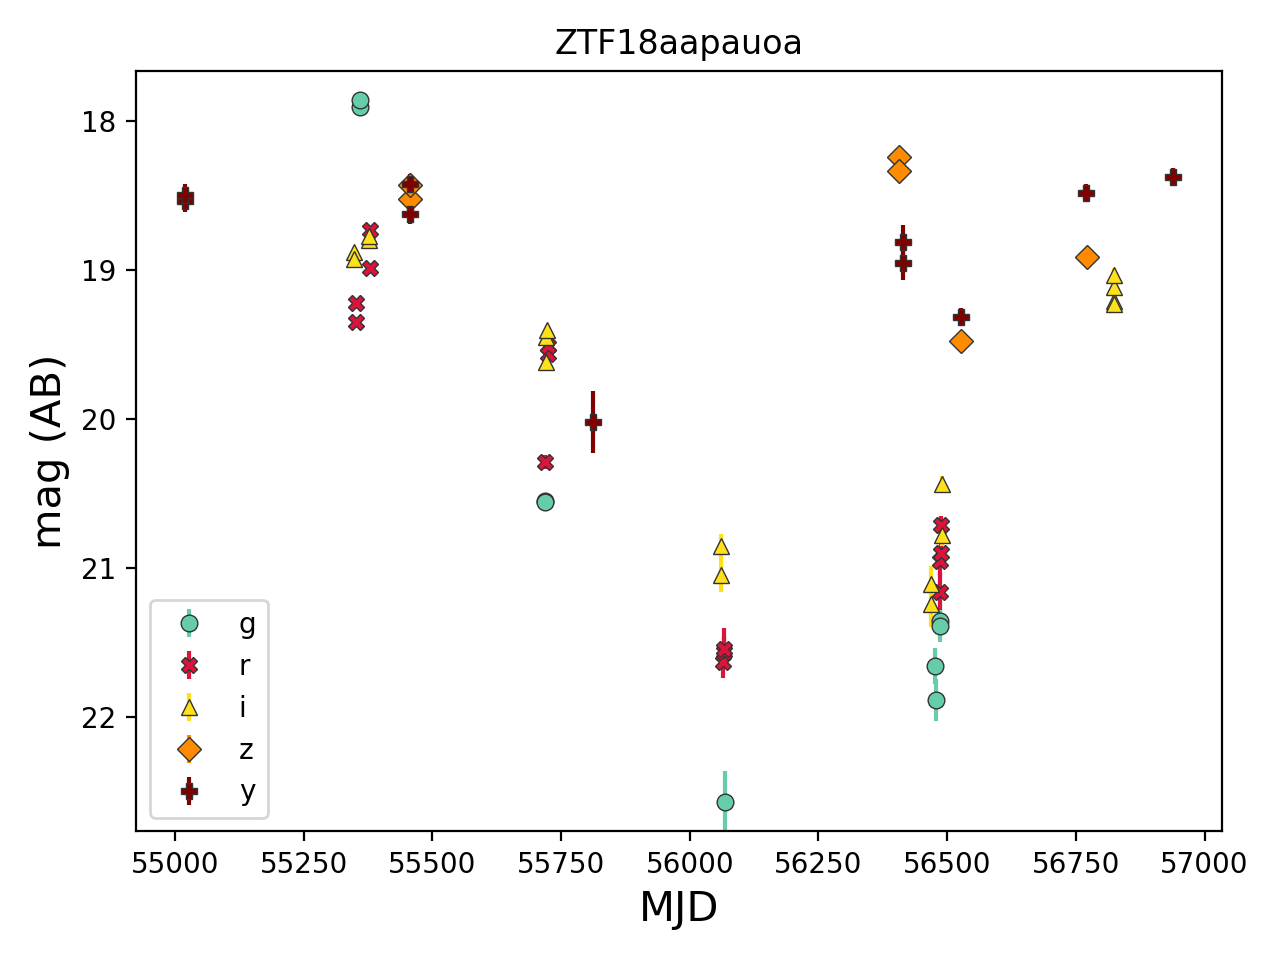

<IPython.core.display.Javascript object>


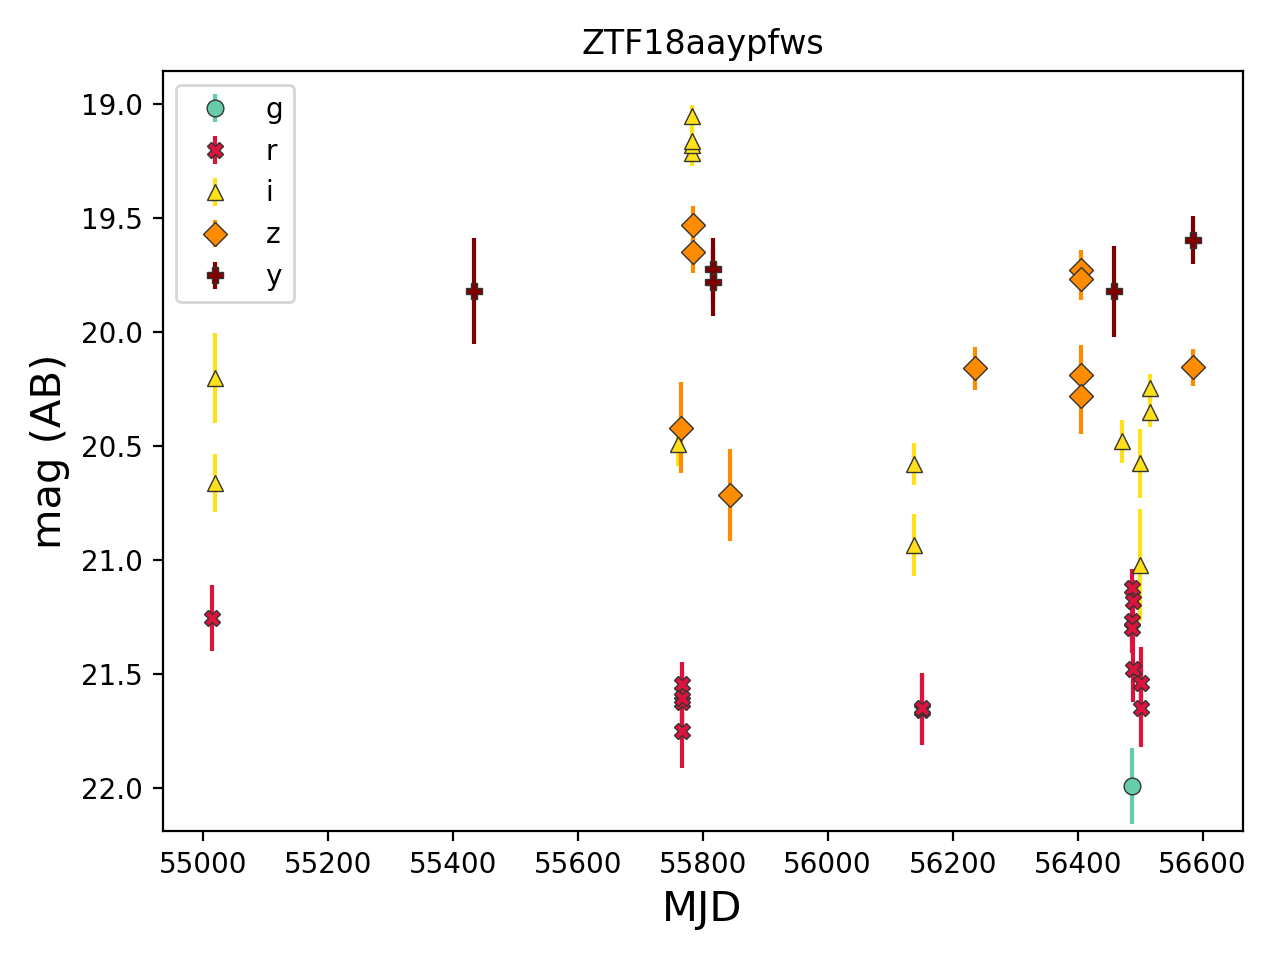

/Users/adamamiller/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


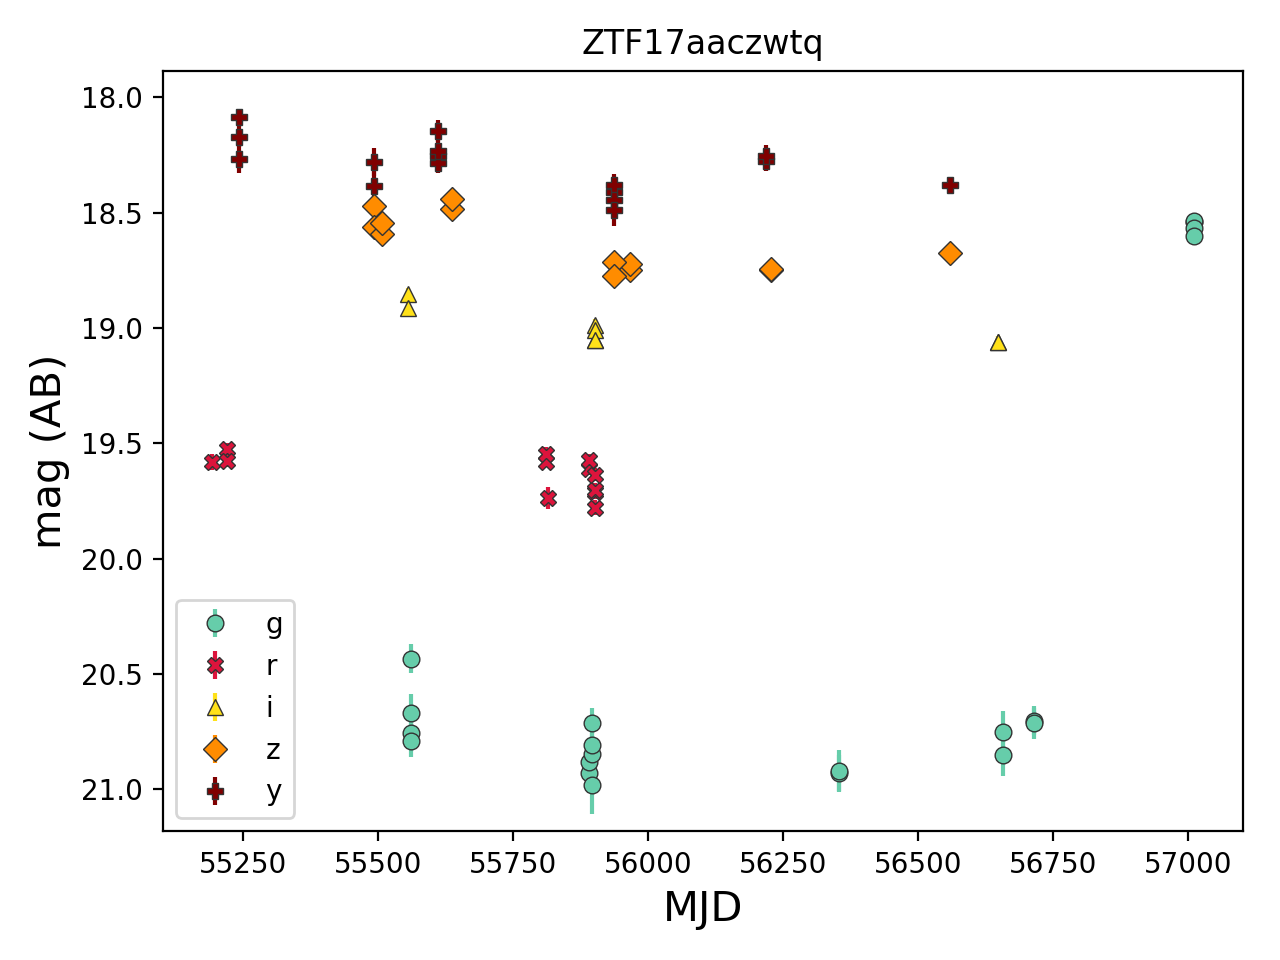

<IPython.core.display.Javascript object>


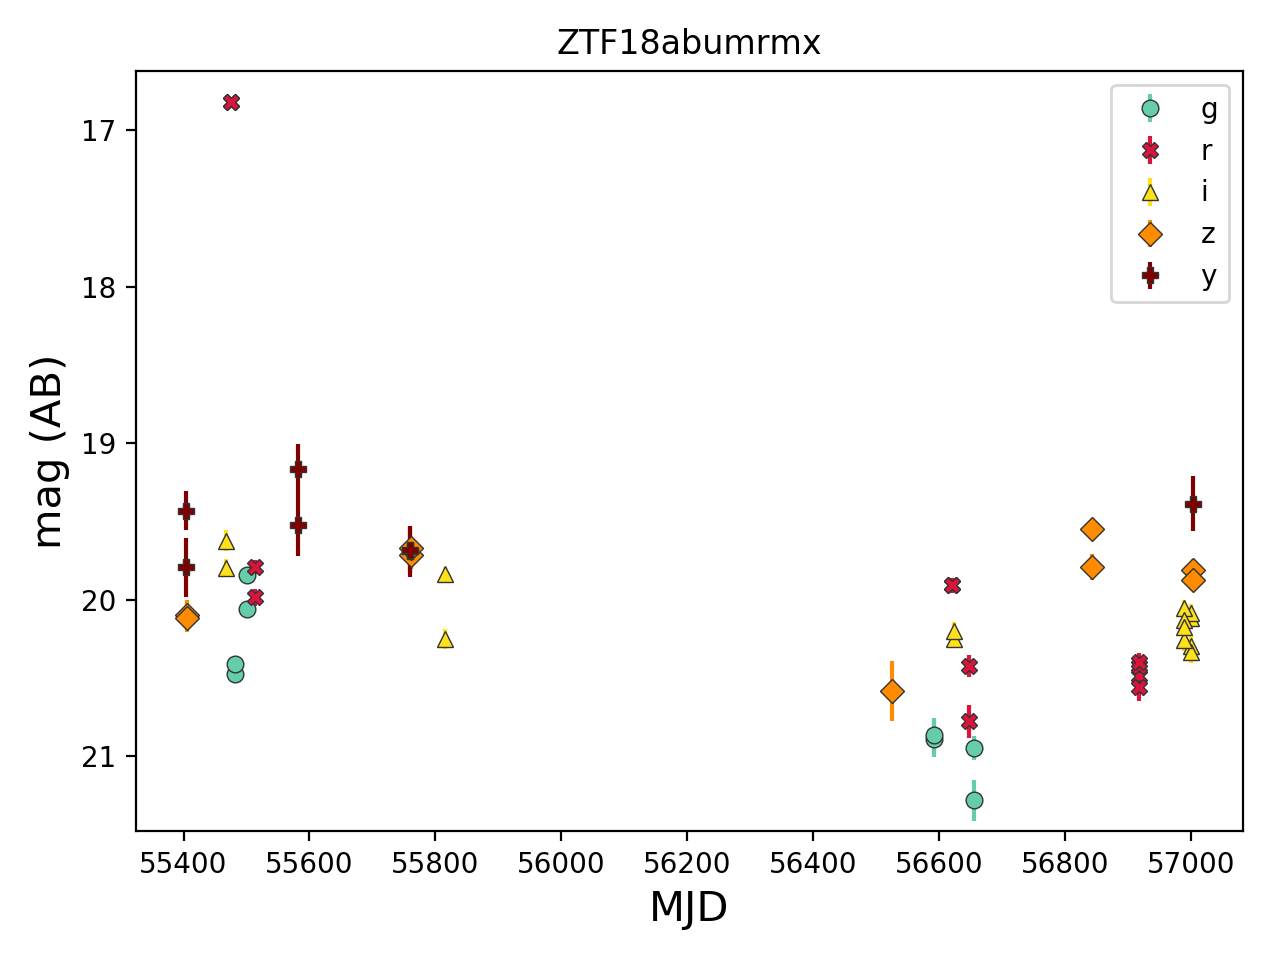

<IPython.core.display.Javascript object>


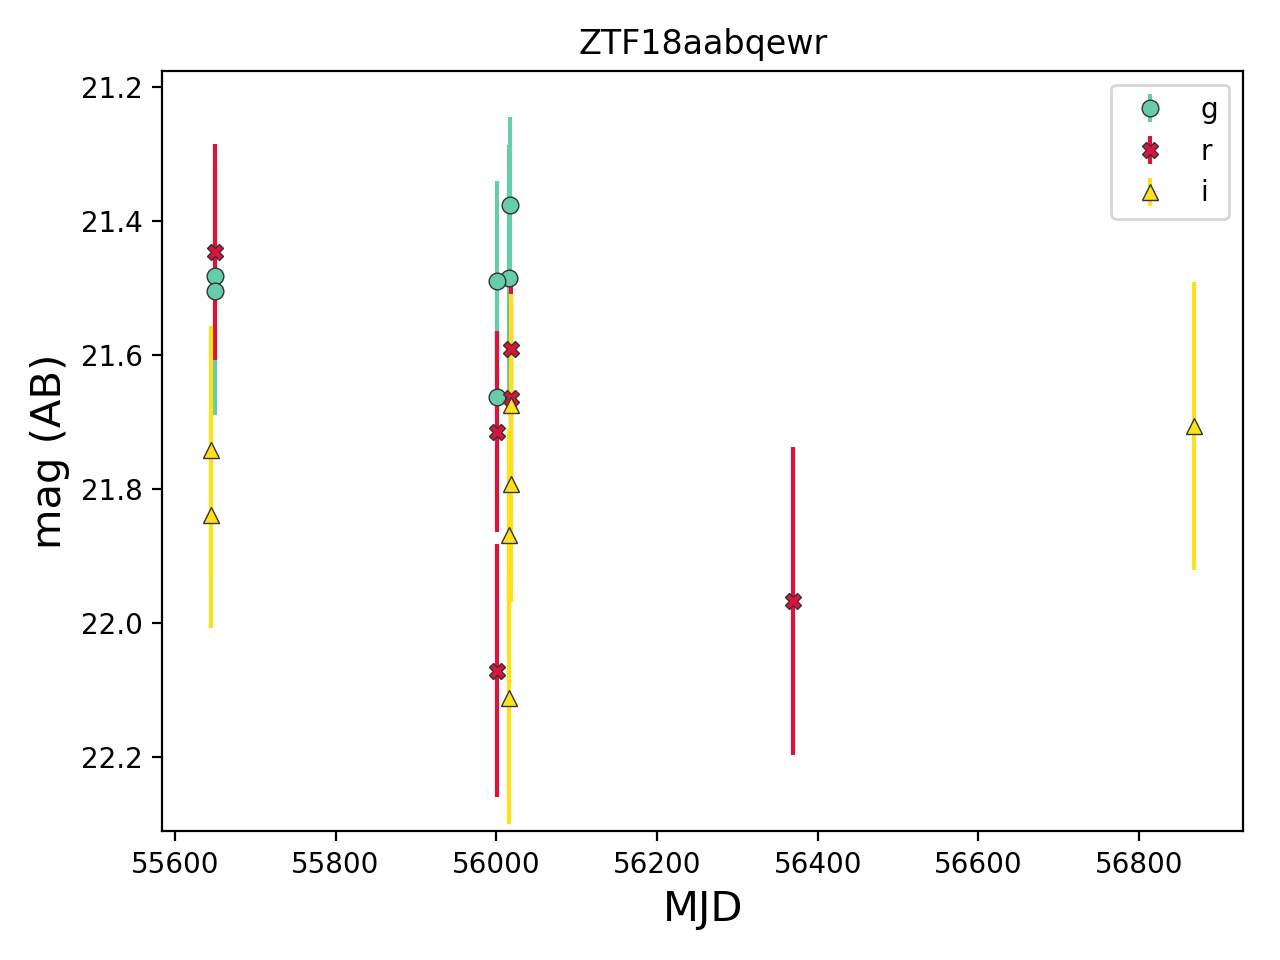

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


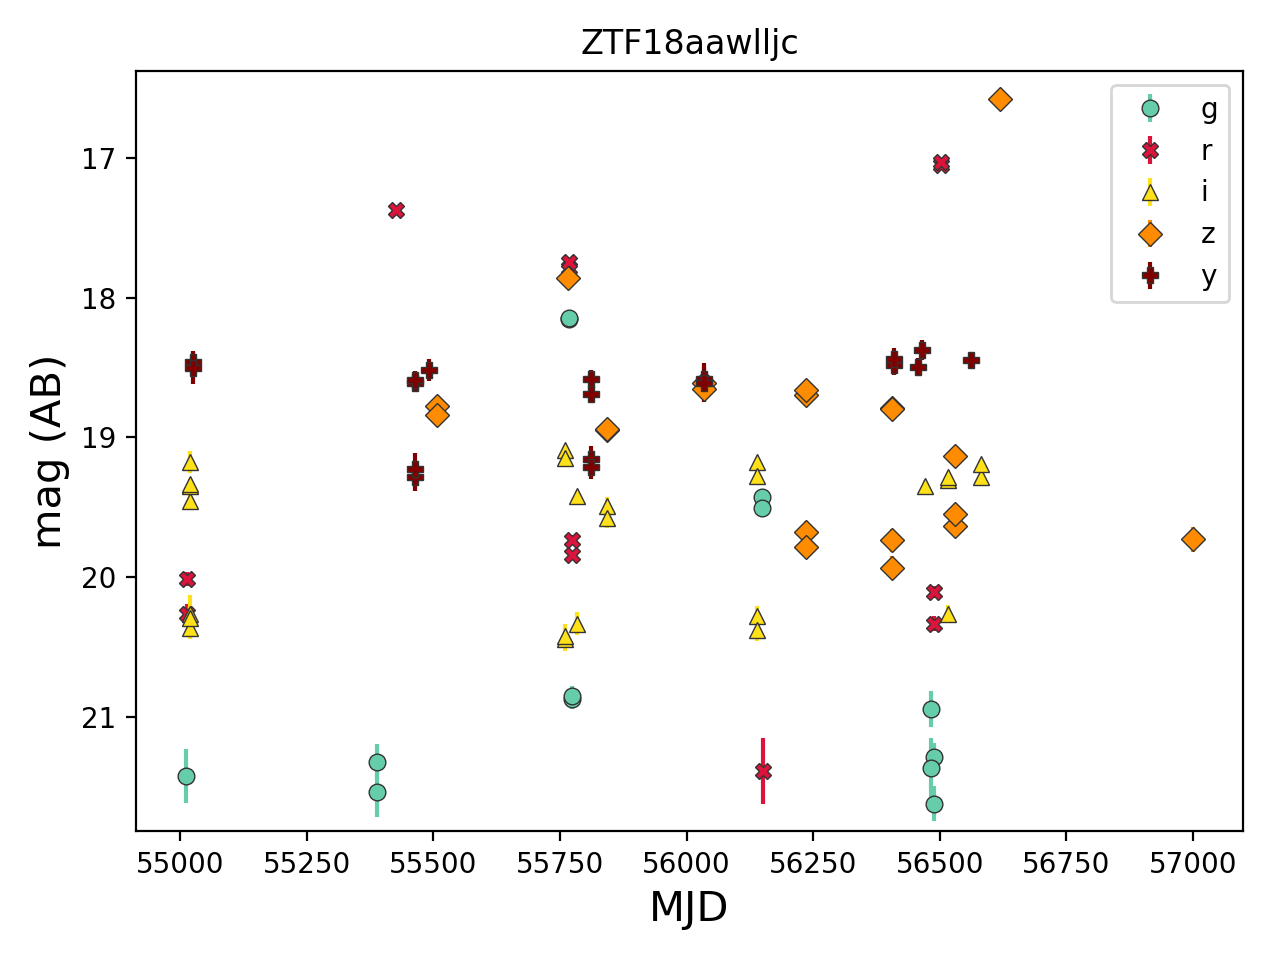

<IPython.core.display.Javascript object>


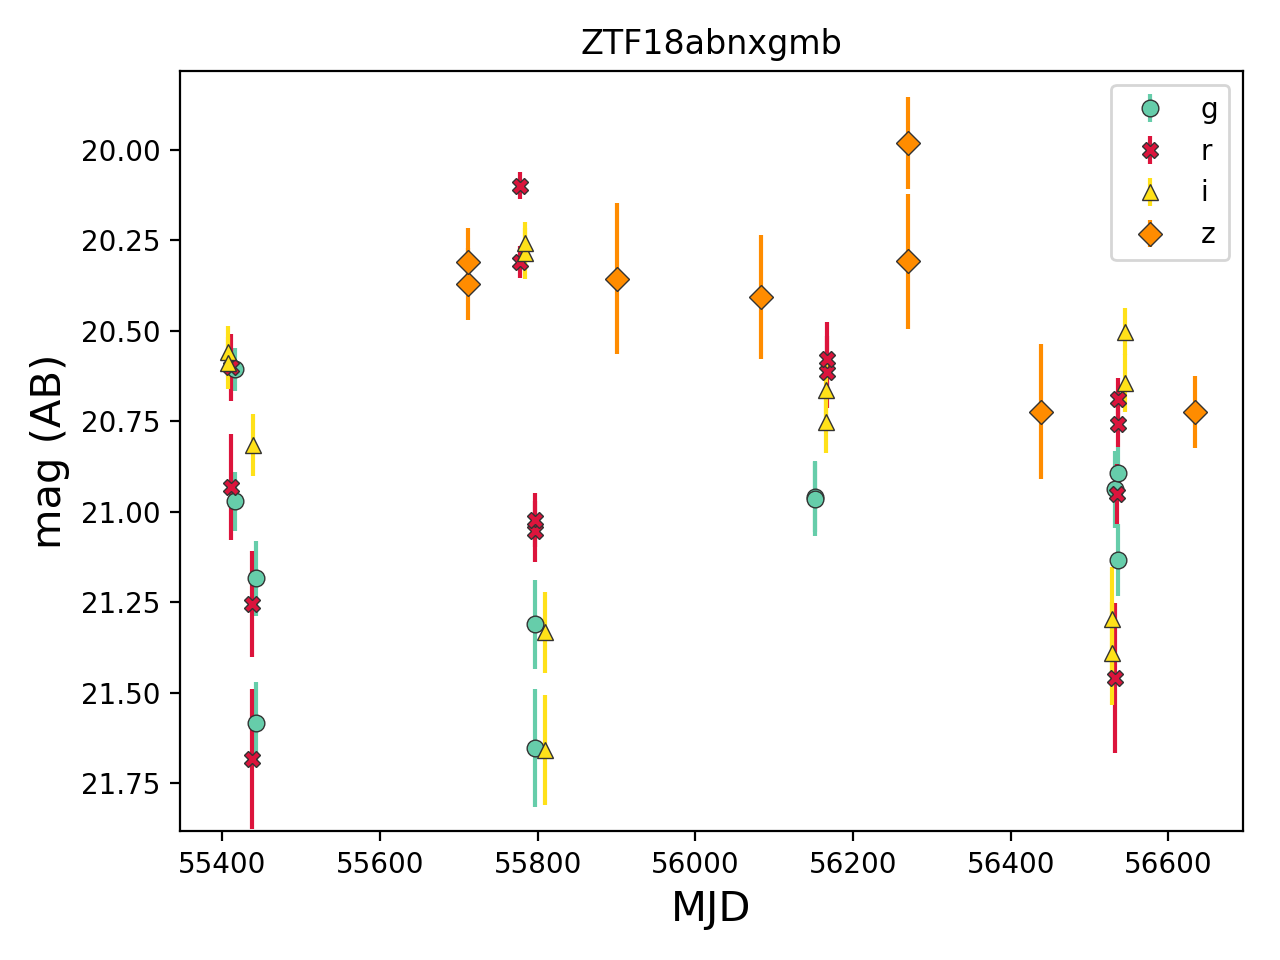

<IPython.core.display.Javascript object>


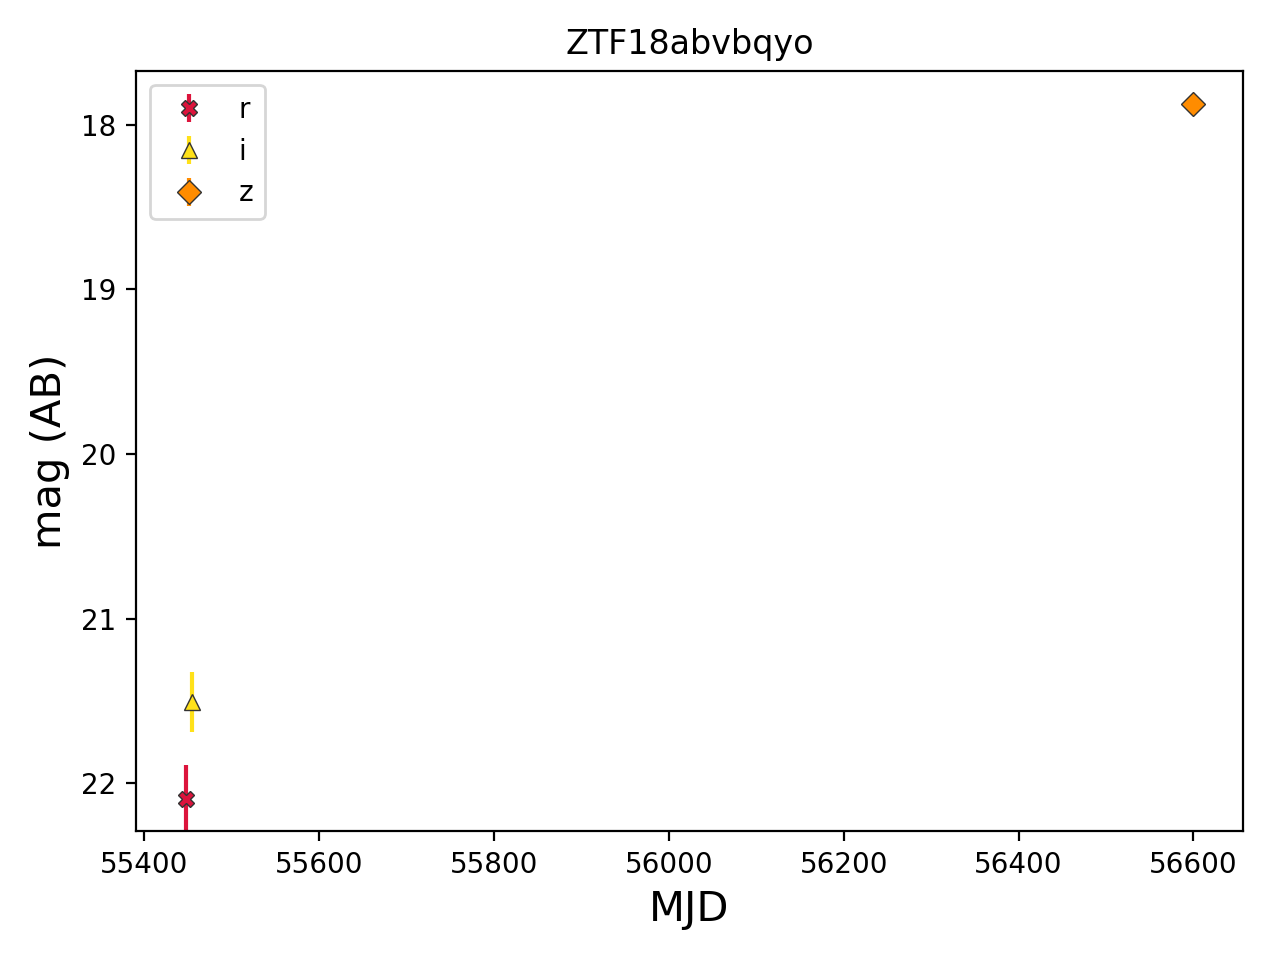

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


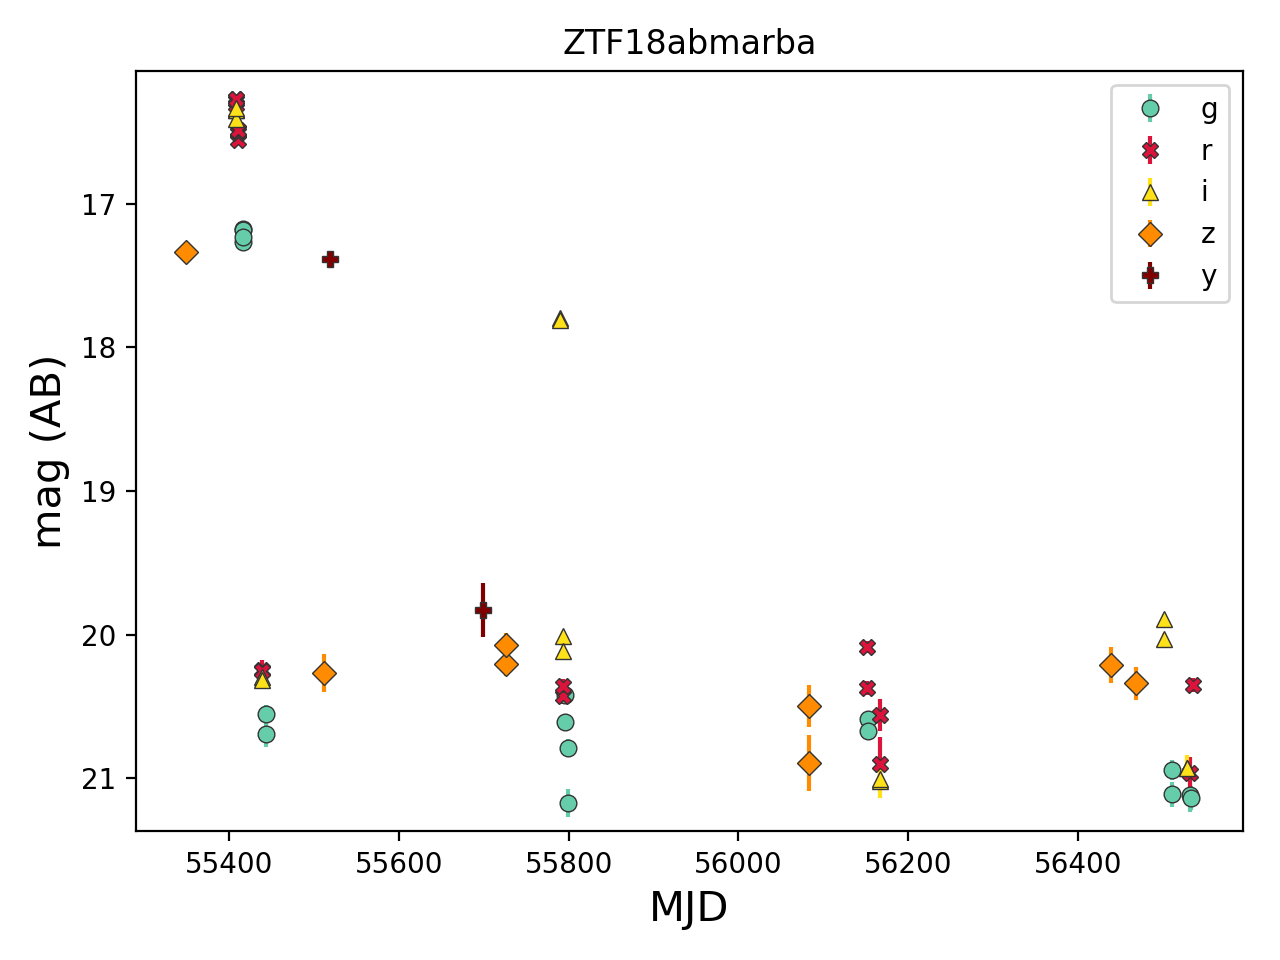

<IPython.core.display.Javascript object>


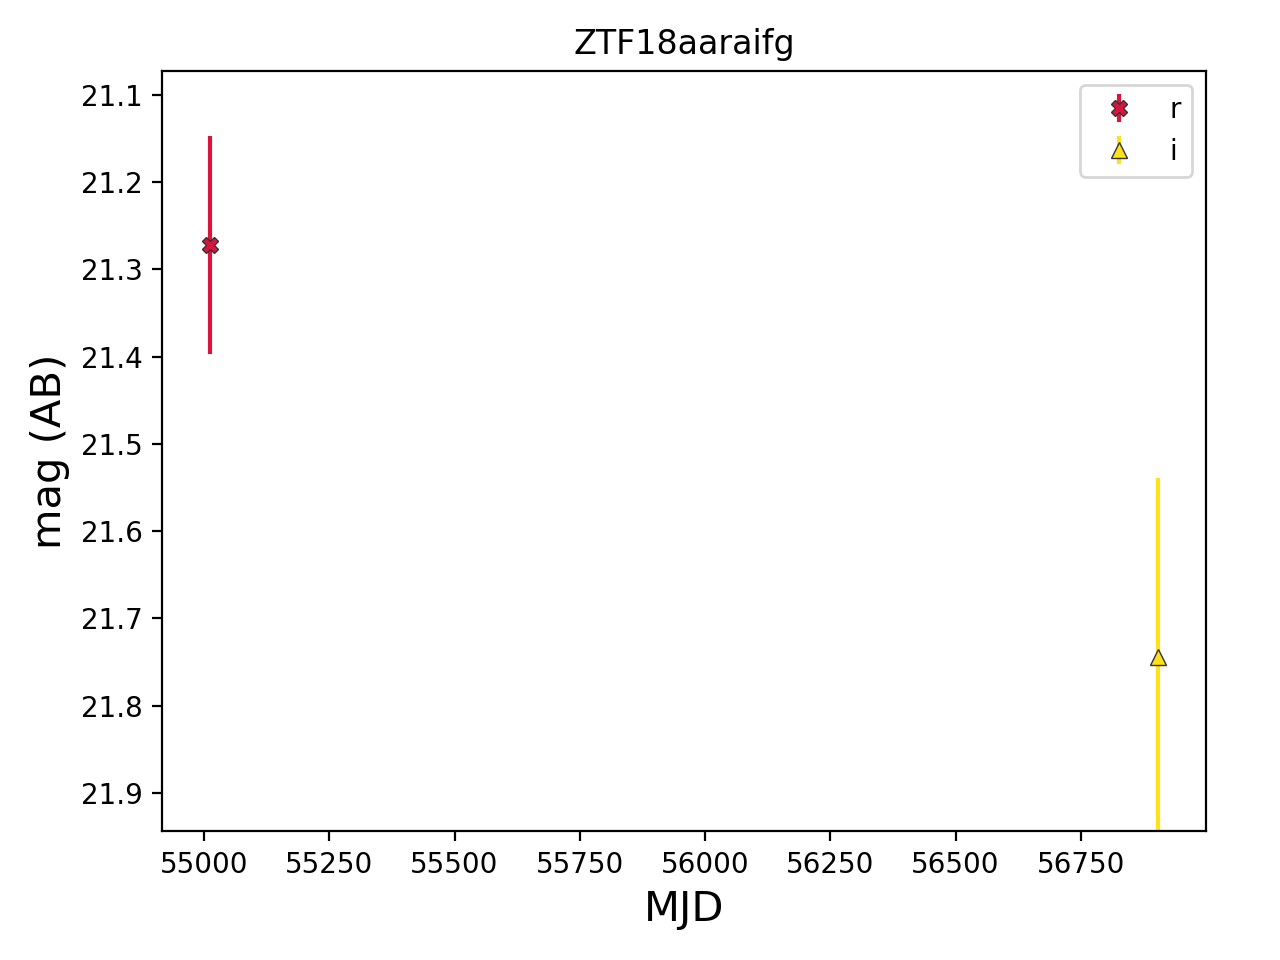

<IPython.core.display.Javascript object>


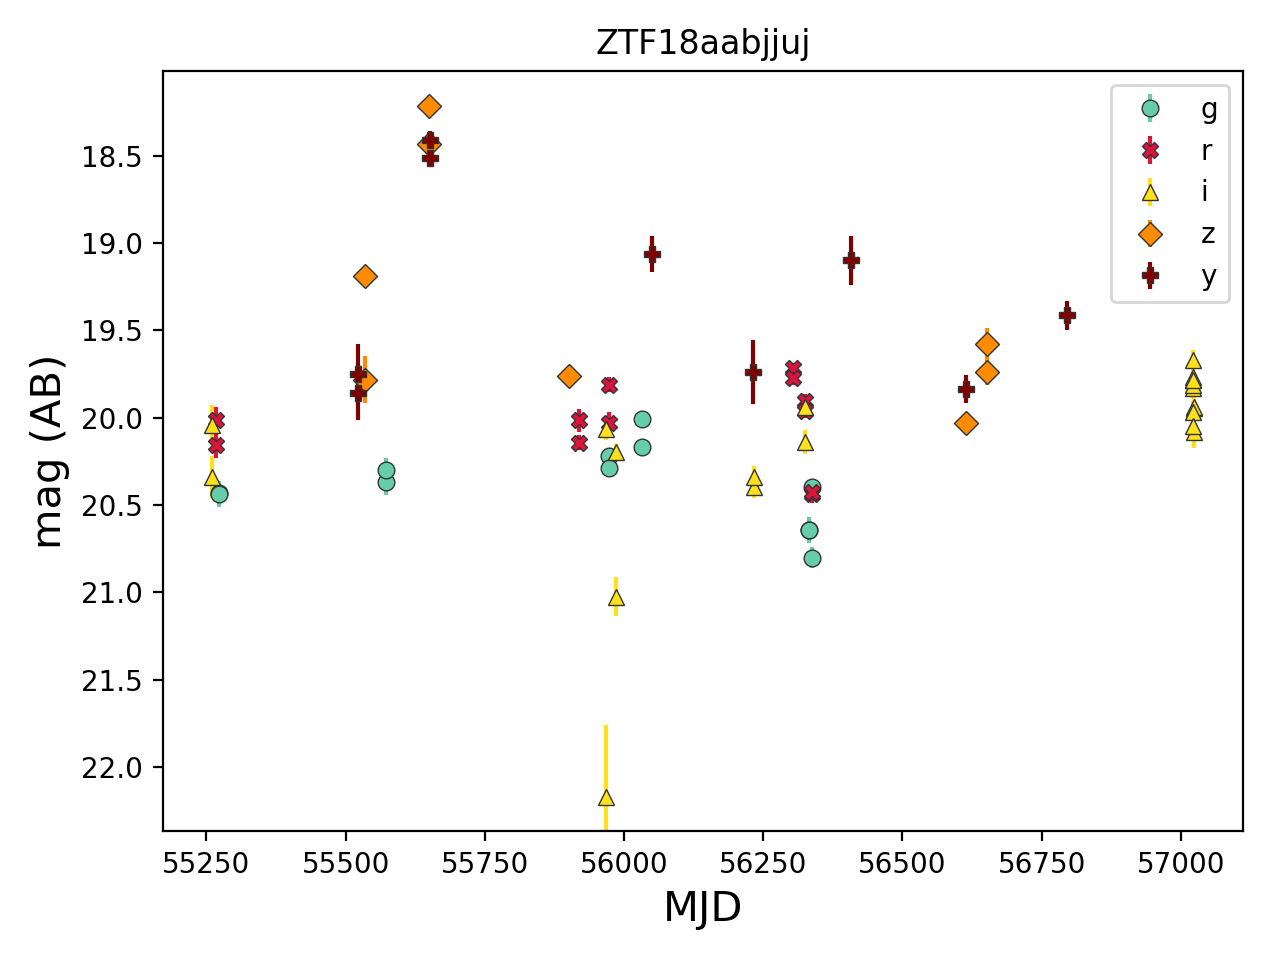

<IPython.core.display.Javascript object>


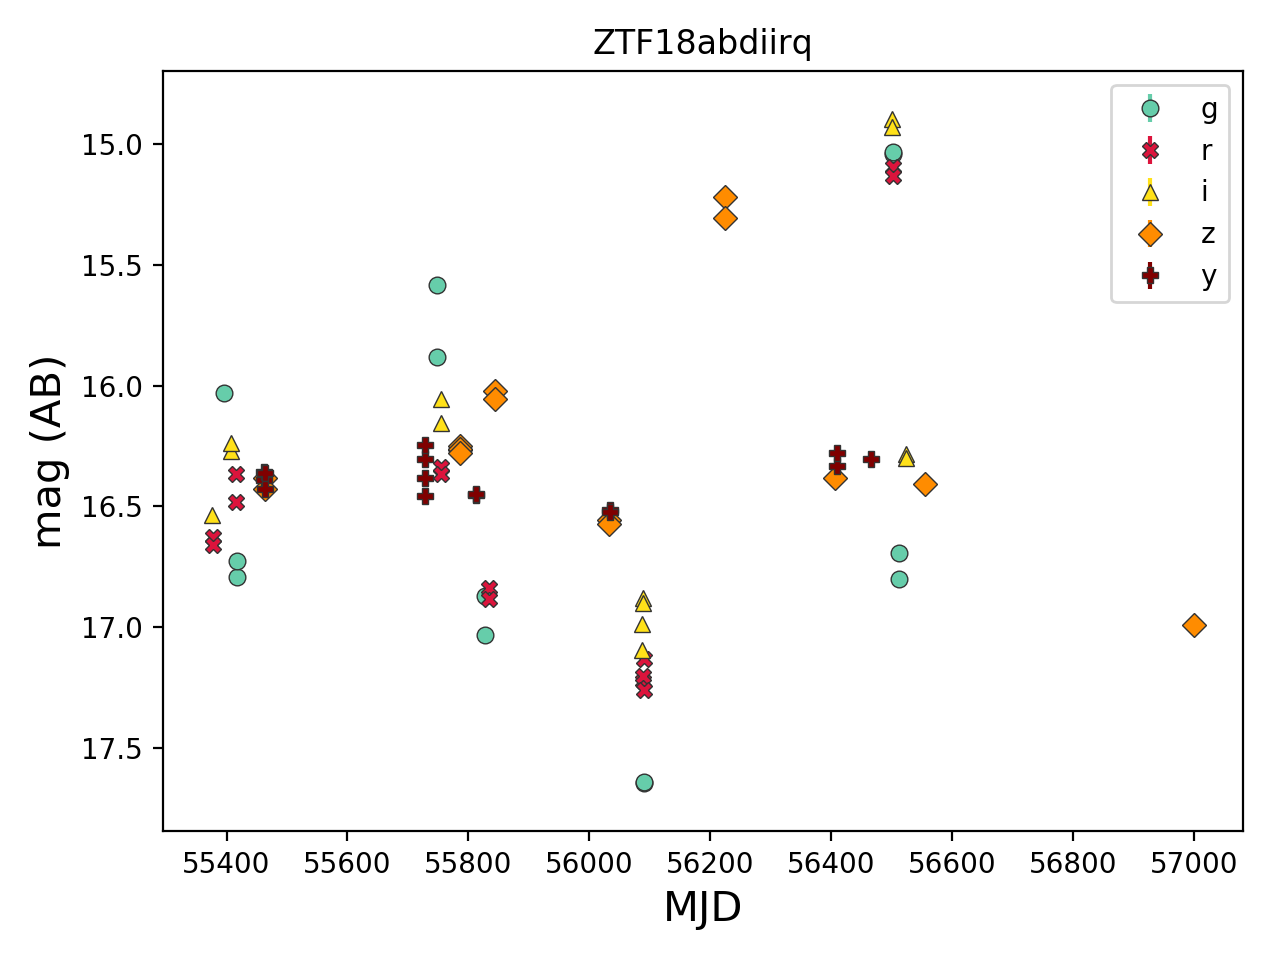

<IPython.core.display.Javascript object>


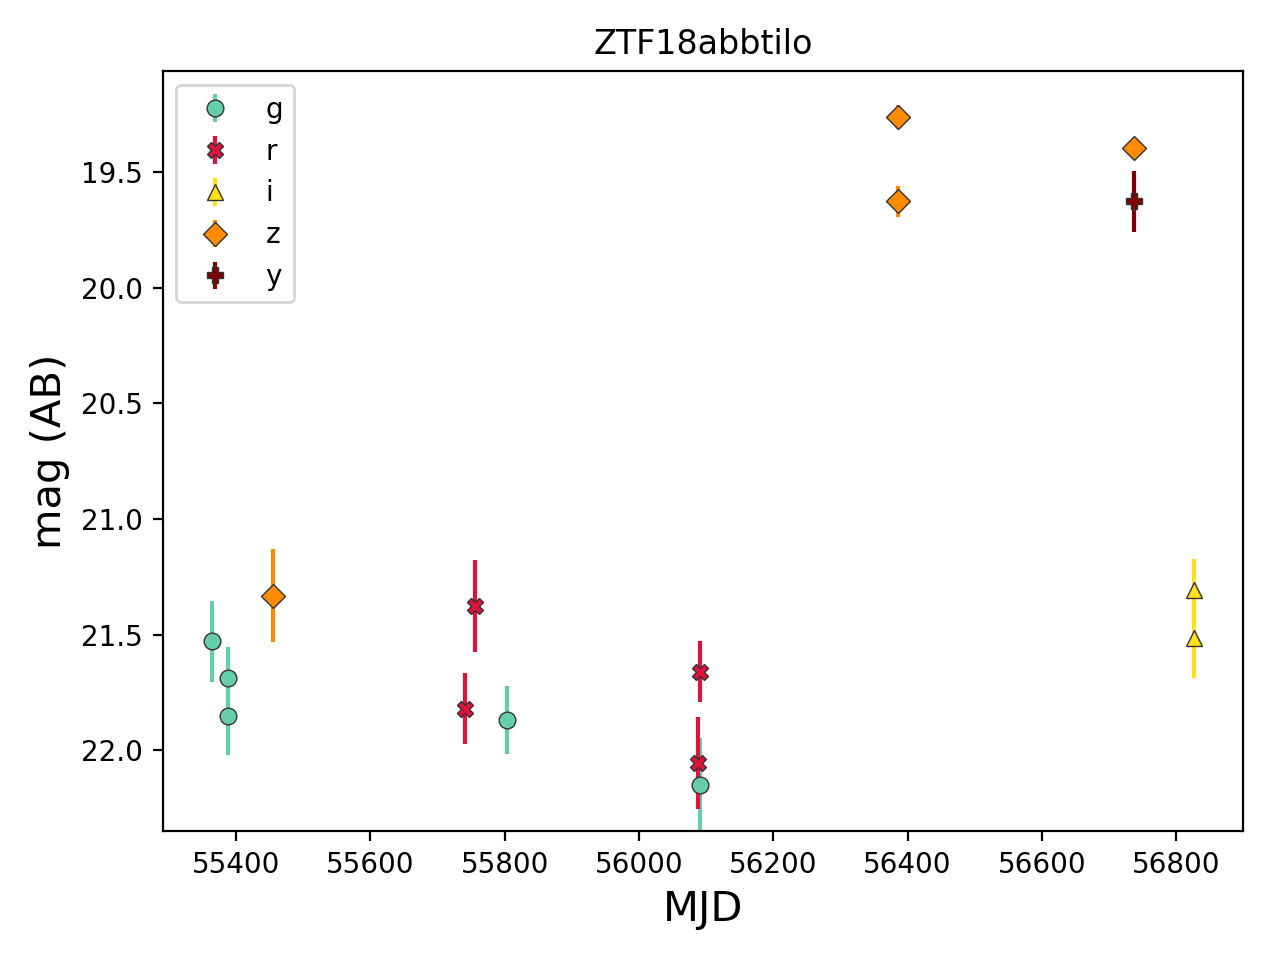

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


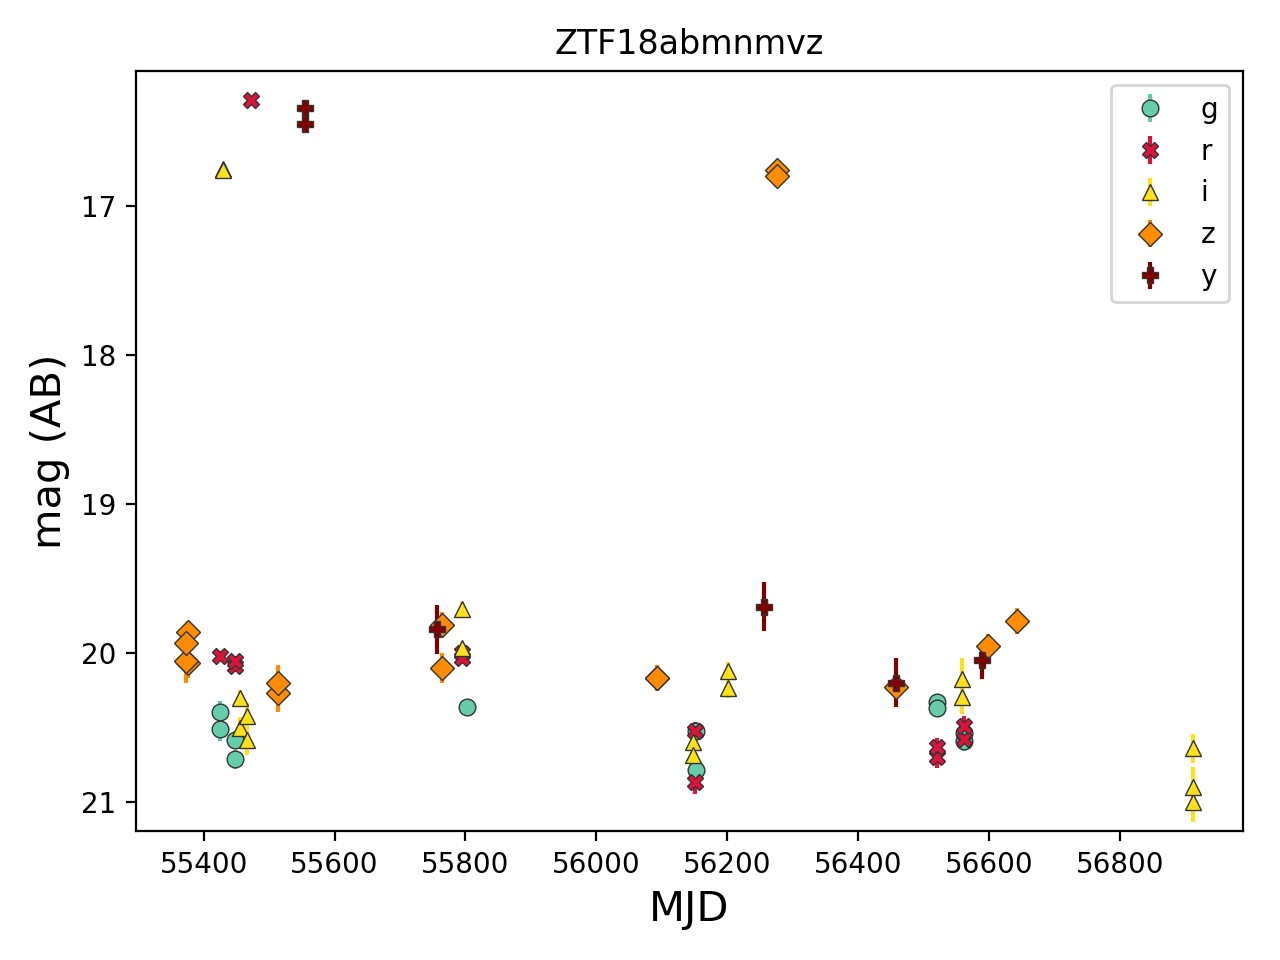

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


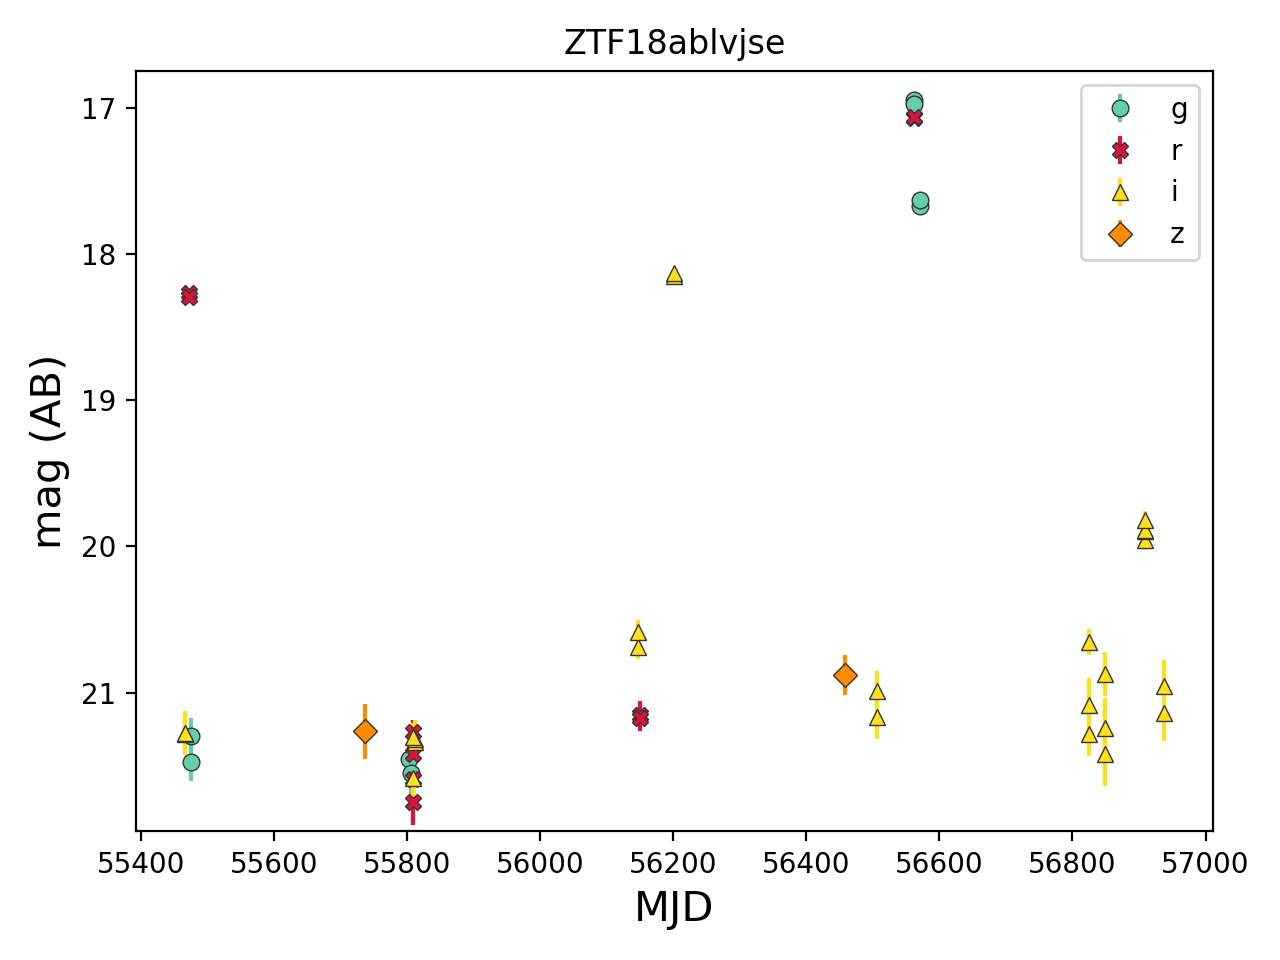

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


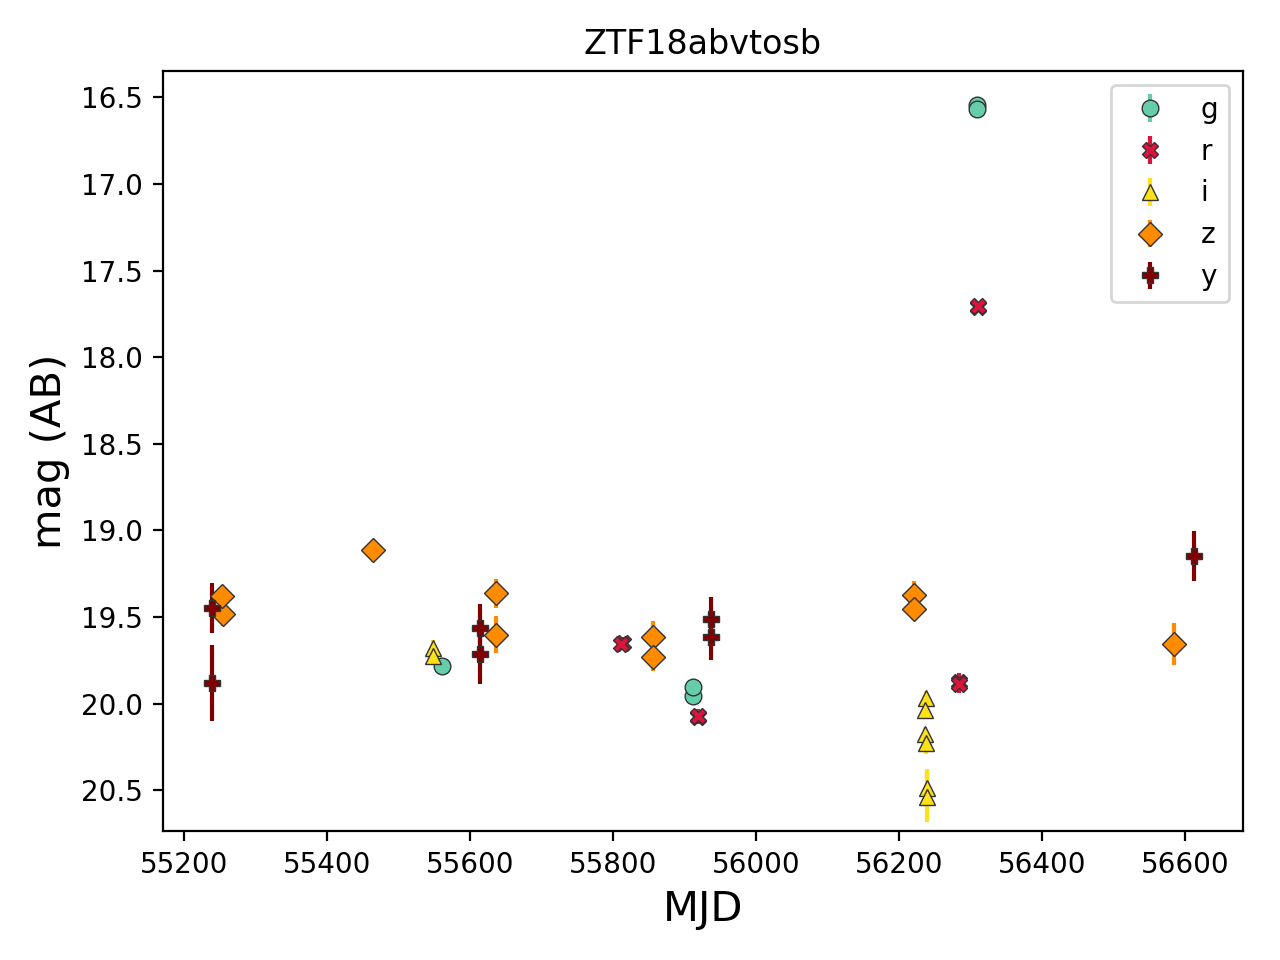

<IPython.core.display.Javascript object>


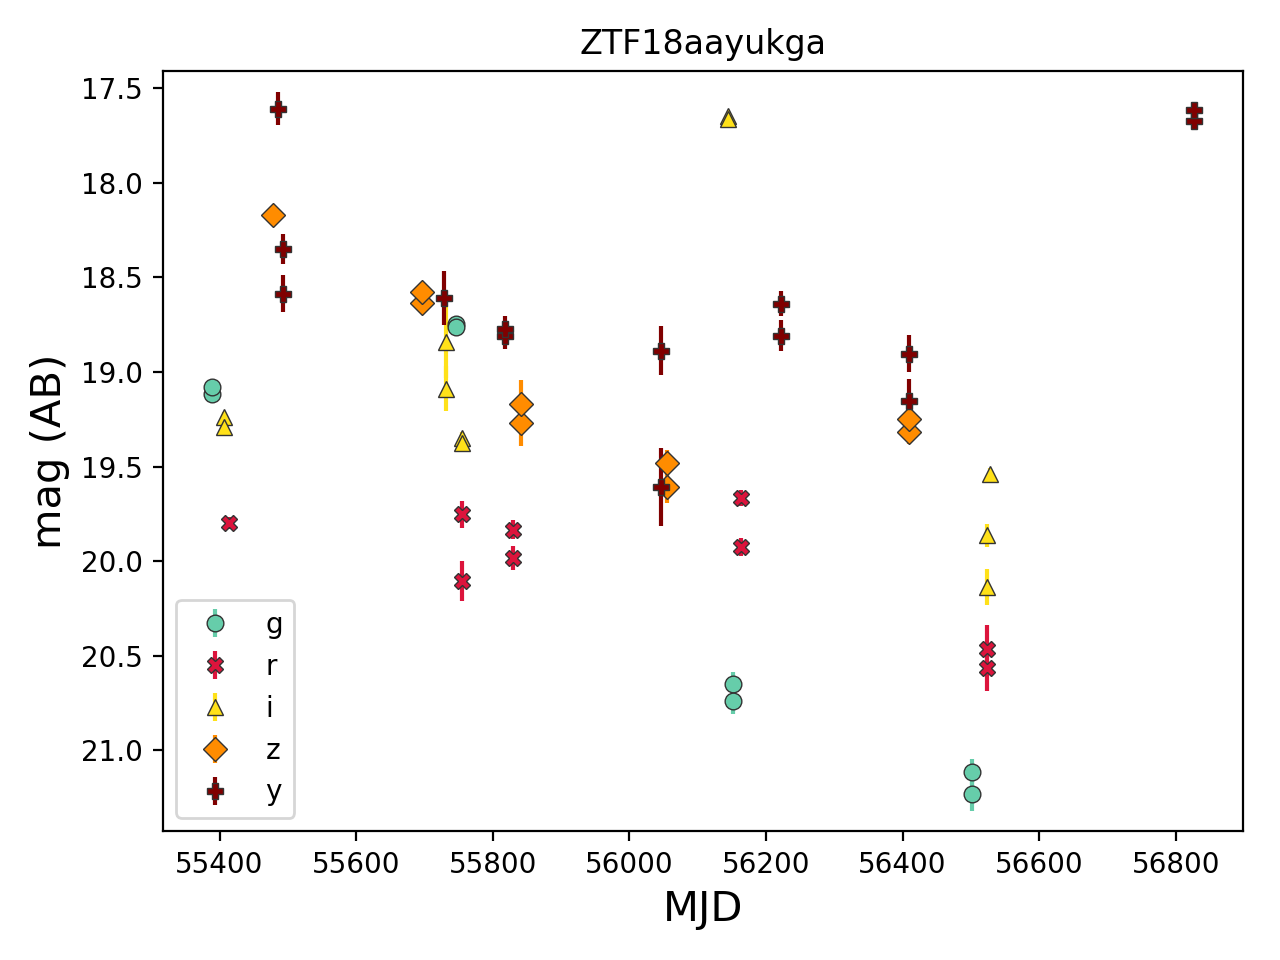

<IPython.core.display.Javascript object>


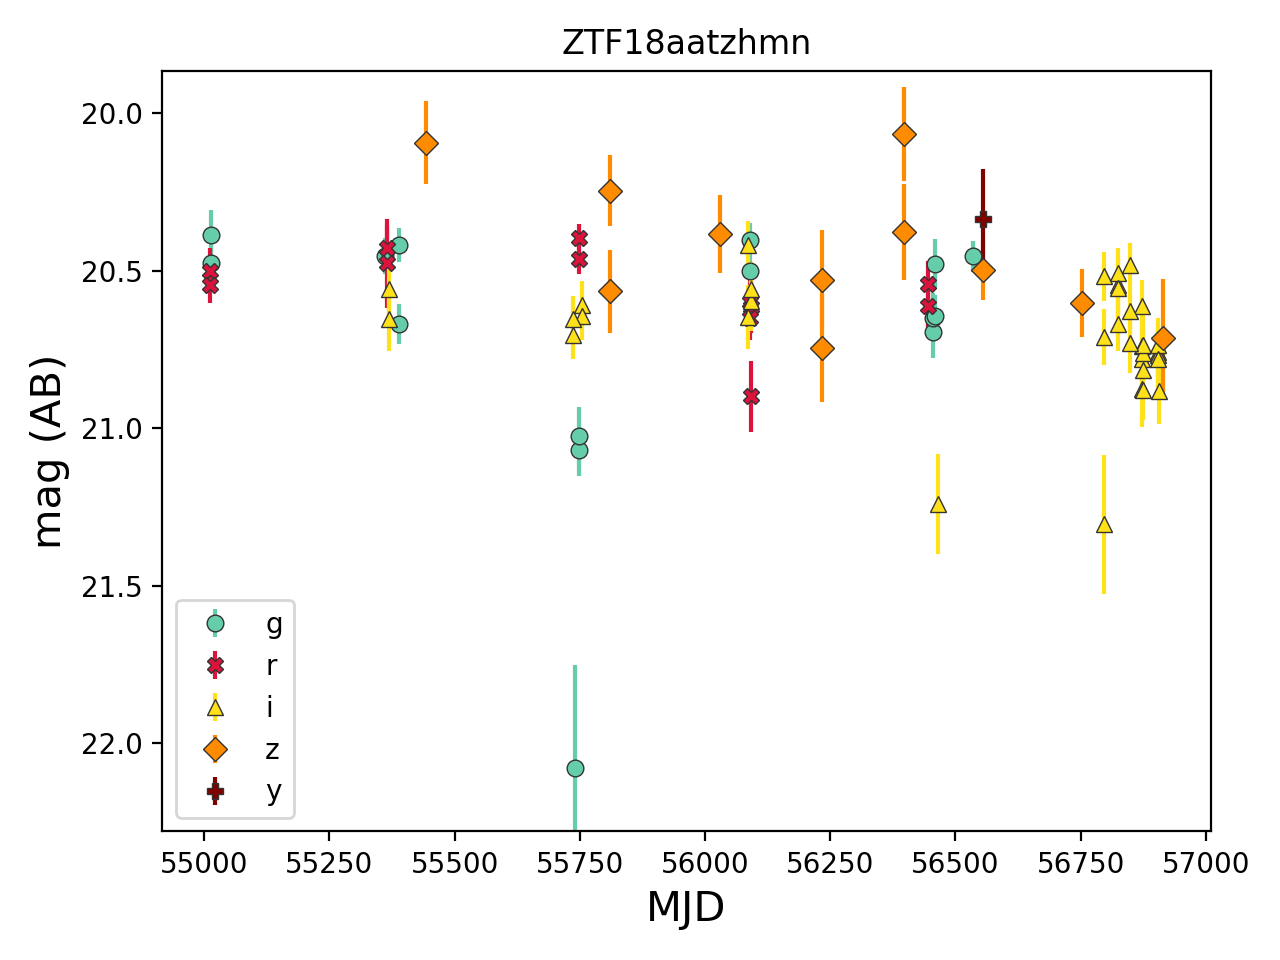

<IPython.core.display.Javascript object>


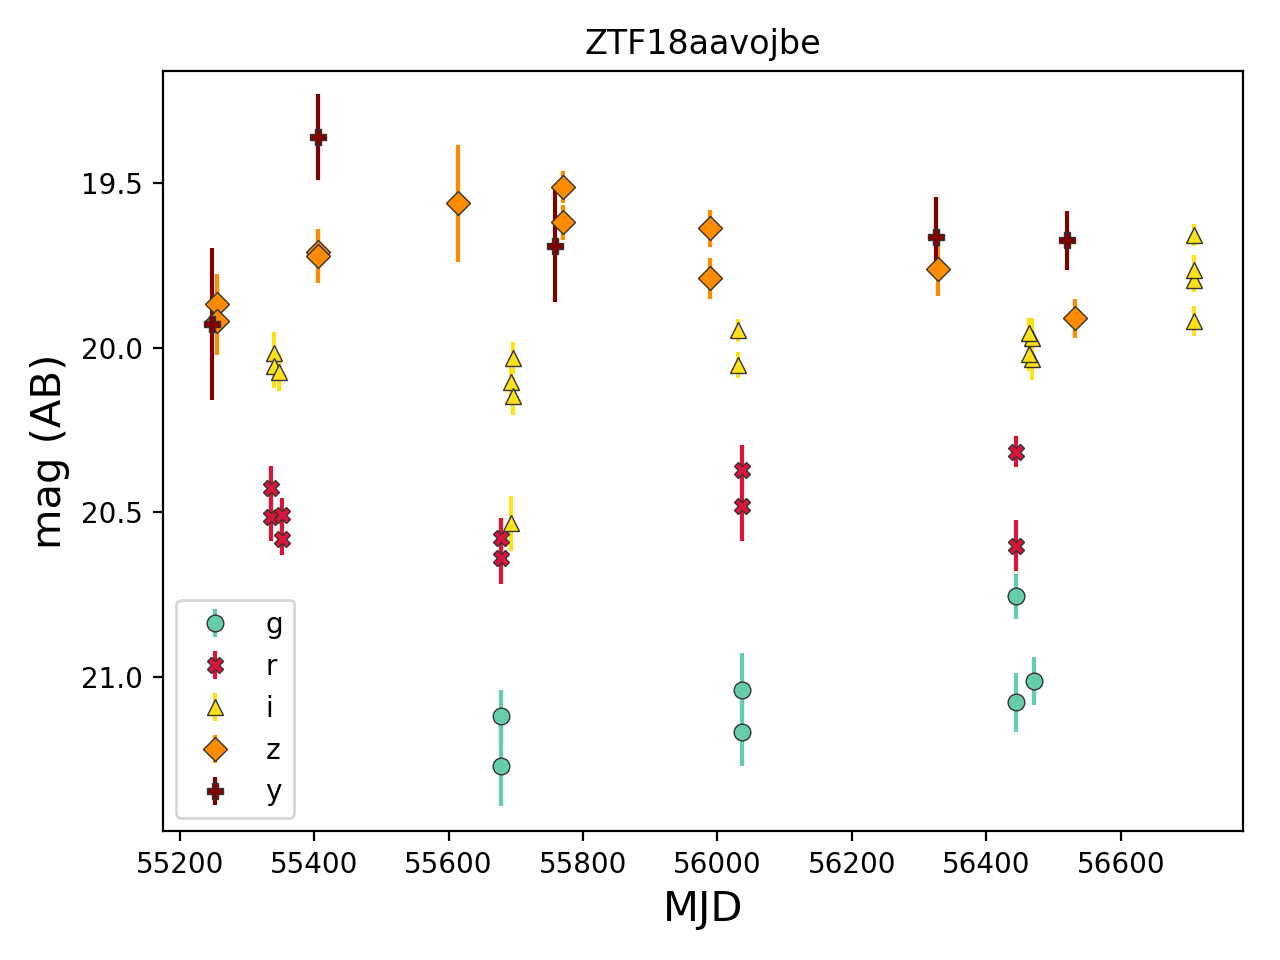

<IPython.core.display.Javascript object>


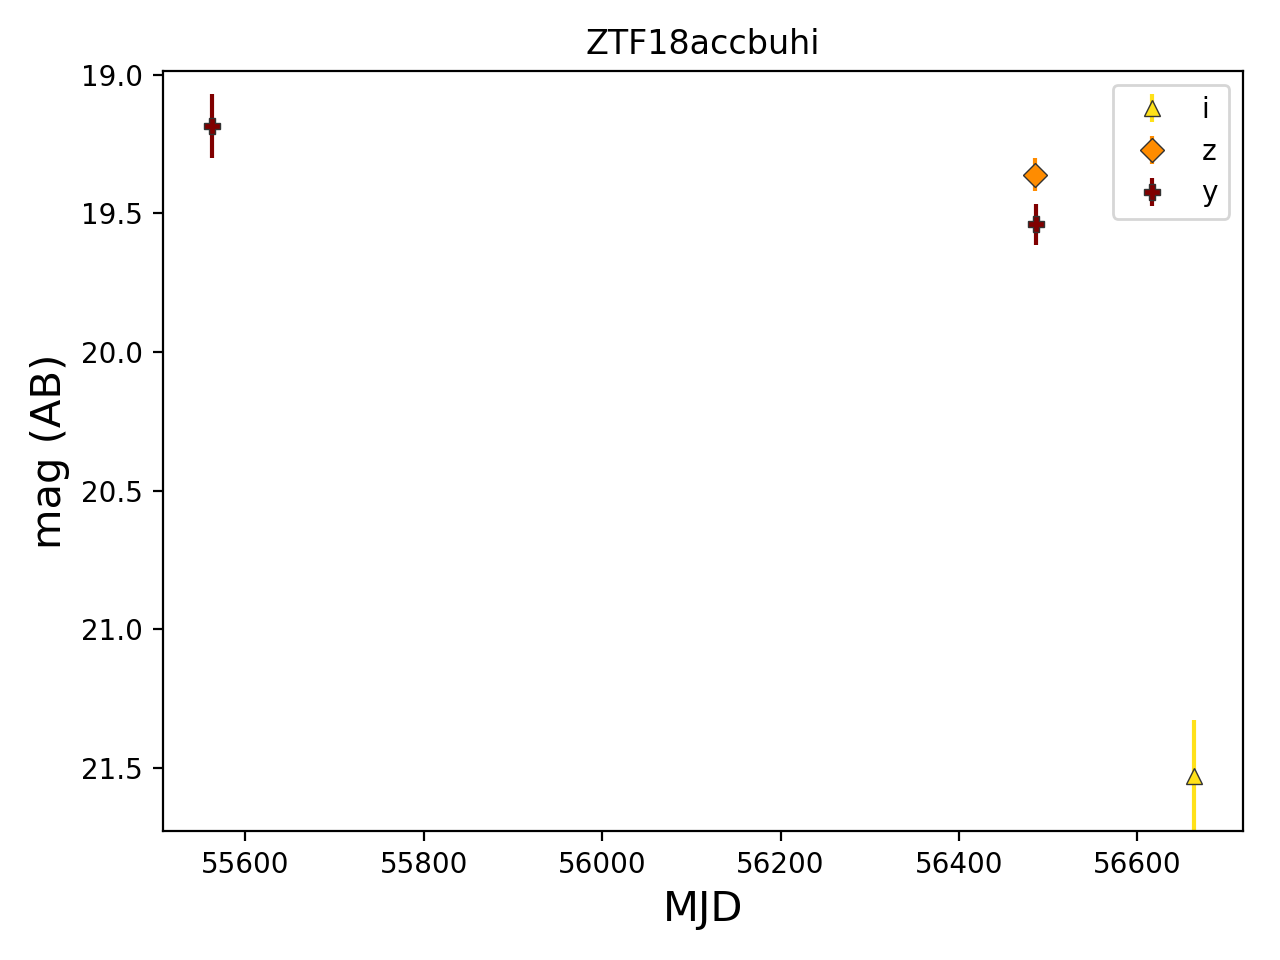

<IPython.core.display.Javascript object>


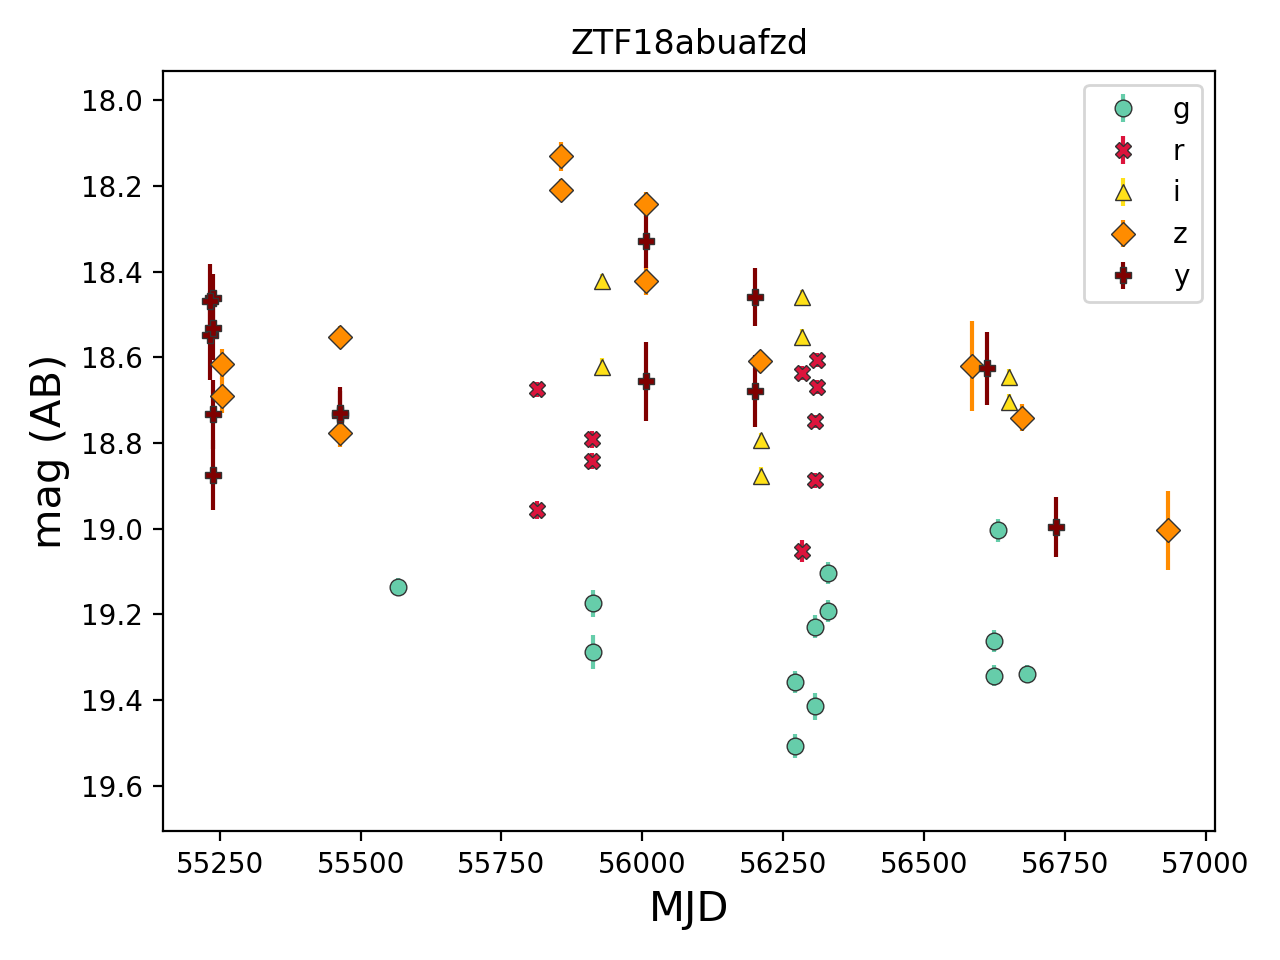

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


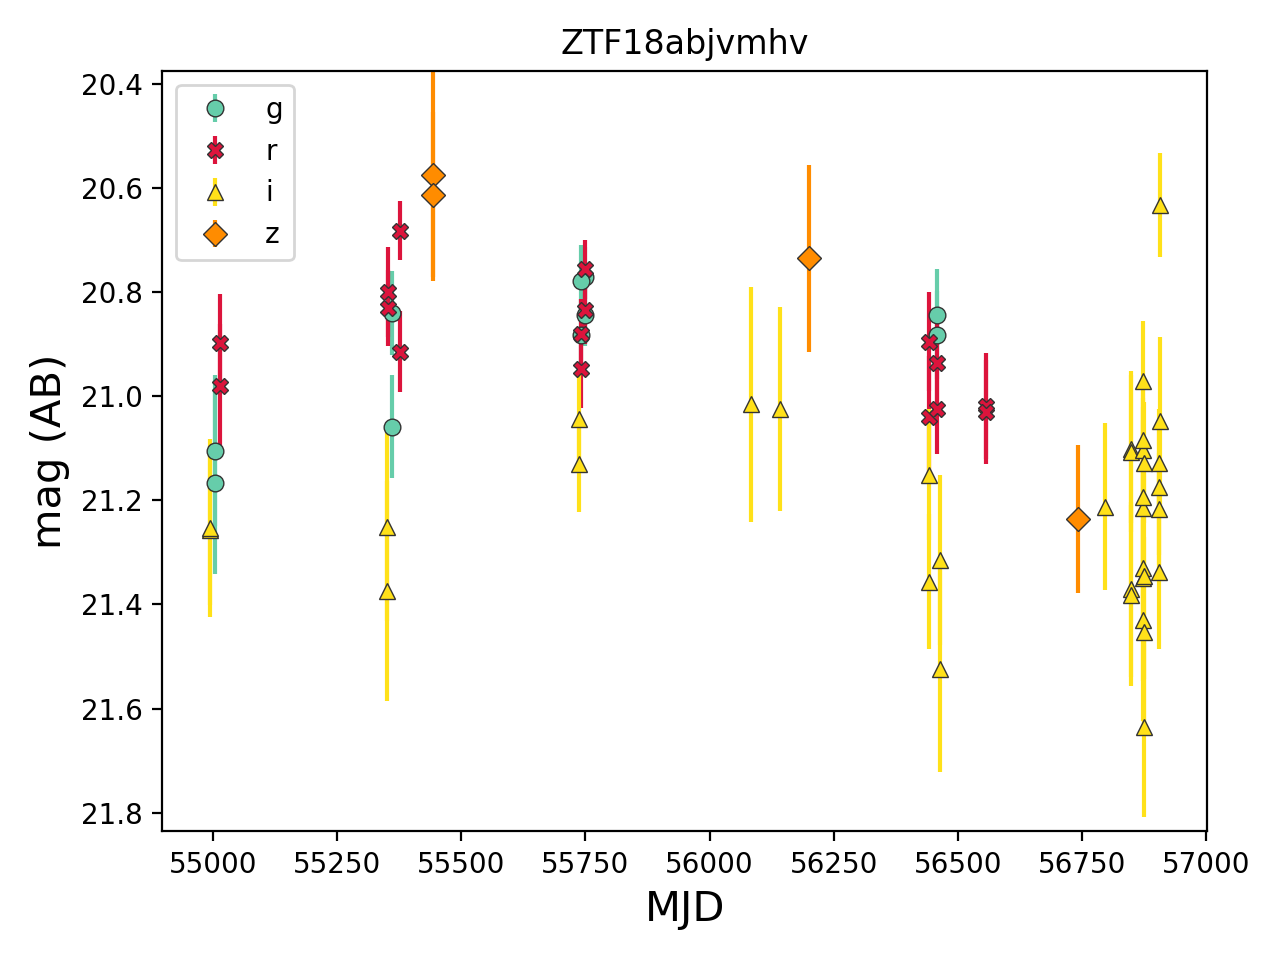

<IPython.core.display.Javascript object>


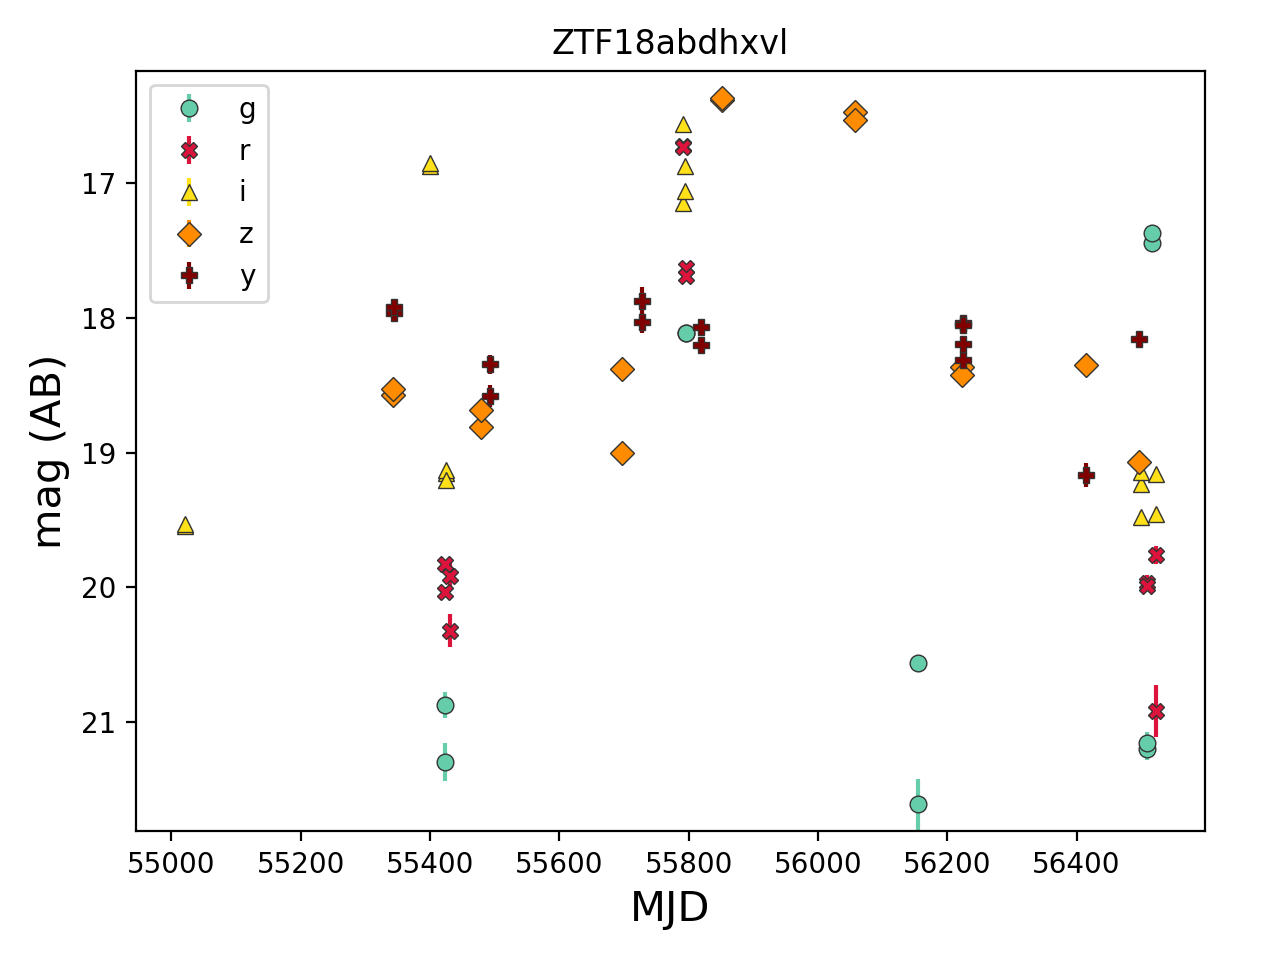

<IPython.core.display.Javascript object>


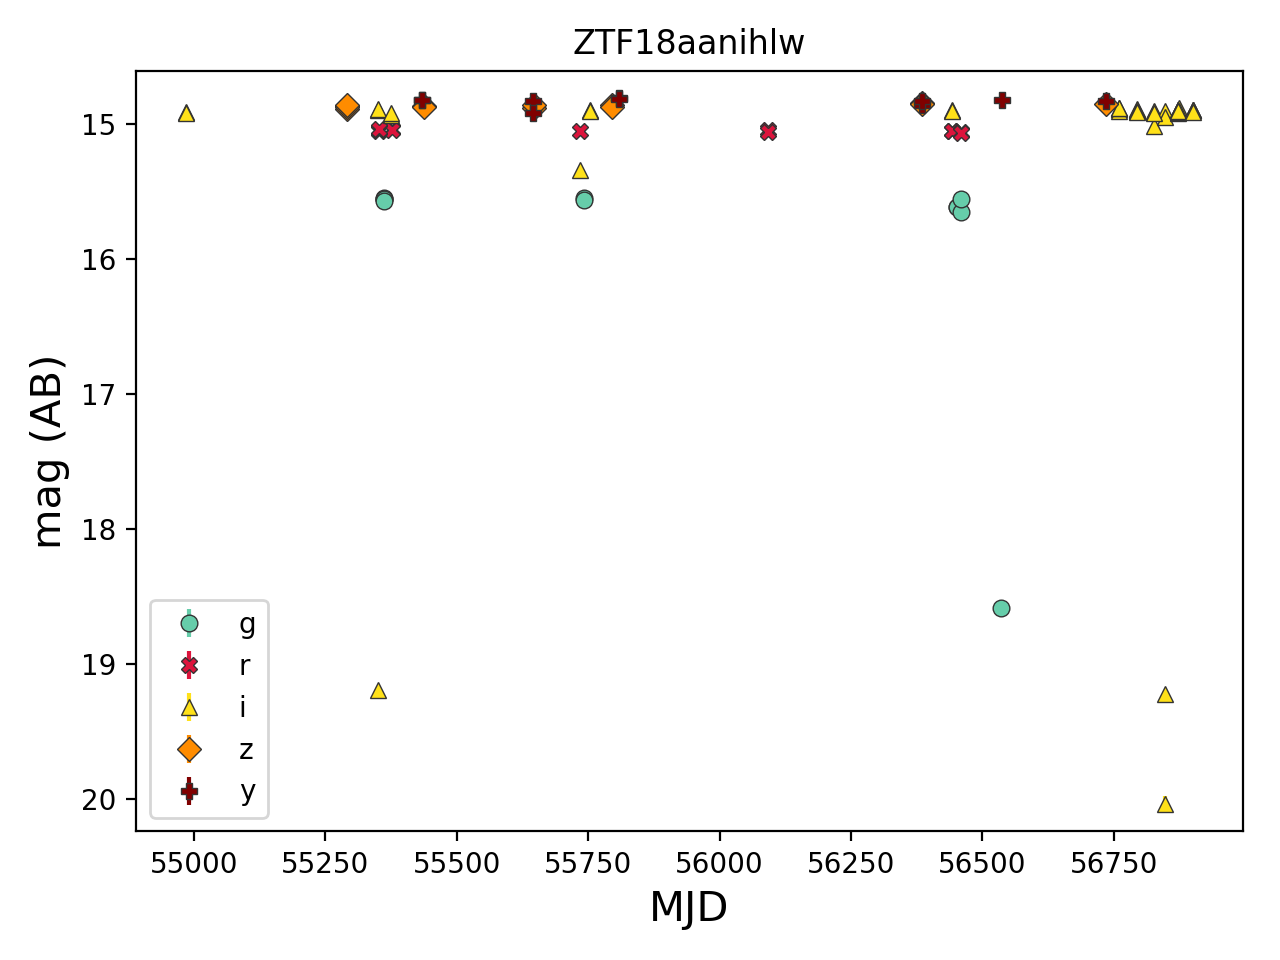

<IPython.core.display.Javascript object>


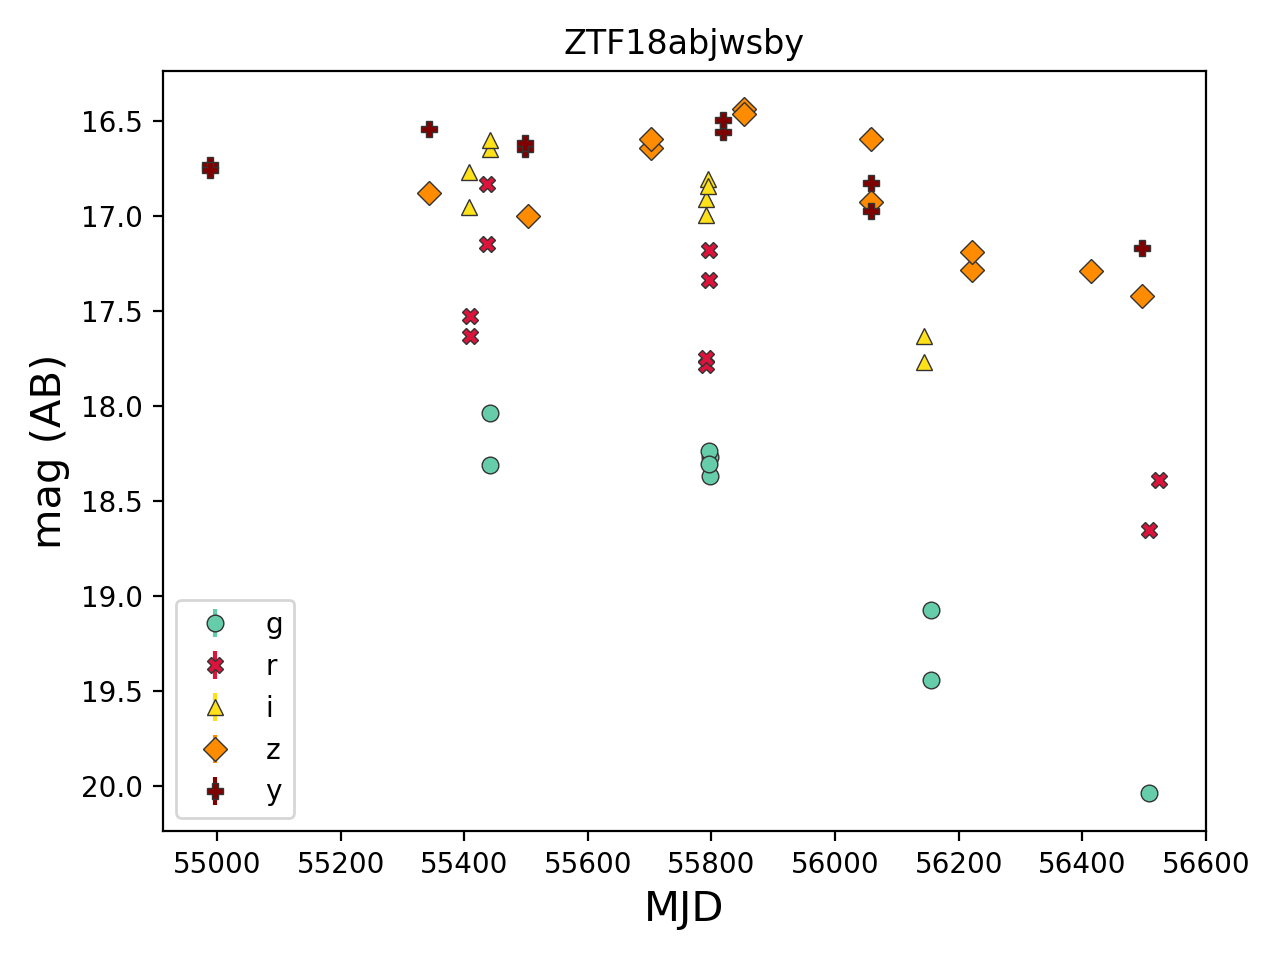

<IPython.core.display.Javascript object>


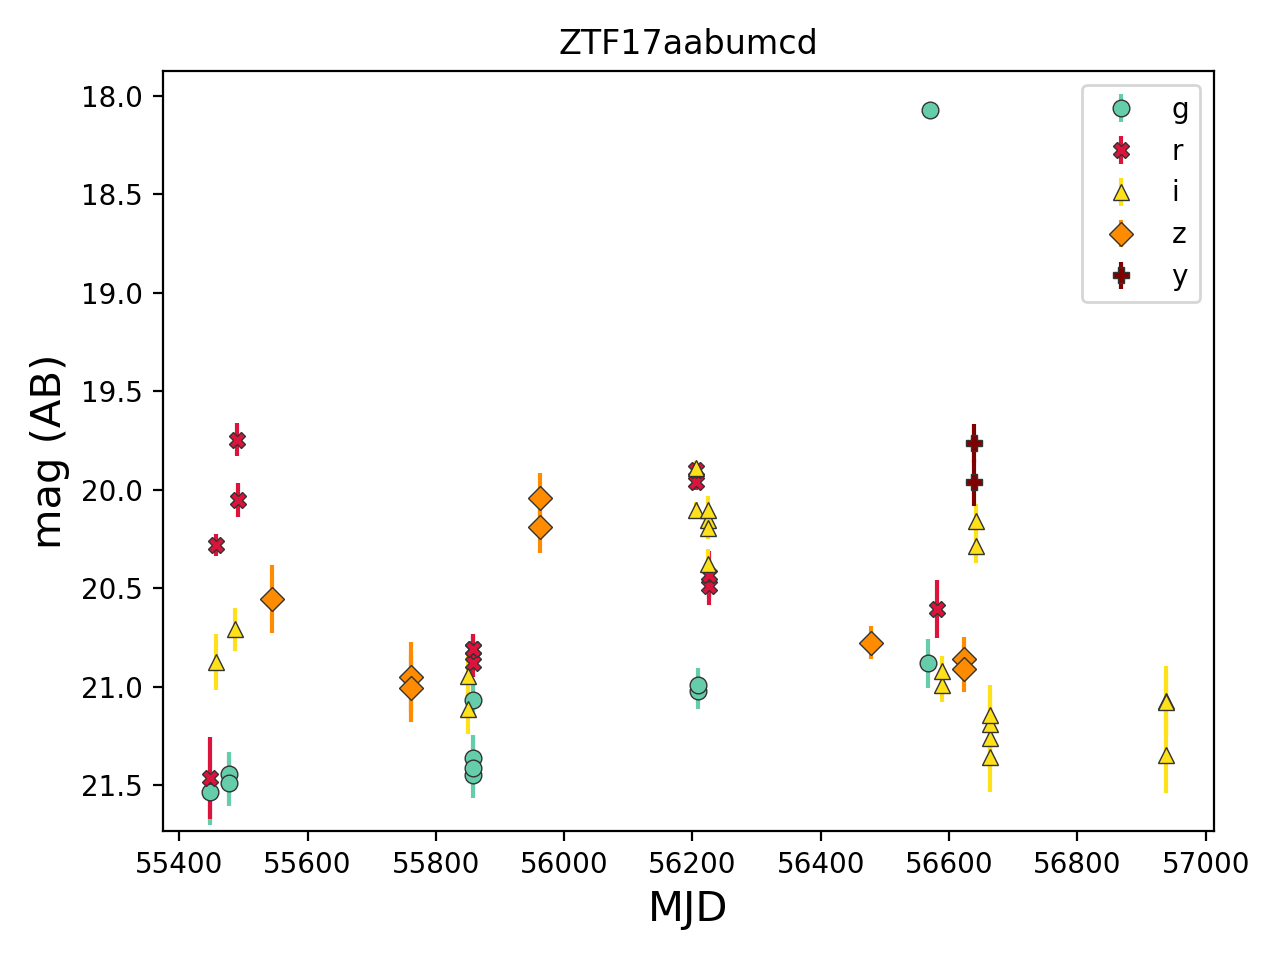

<IPython.core.display.Javascript object>


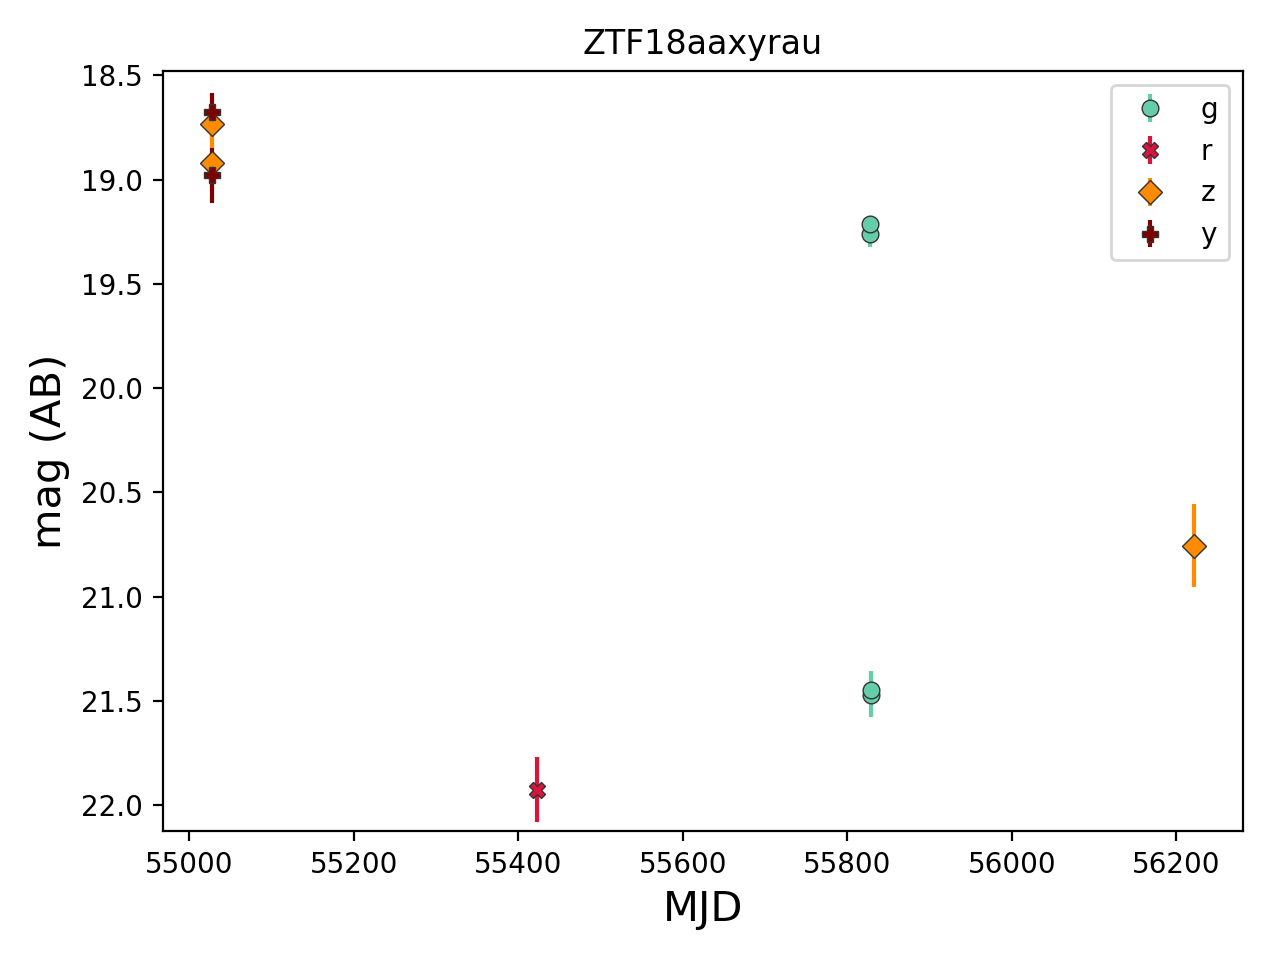

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


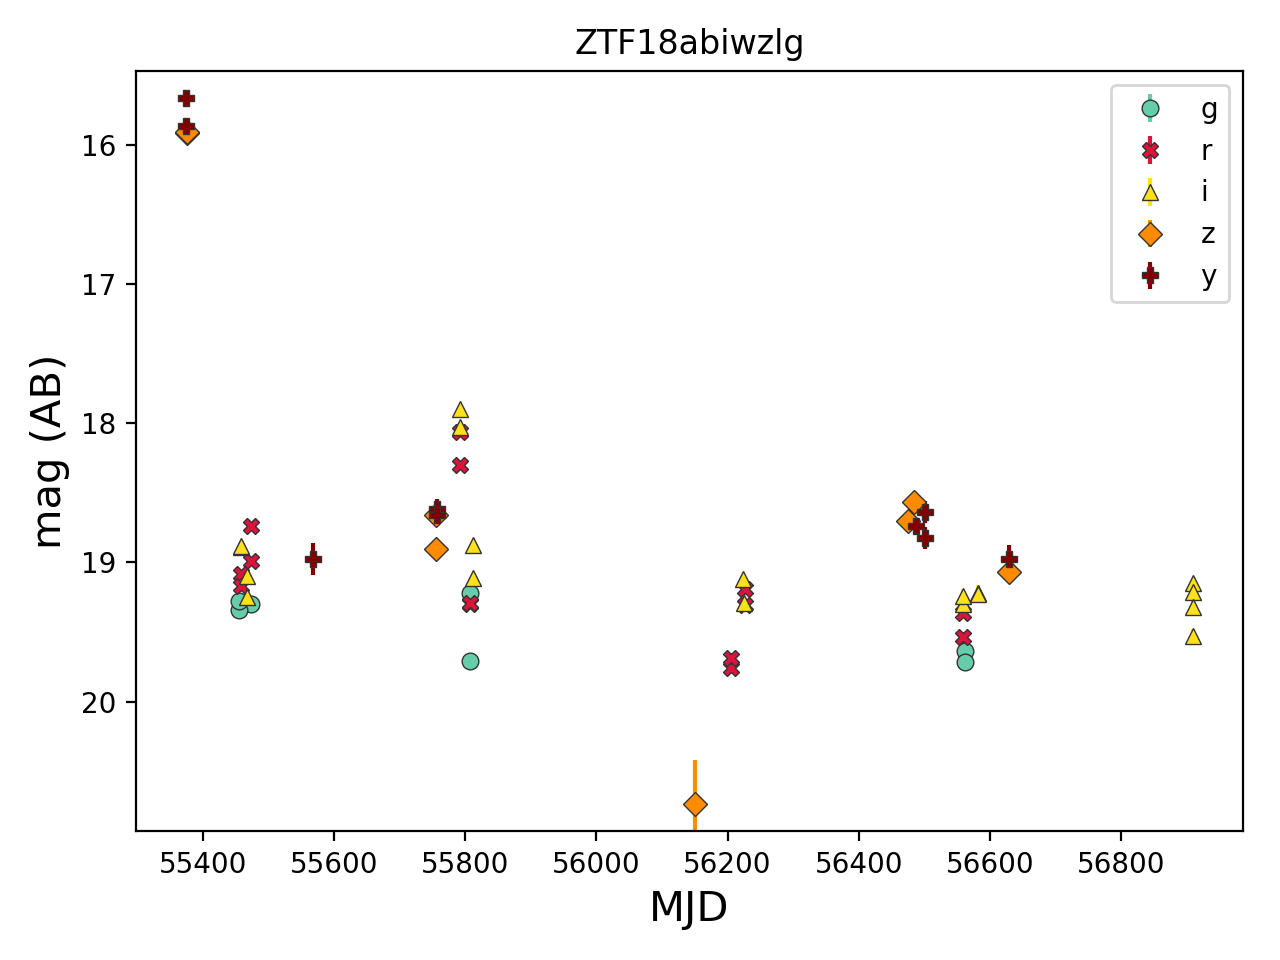

<IPython.core.display.Javascript object>


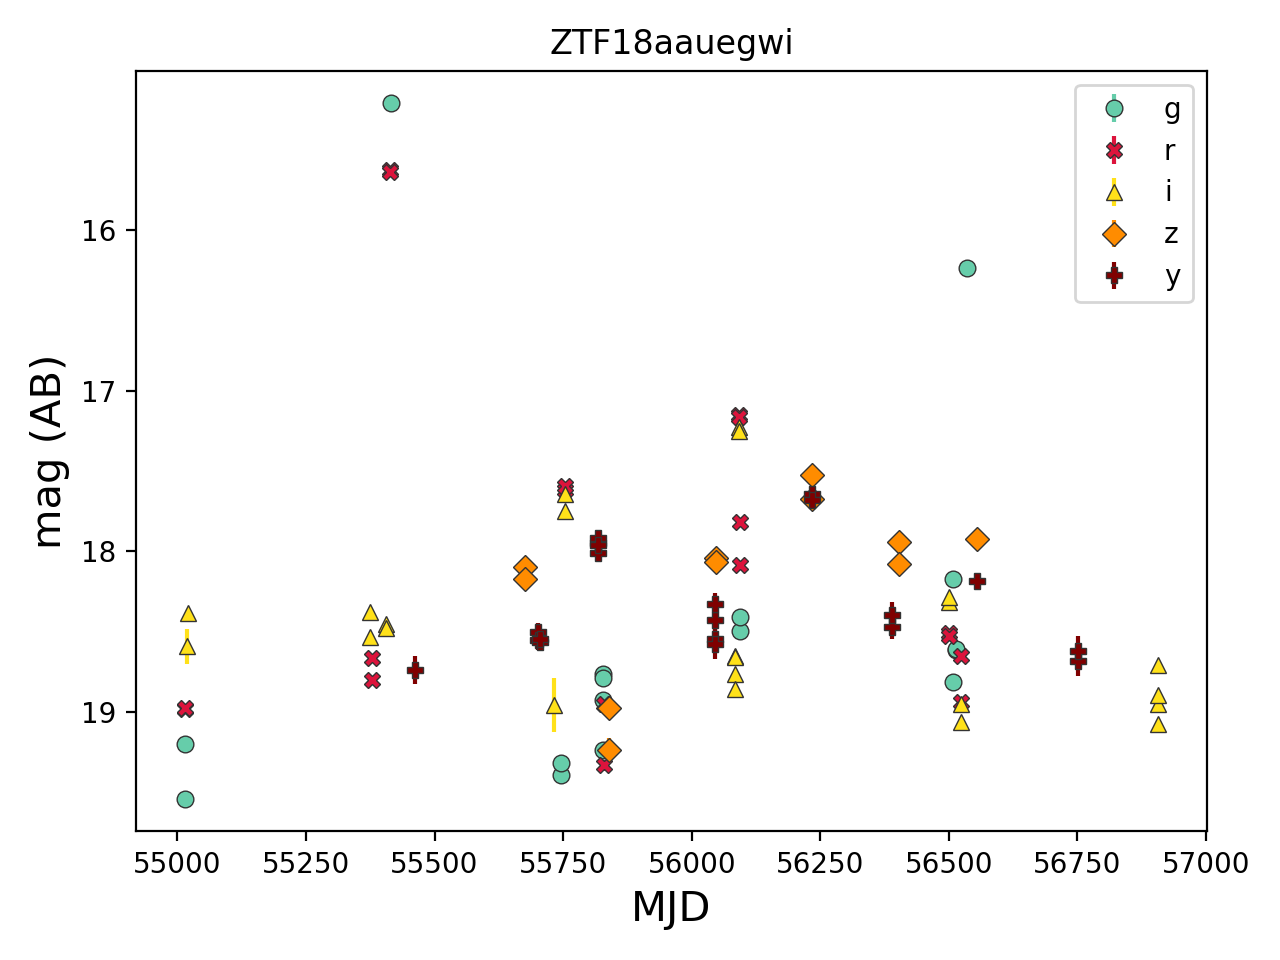

<IPython.core.display.Javascript object>


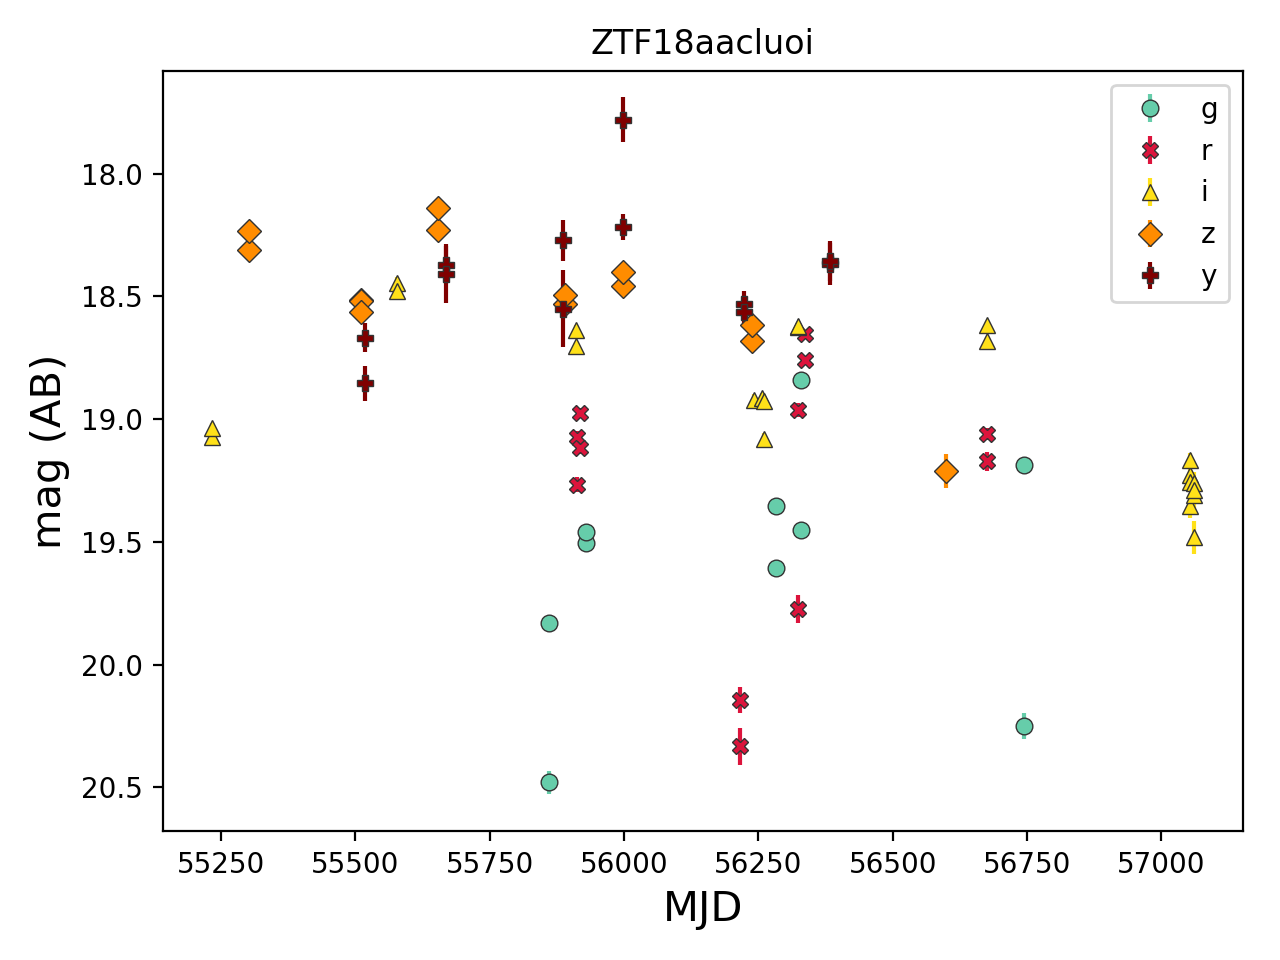

<IPython.core.display.Javascript object>


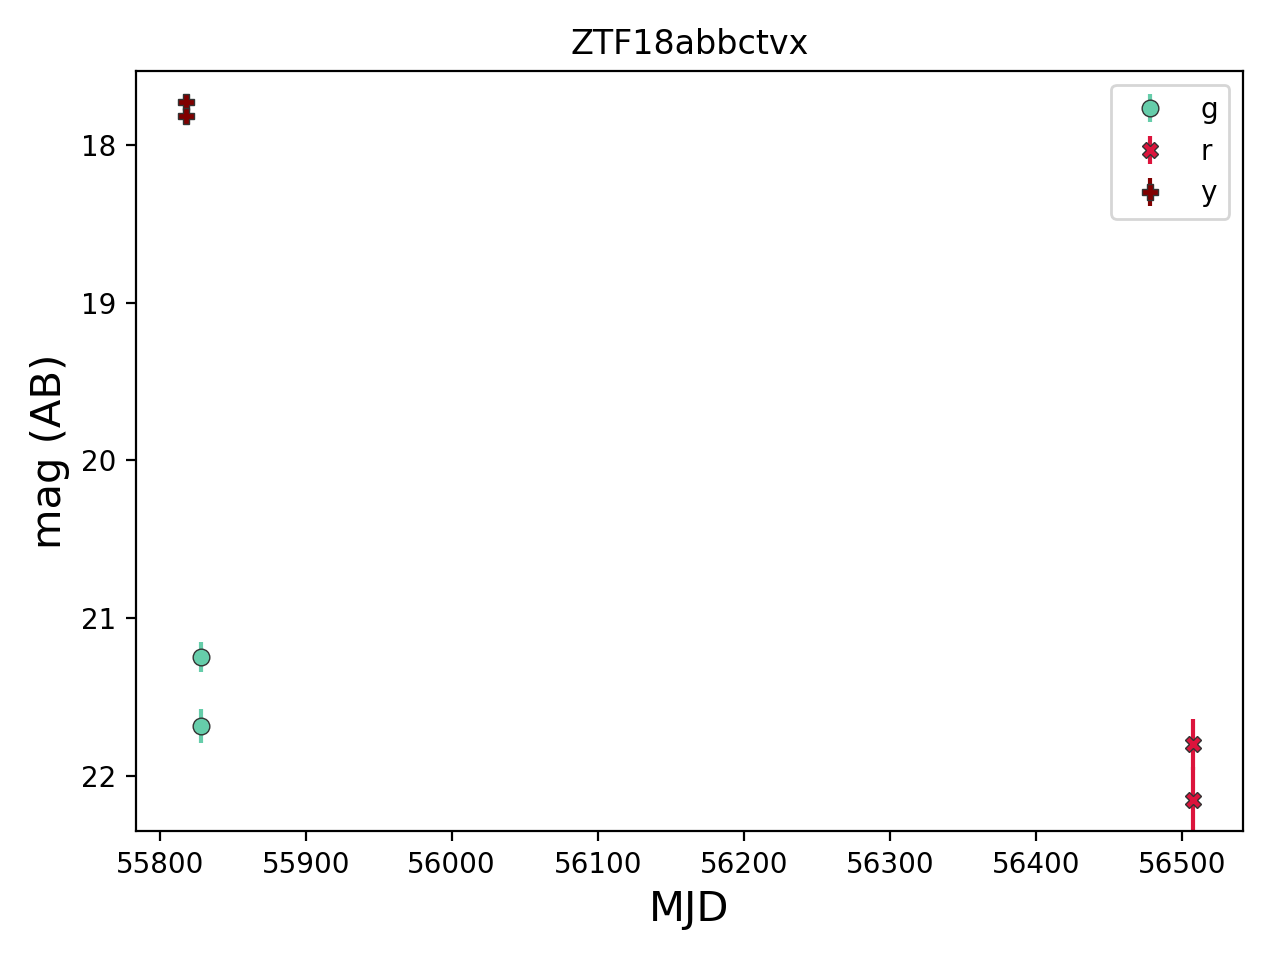

<IPython.core.display.Javascript object>


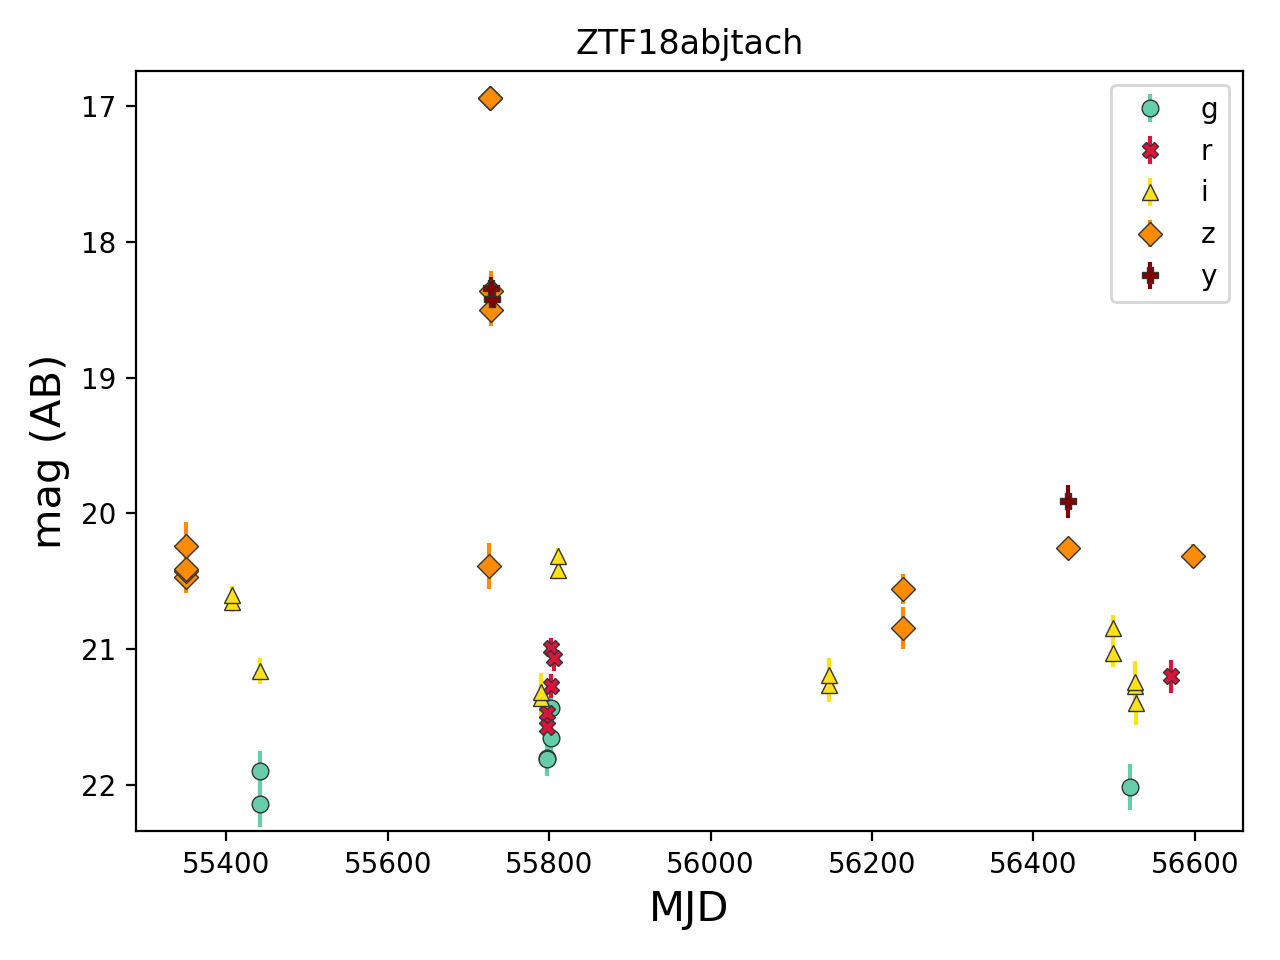

<IPython.core.display.Javascript object>


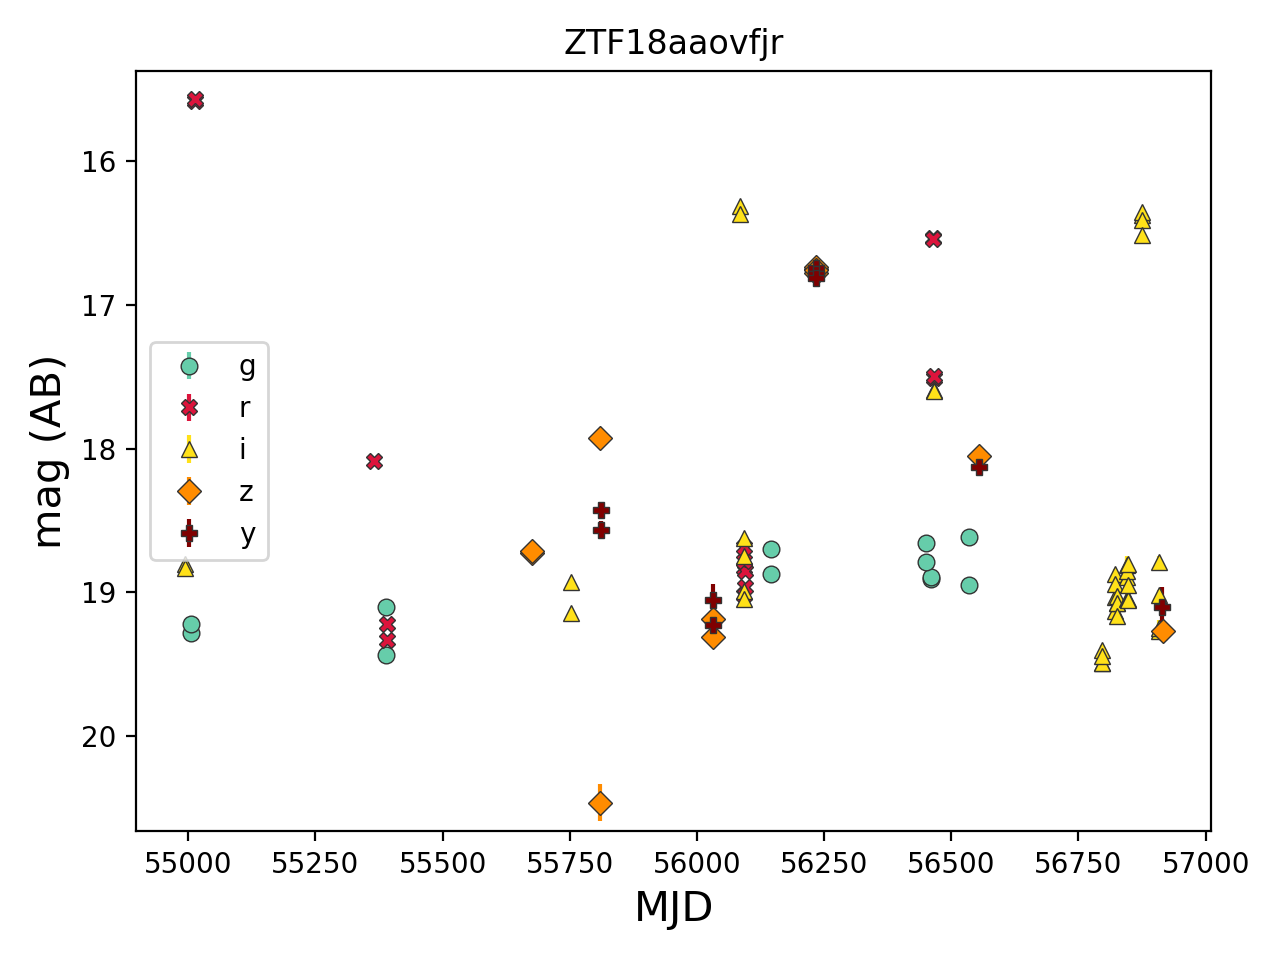

<IPython.core.display.Javascript object>


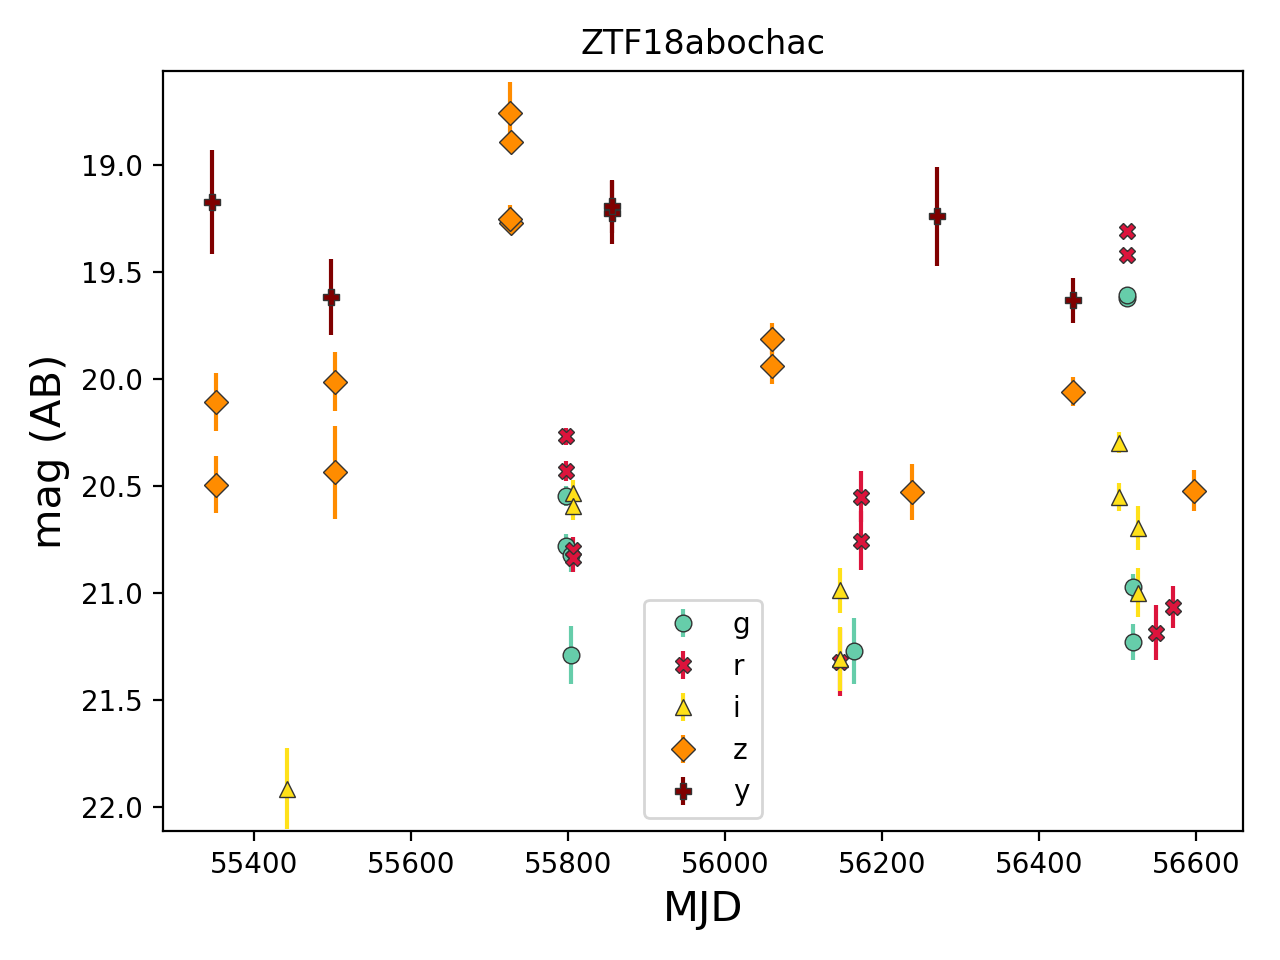

<IPython.core.display.Javascript object>


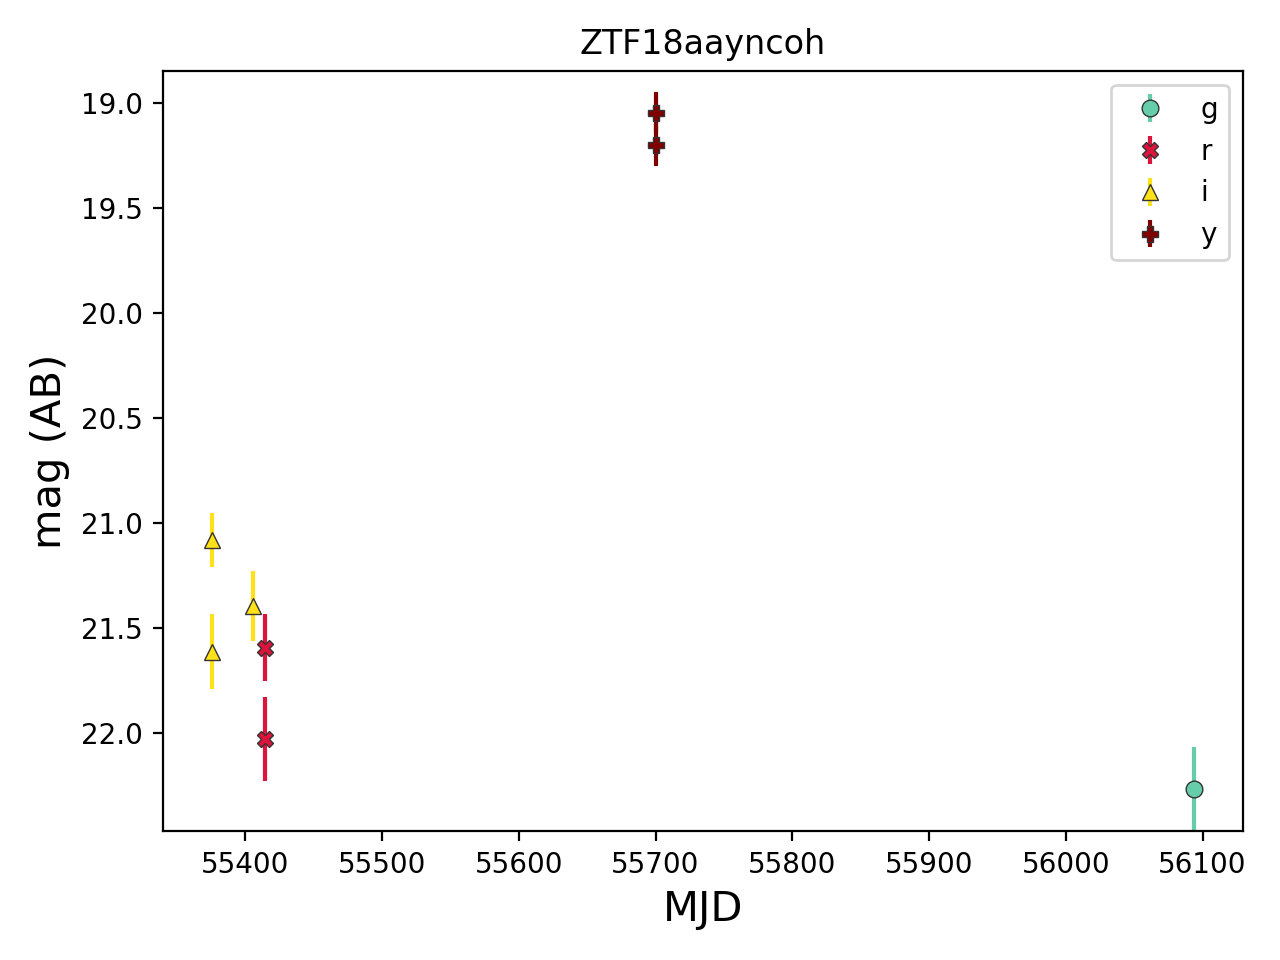

<IPython.core.display.Javascript object>


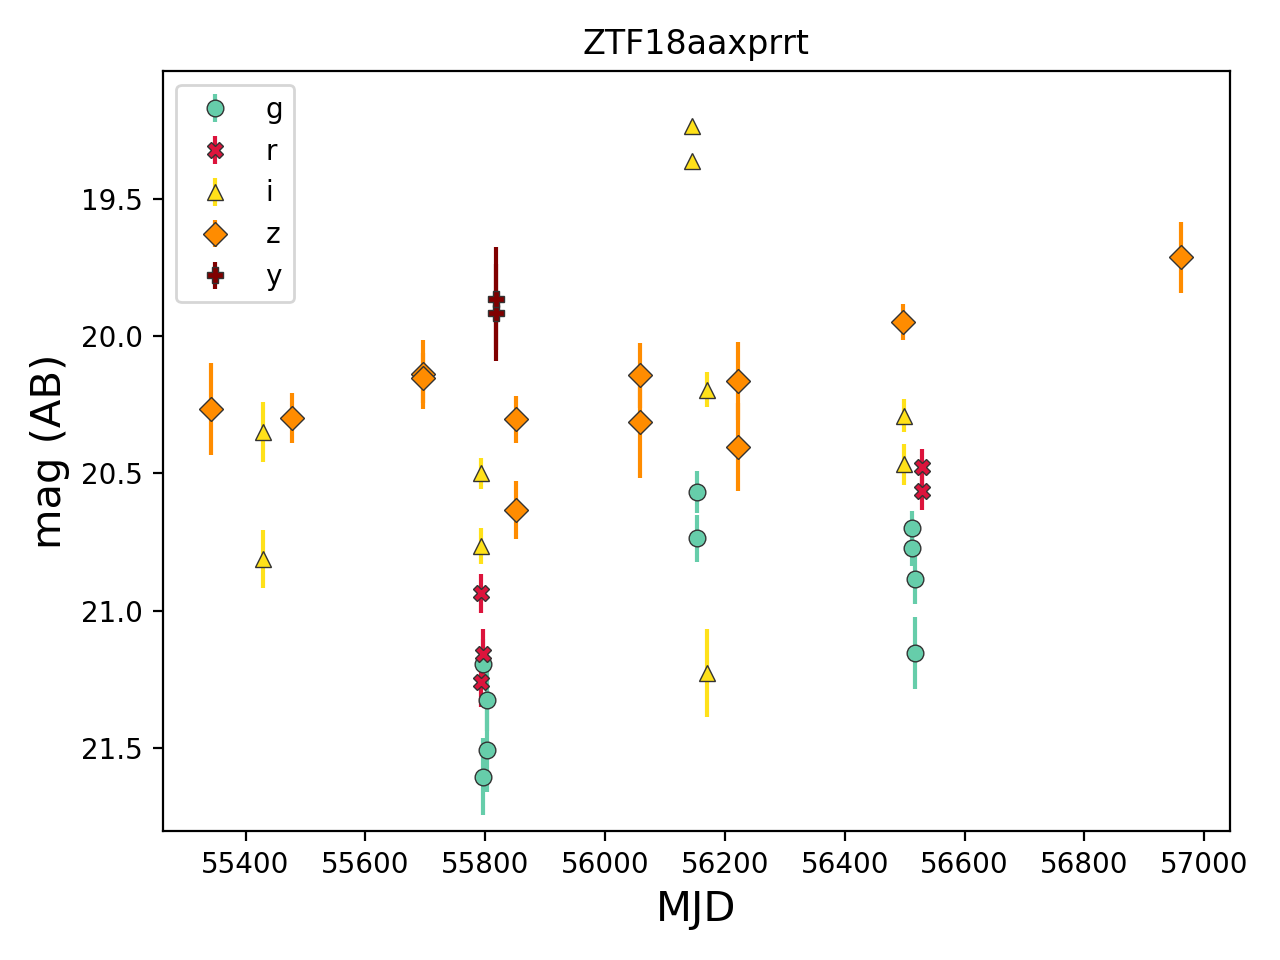

<IPython.core.display.Javascript object>


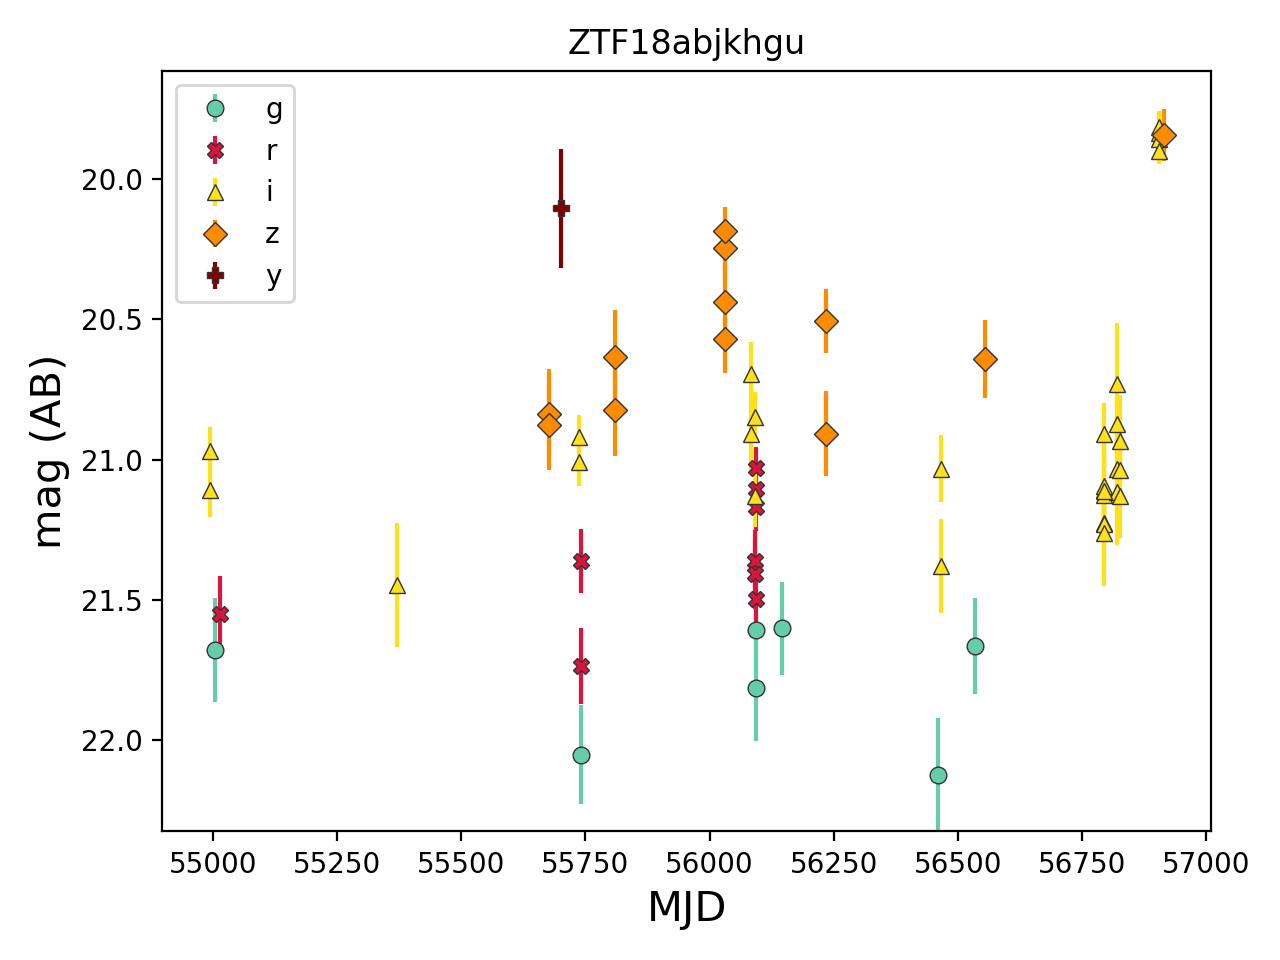

<IPython.core.display.Javascript object>


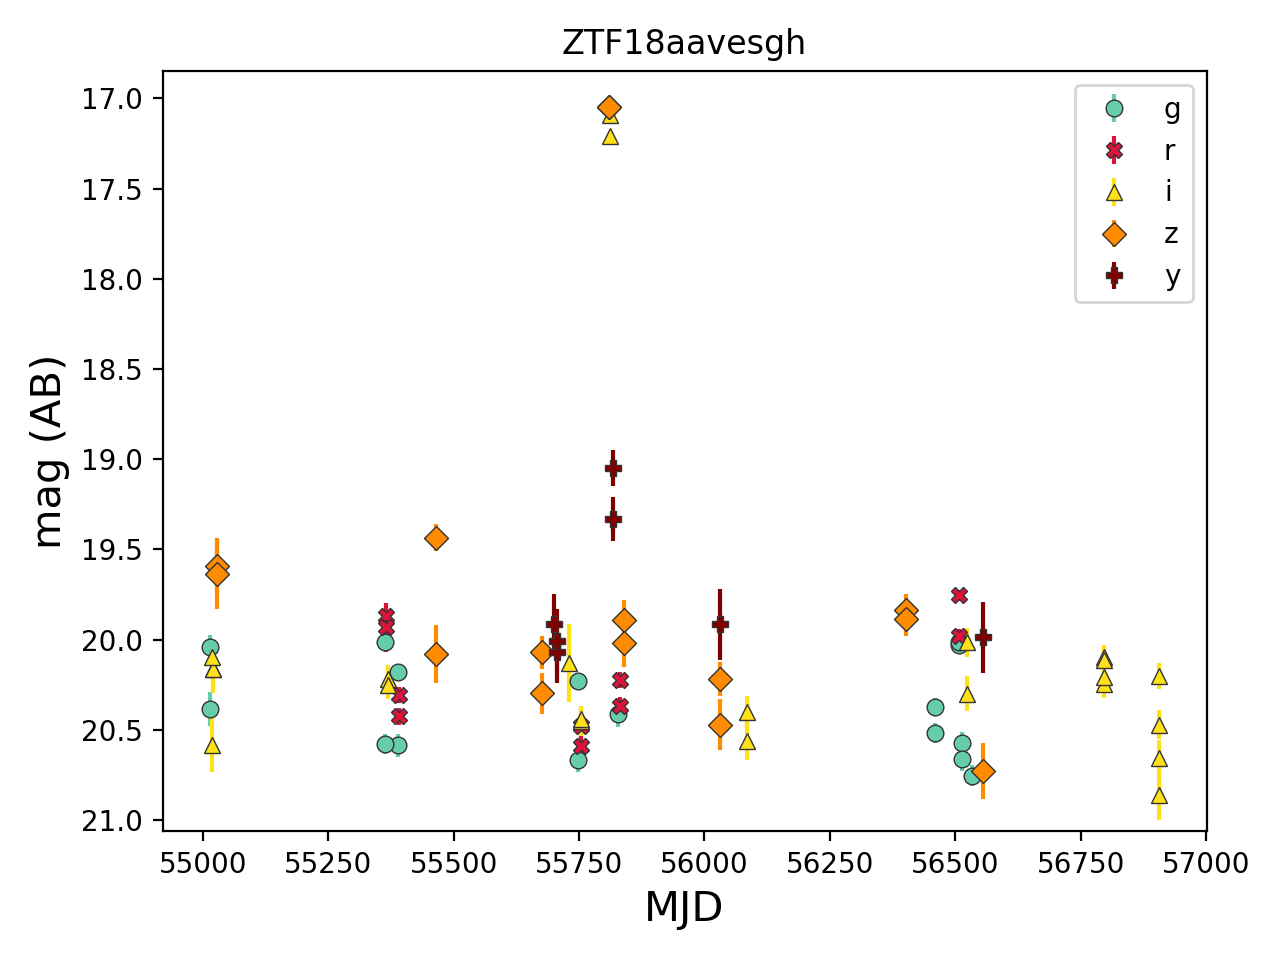

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


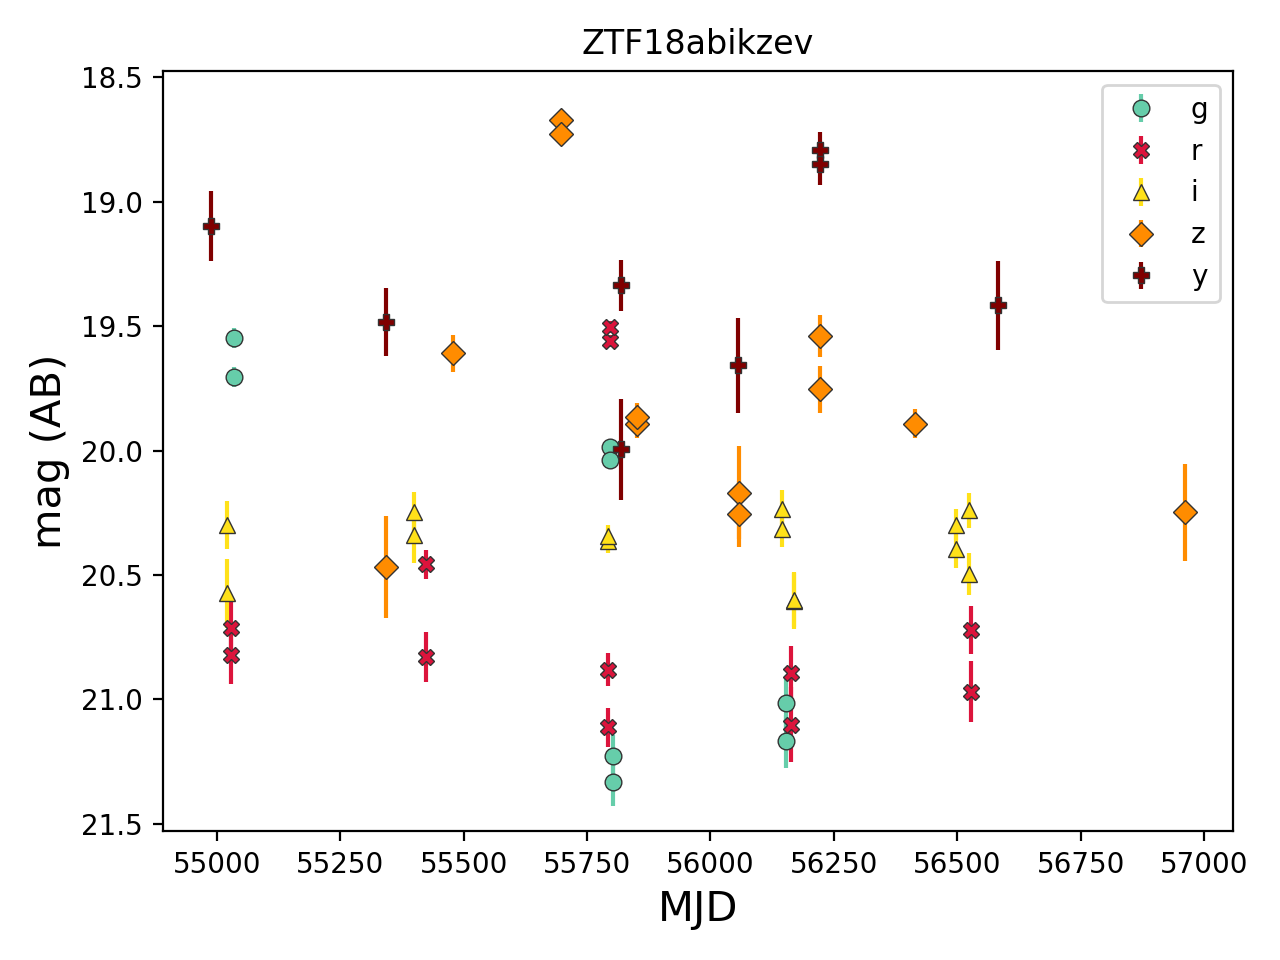

<IPython.core.display.Javascript object>


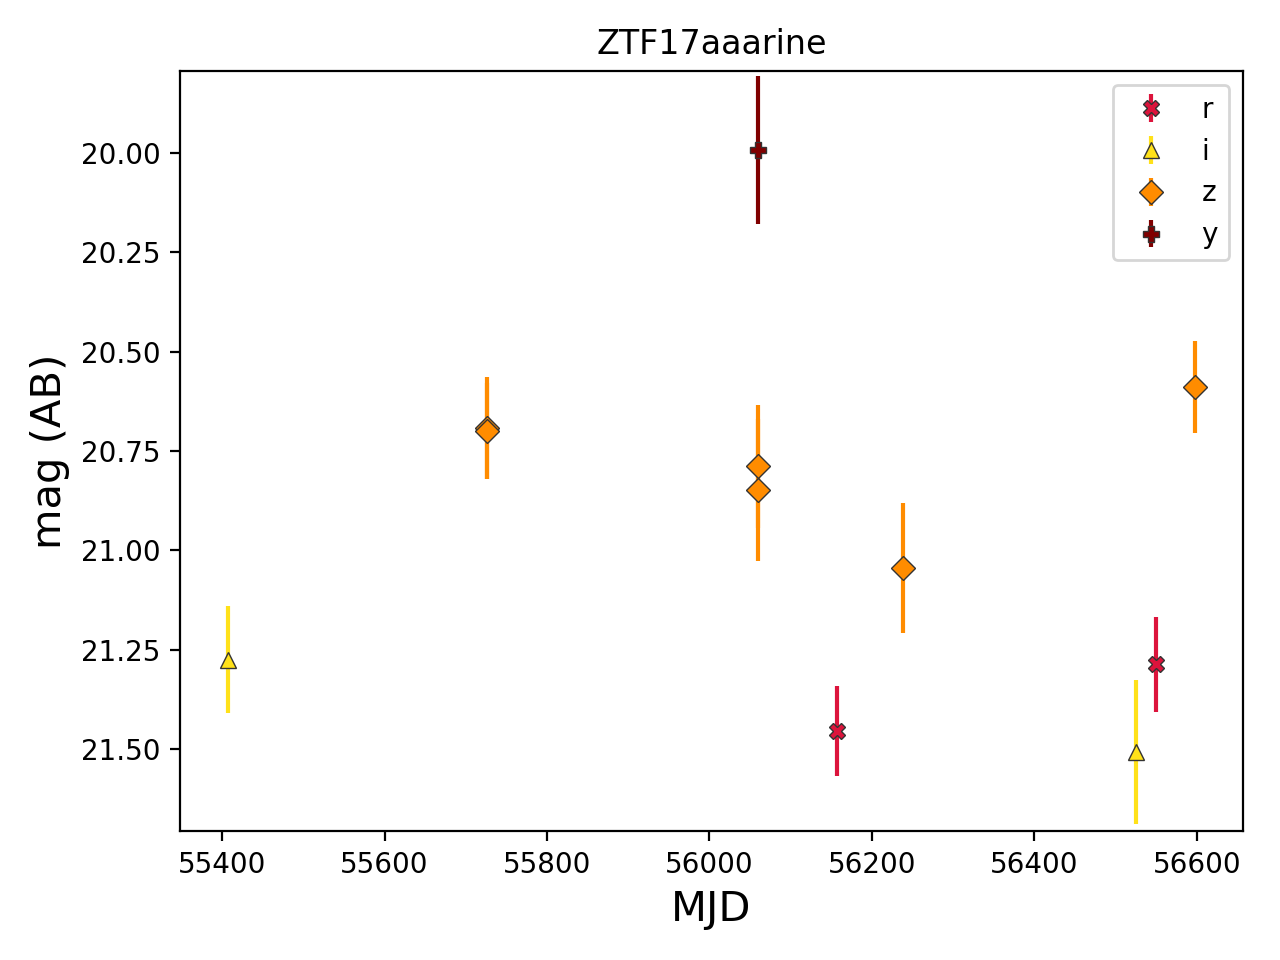

<IPython.core.display.Javascript object>


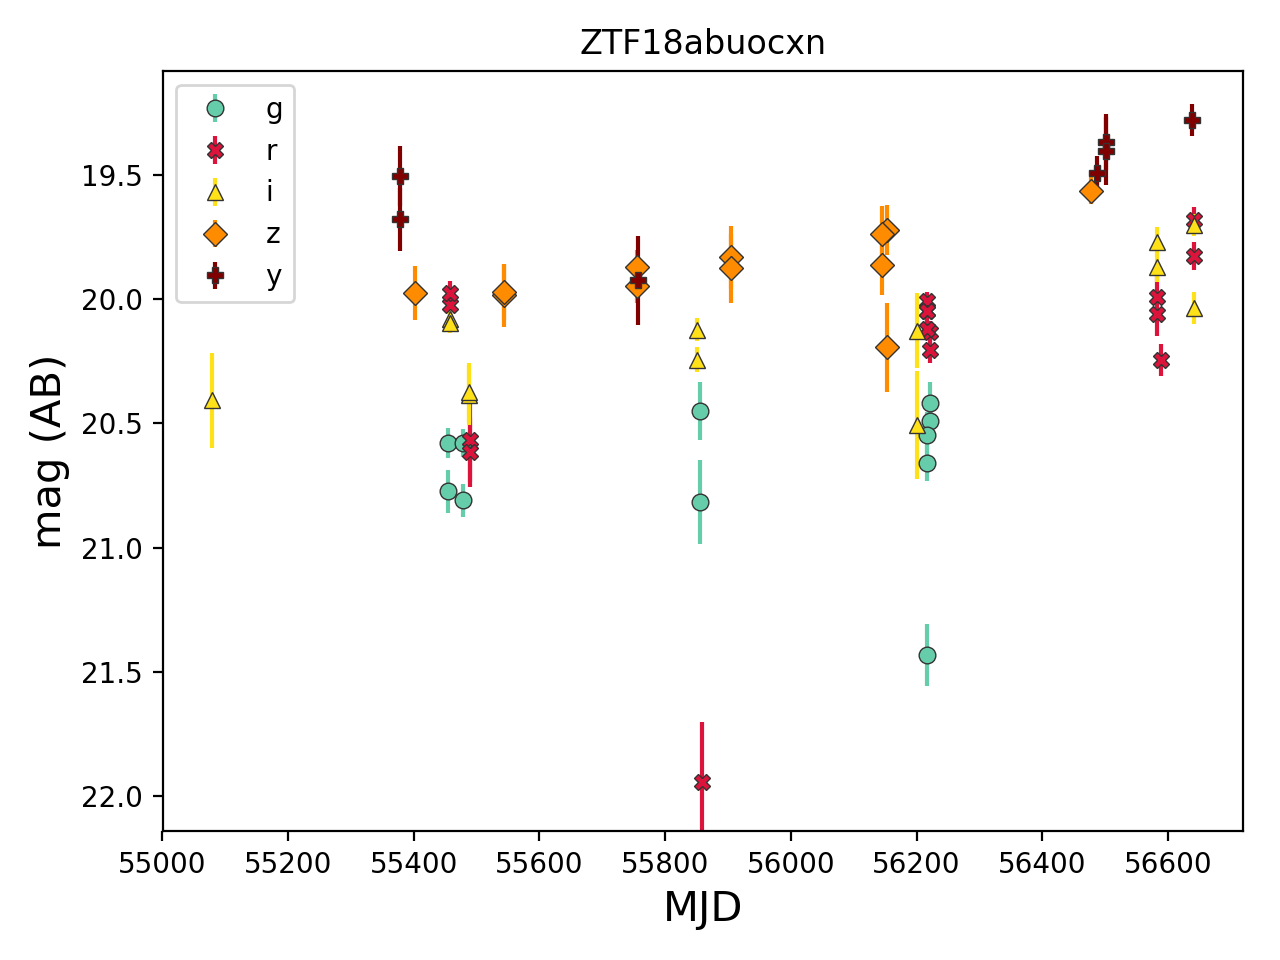

<IPython.core.display.Javascript object>


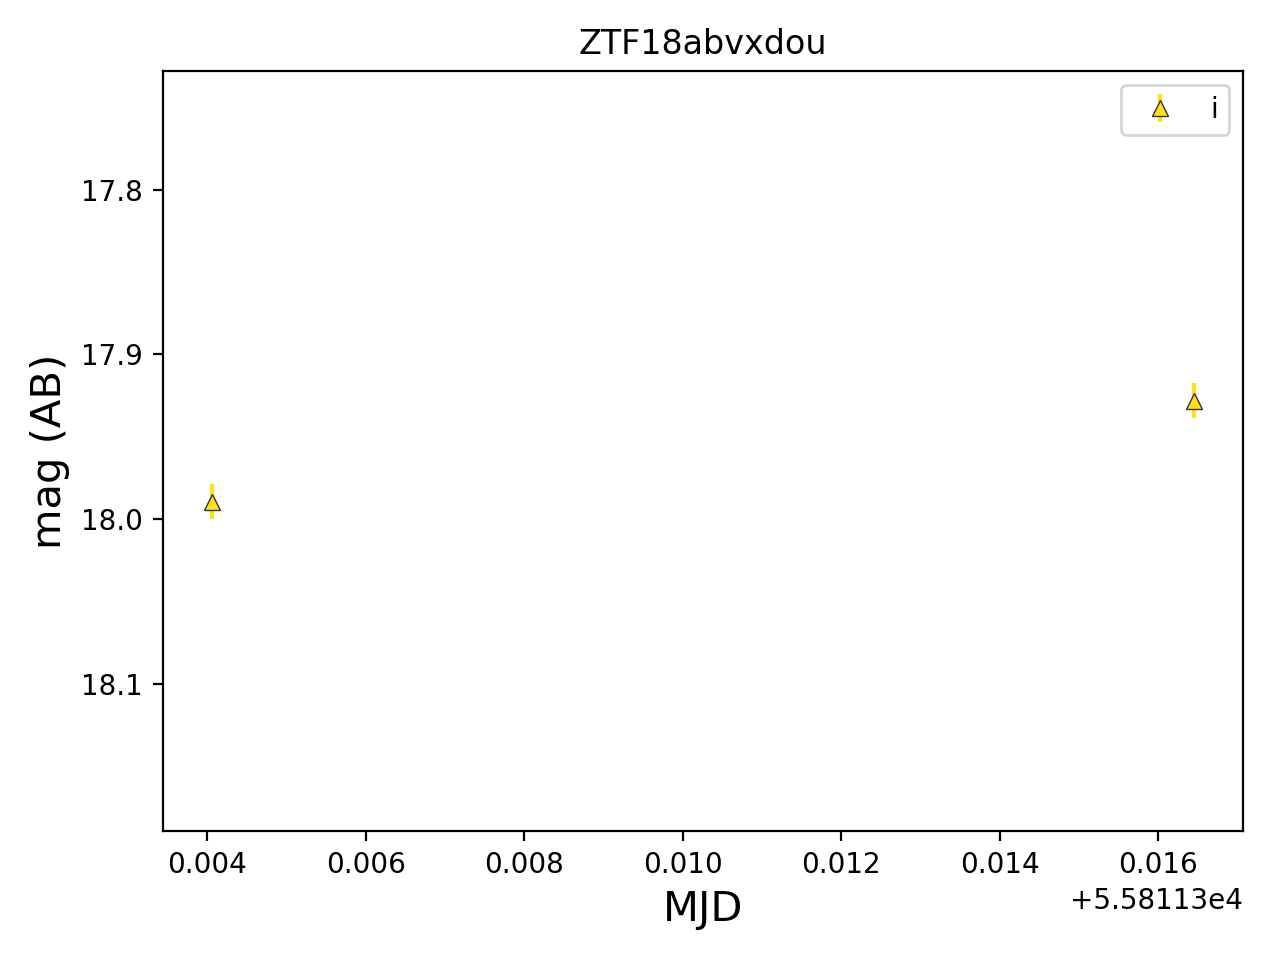

<IPython.core.display.Javascript object>


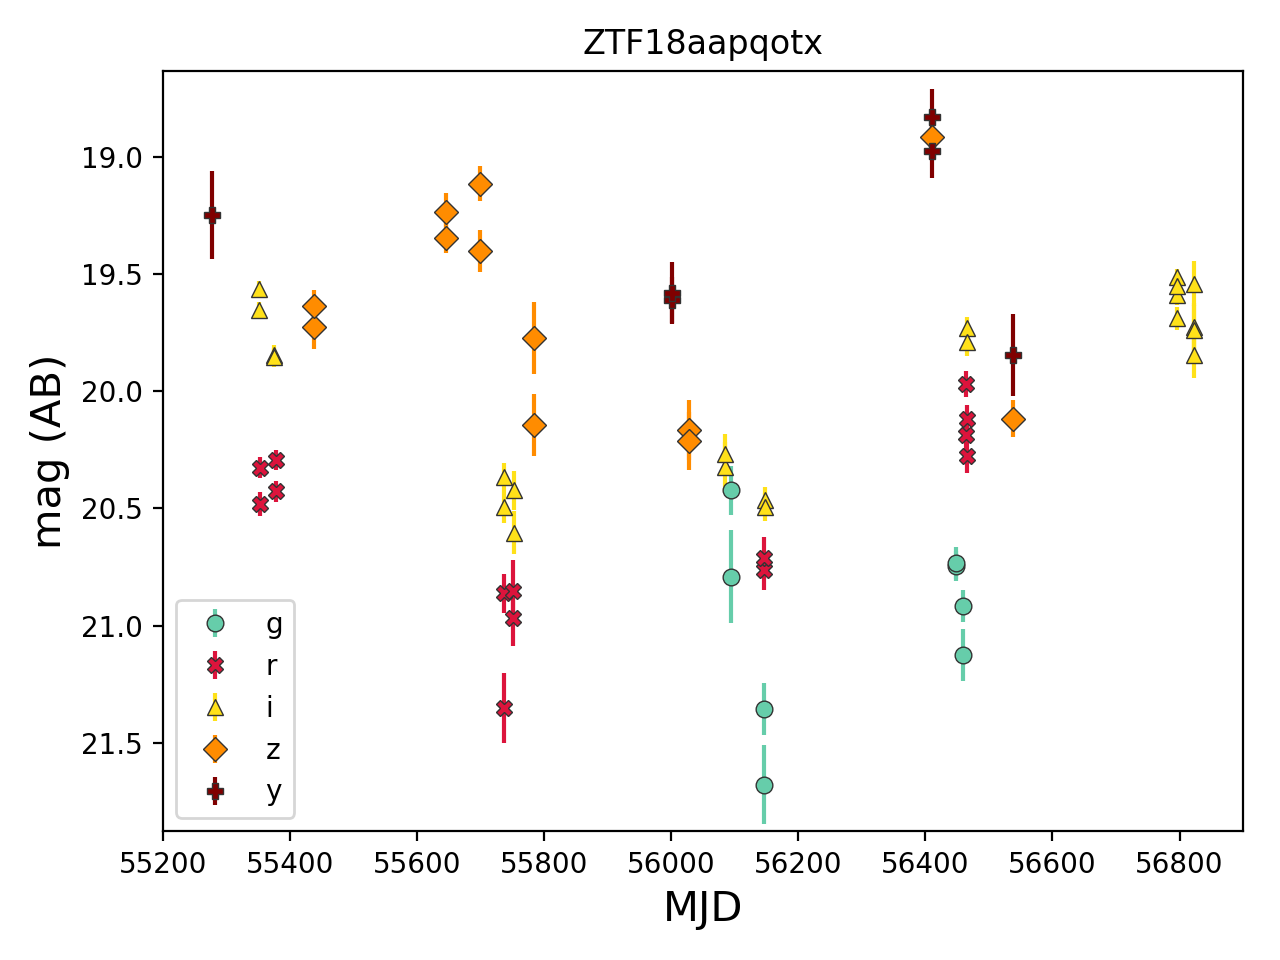

<IPython.core.display.Javascript object>


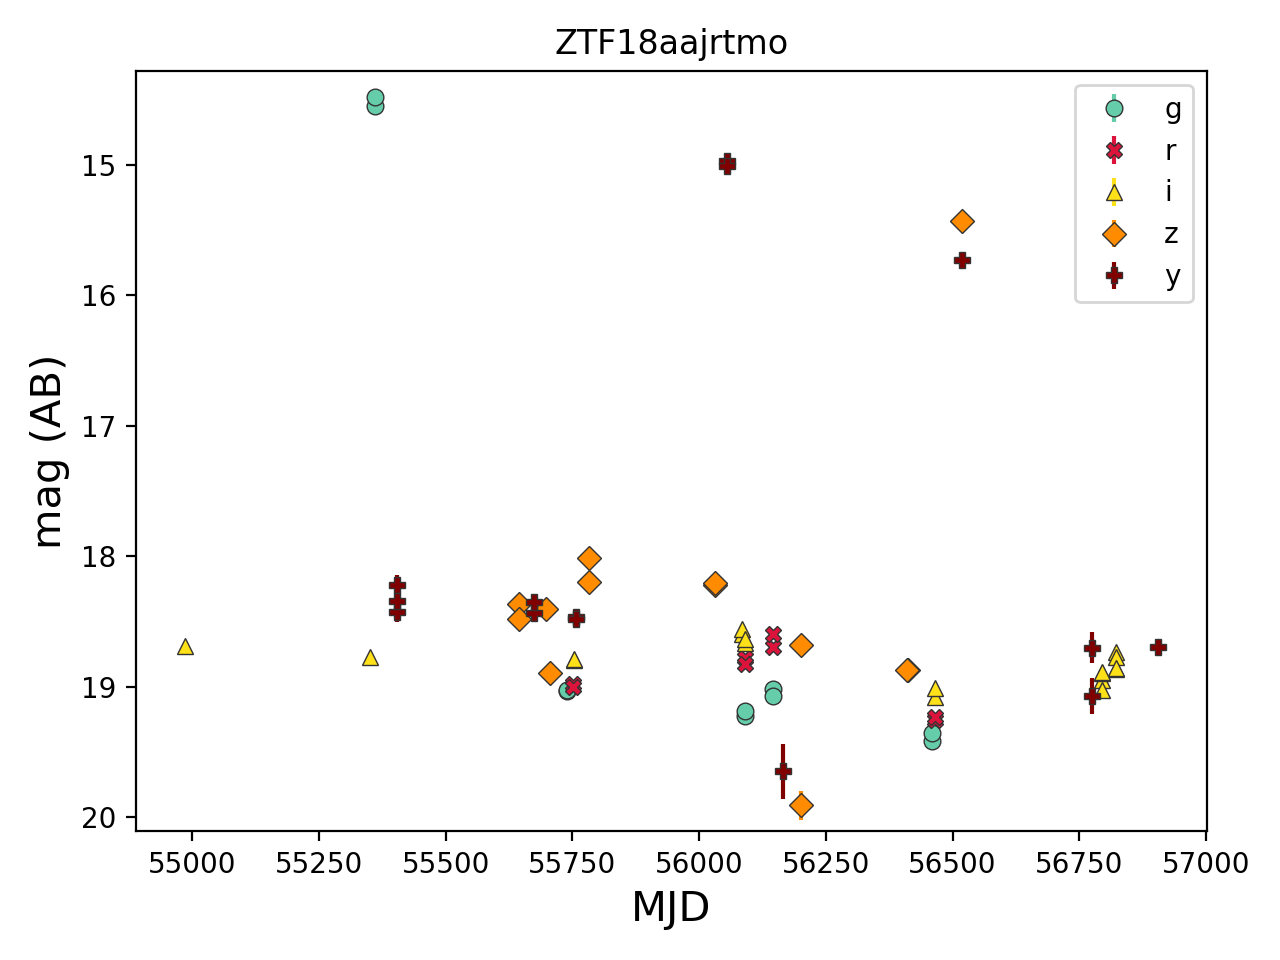

<IPython.core.display.Javascript object>


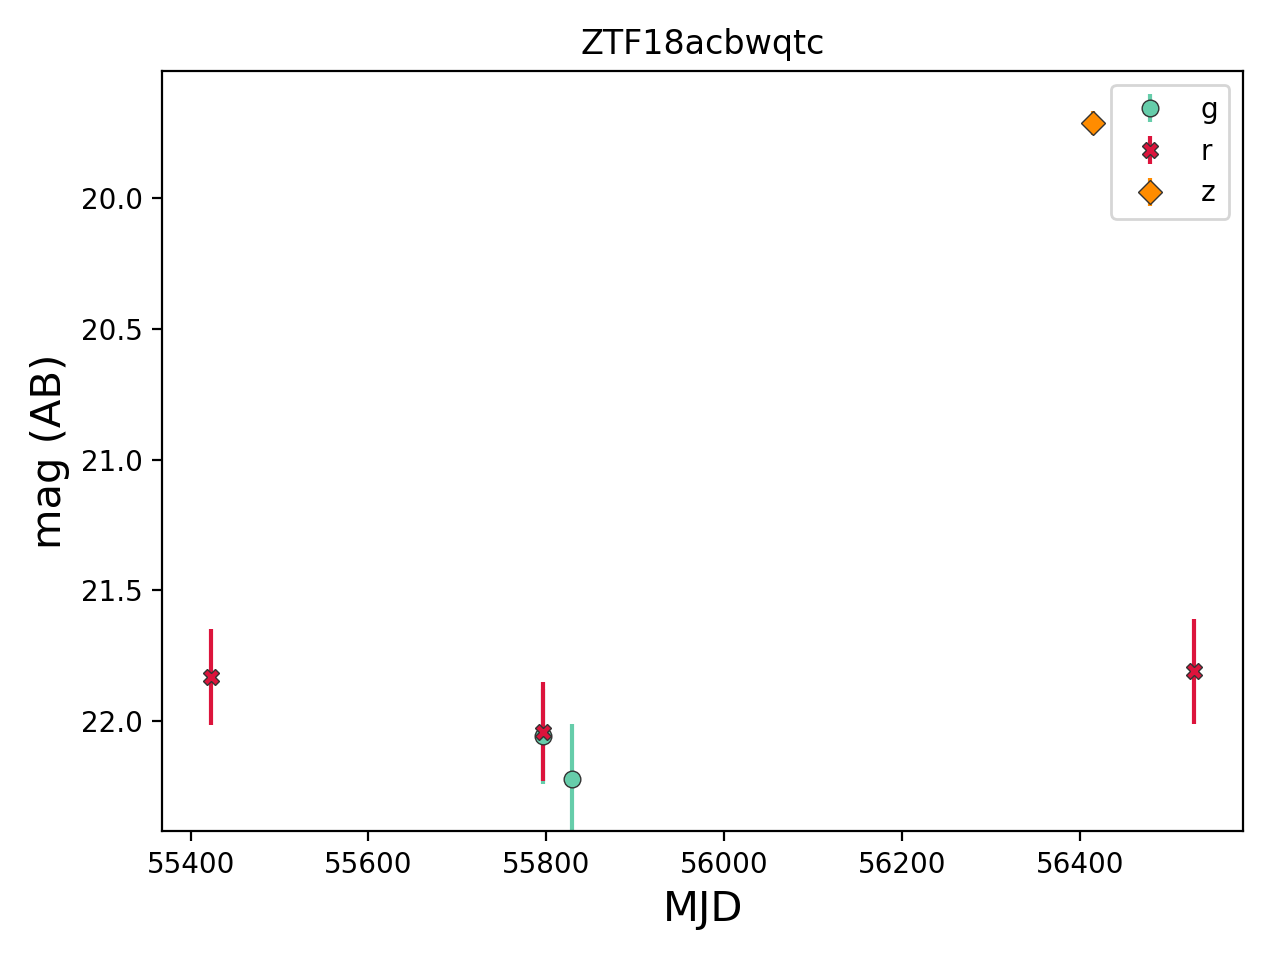

<IPython.core.display.Javascript object>


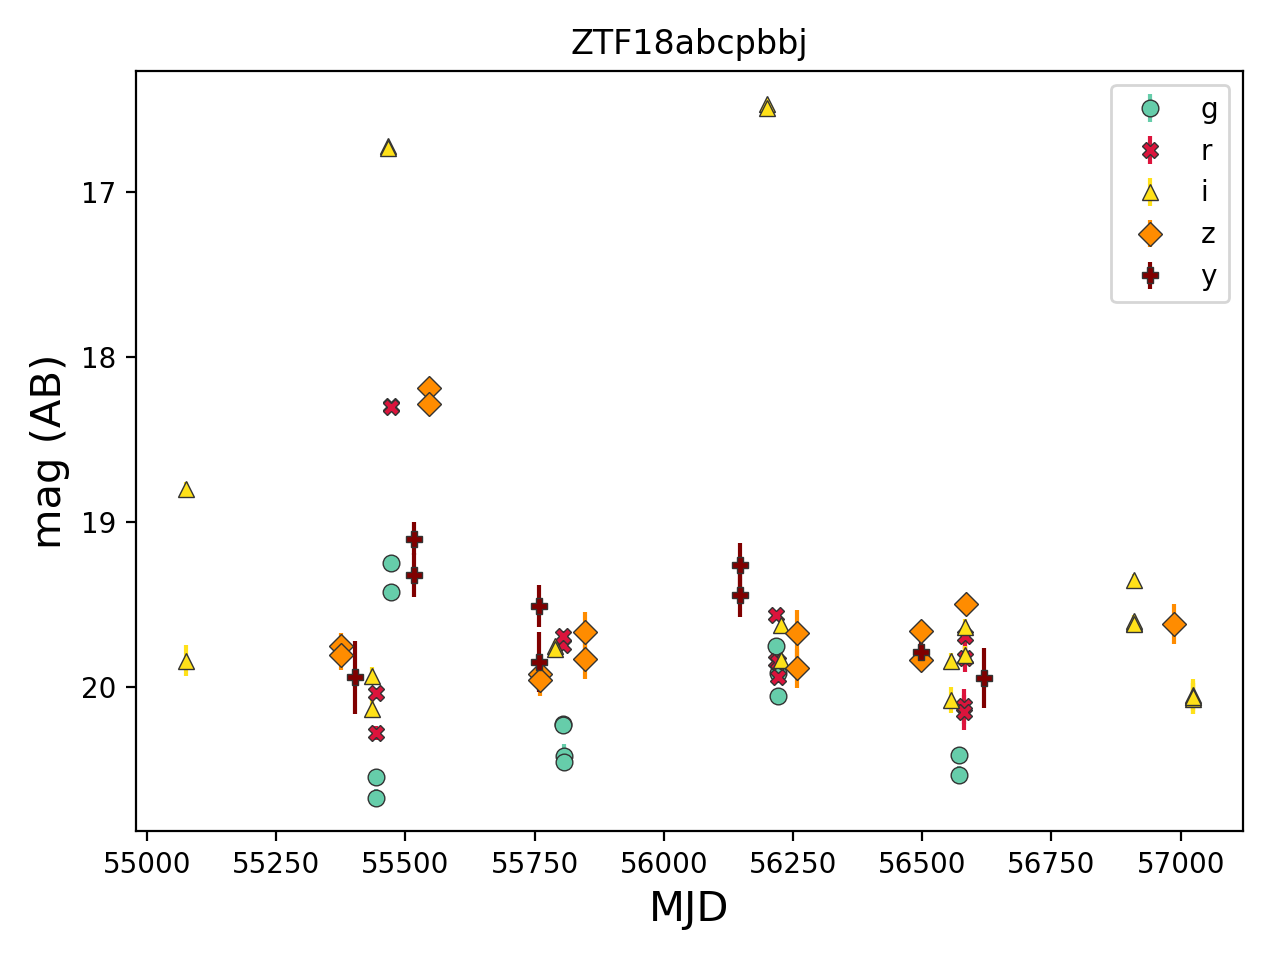

<IPython.core.display.Javascript object>


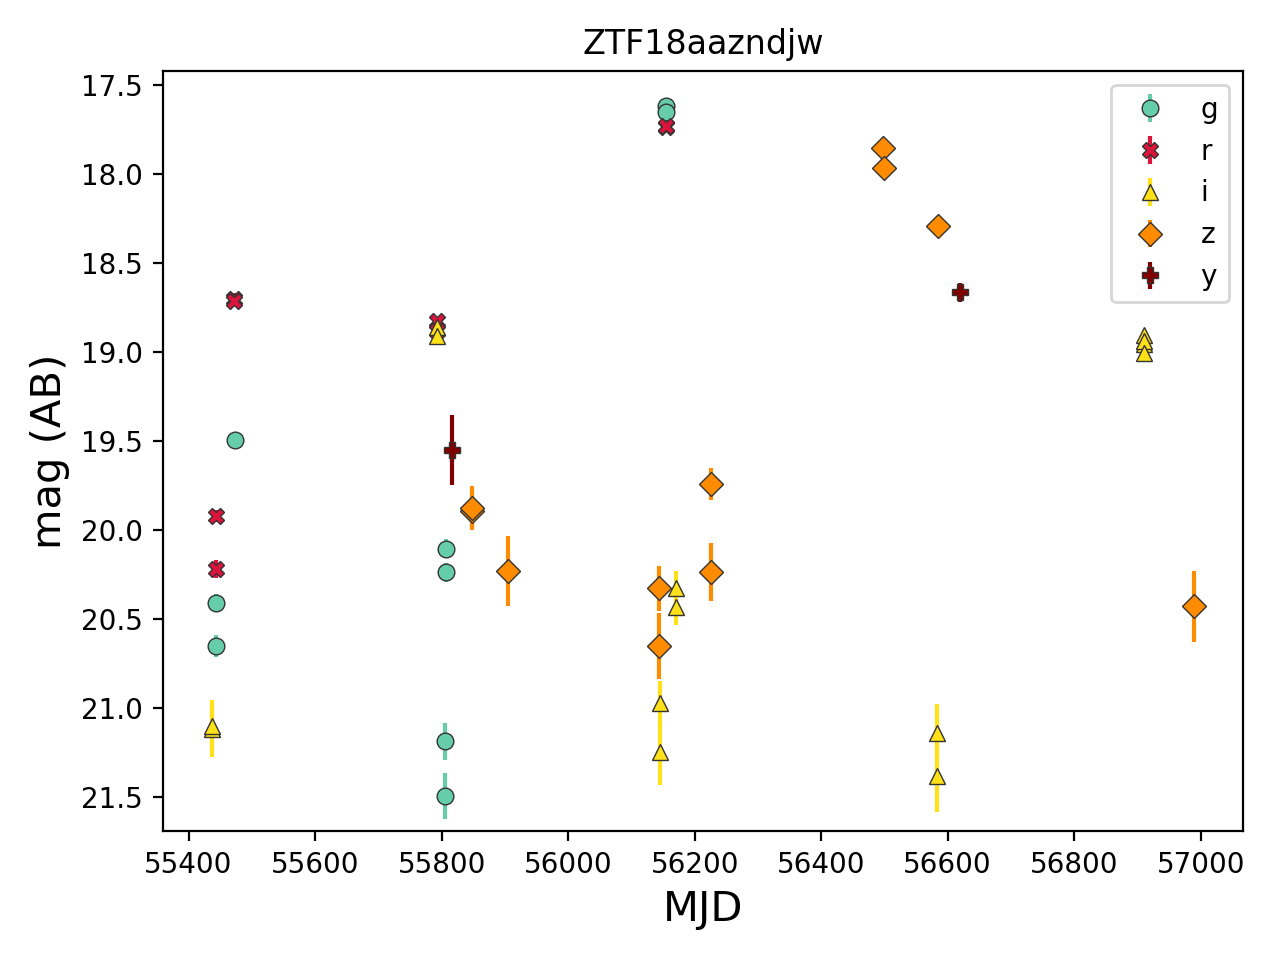

<IPython.core.display.Javascript object>


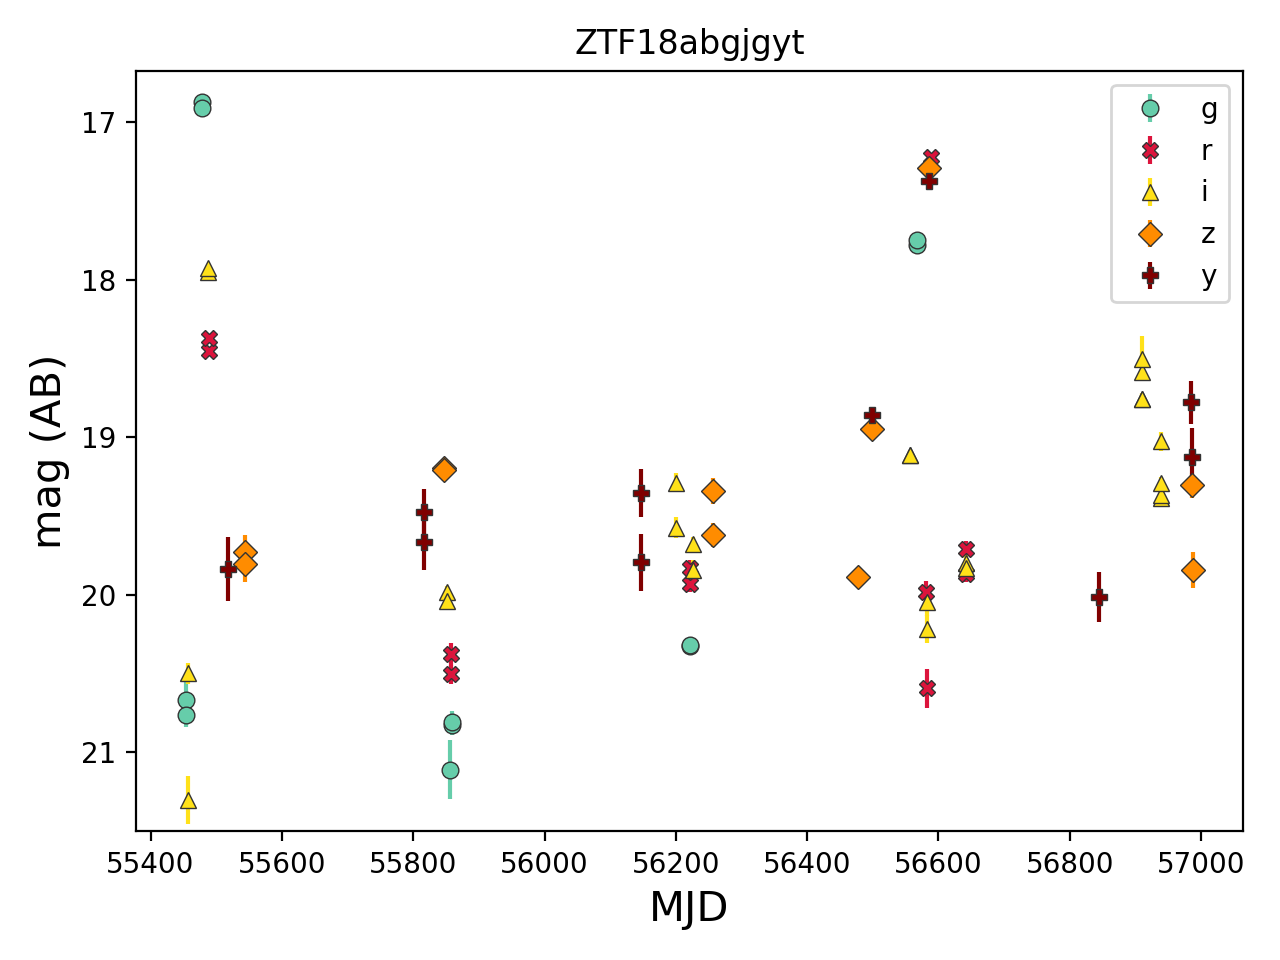

<IPython.core.display.Javascript object>


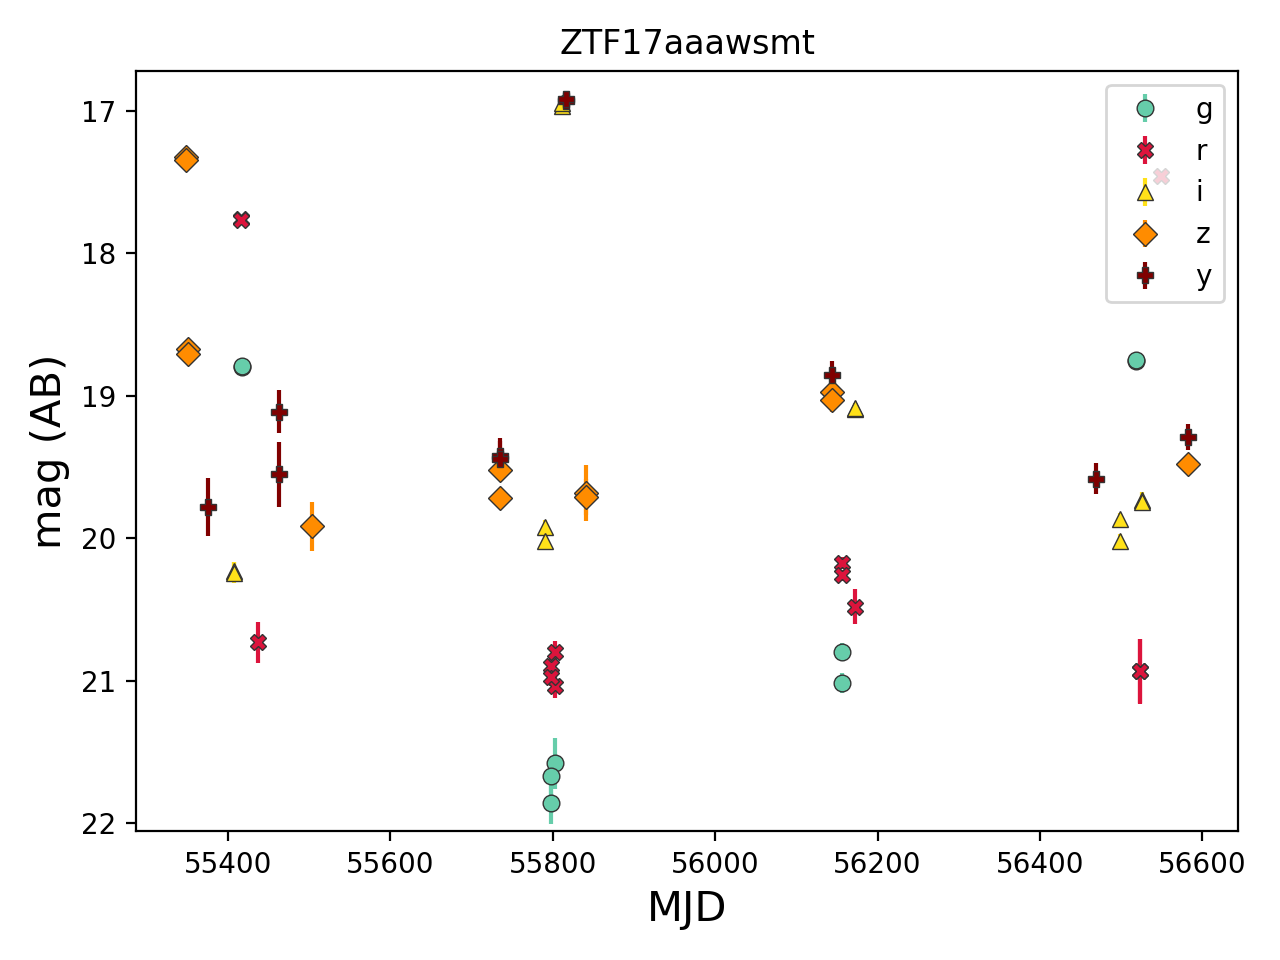

<IPython.core.display.Javascript object>


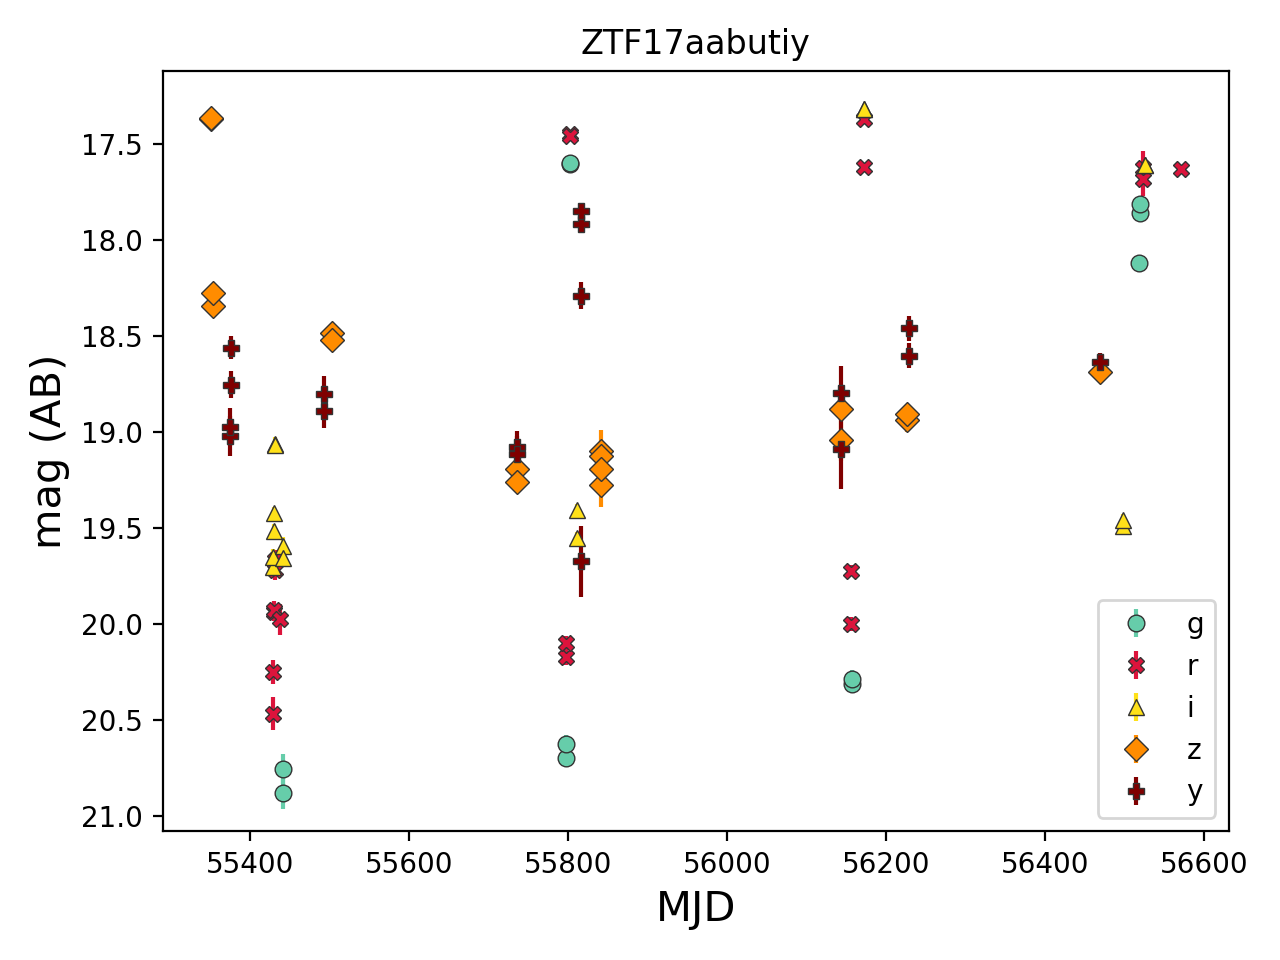

<IPython.core.display.Javascript object>


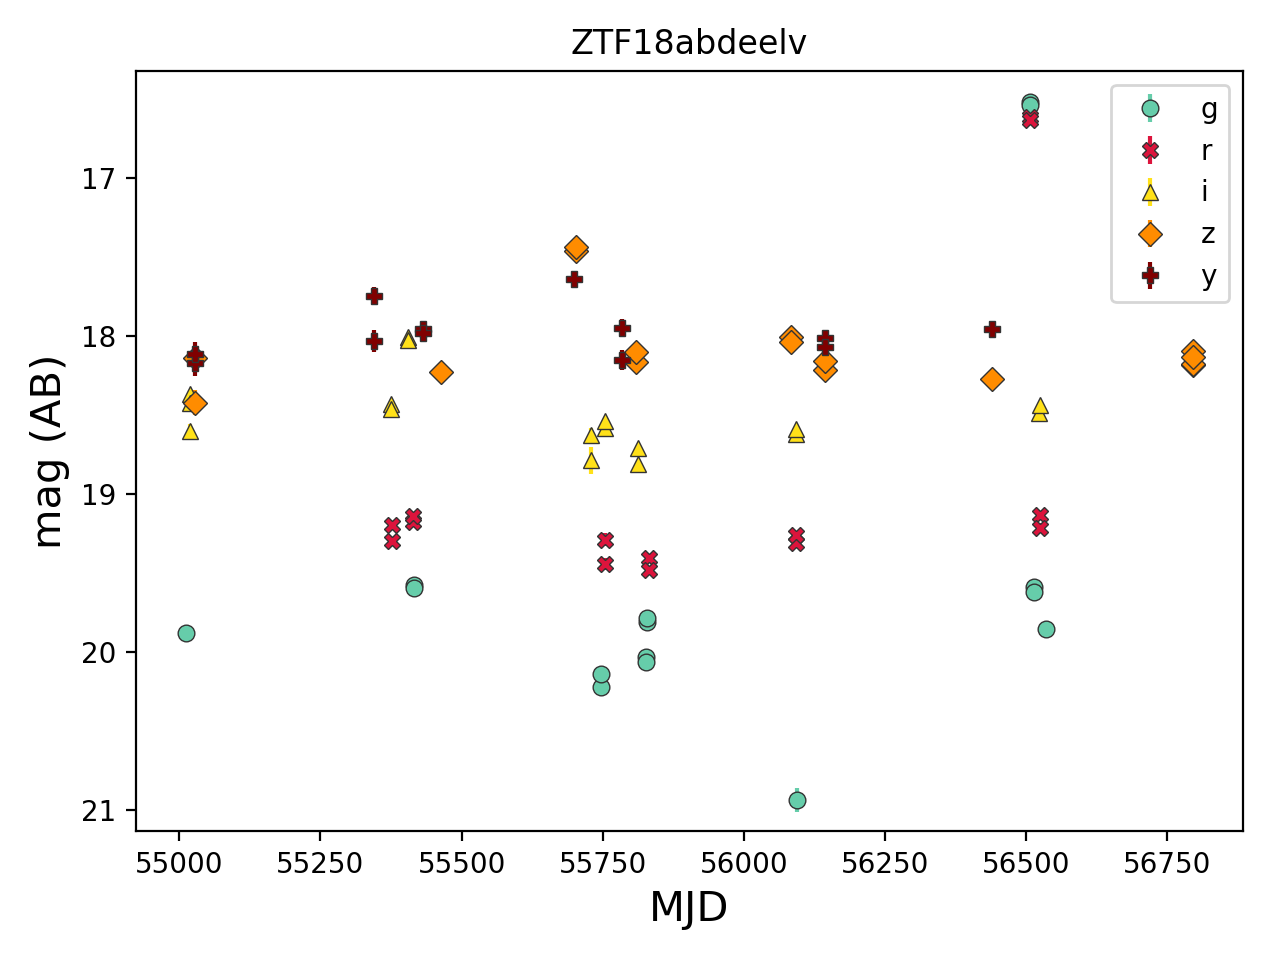

<IPython.core.display.Javascript object>


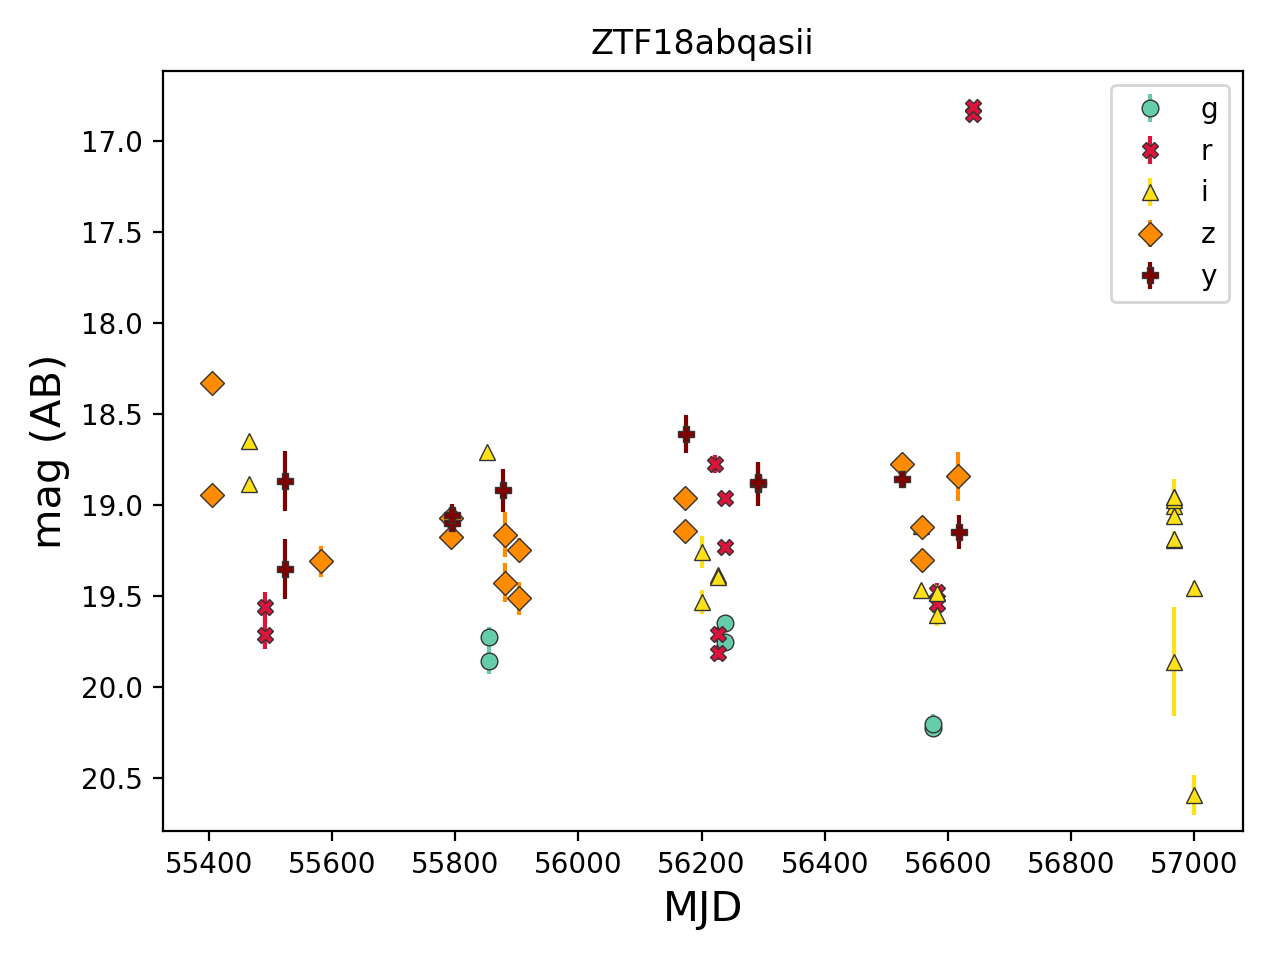

<IPython.core.display.Javascript object>


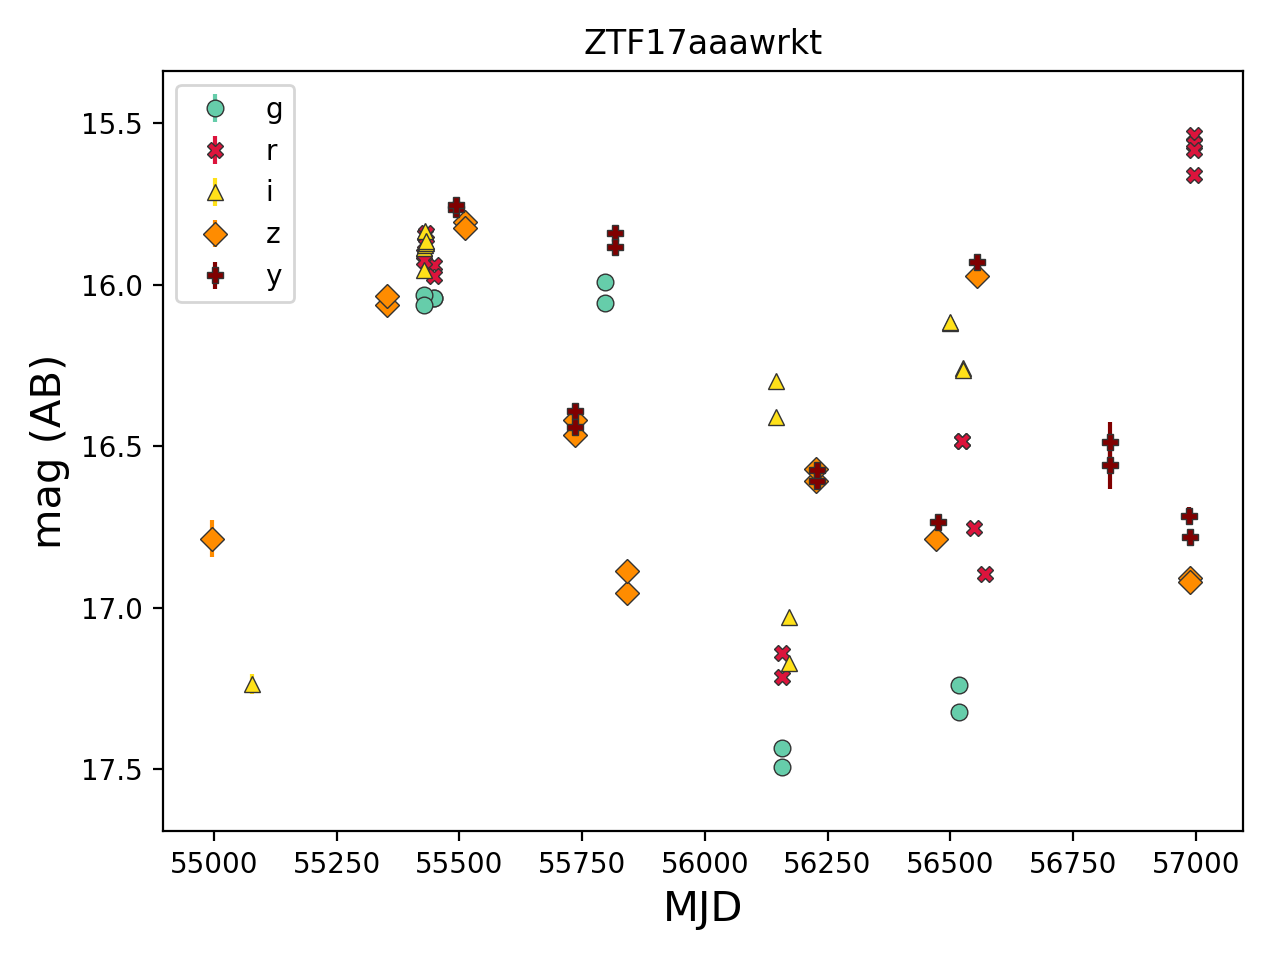

<IPython.core.display.Javascript object>


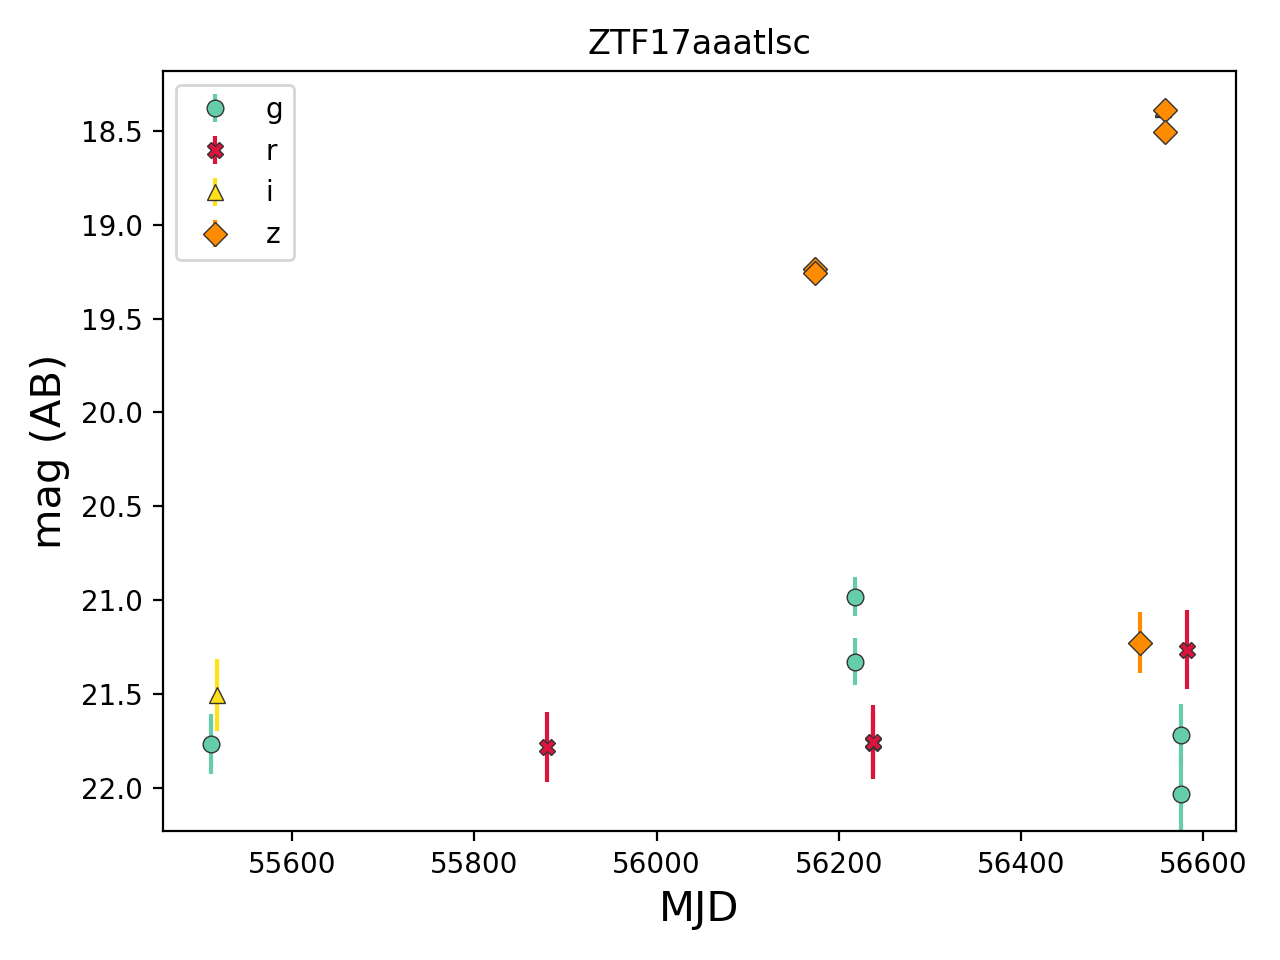

<IPython.core.display.Javascript object>


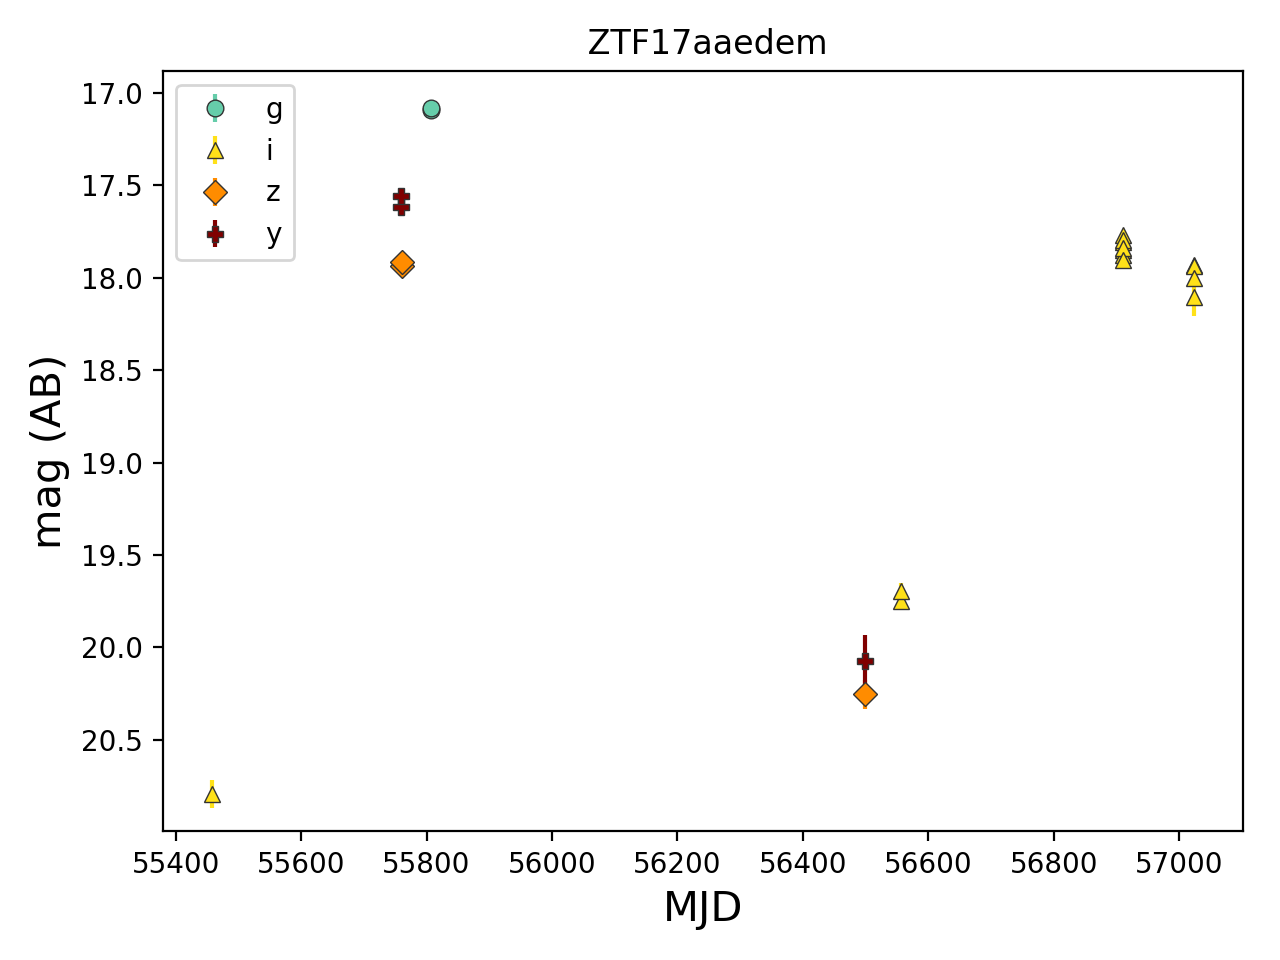

<IPython.core.display.Javascript object>


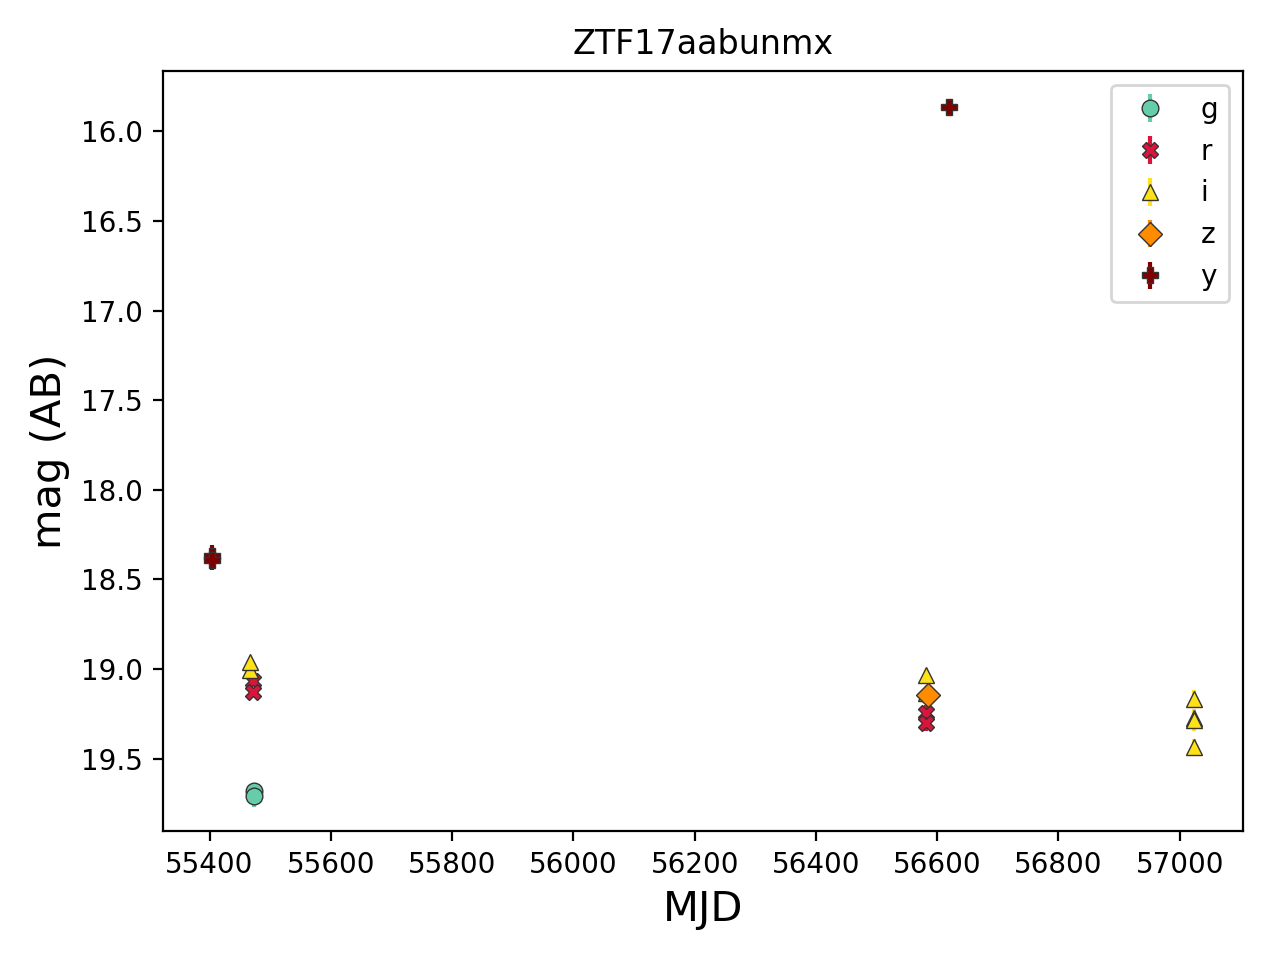

<IPython.core.display.Javascript object>


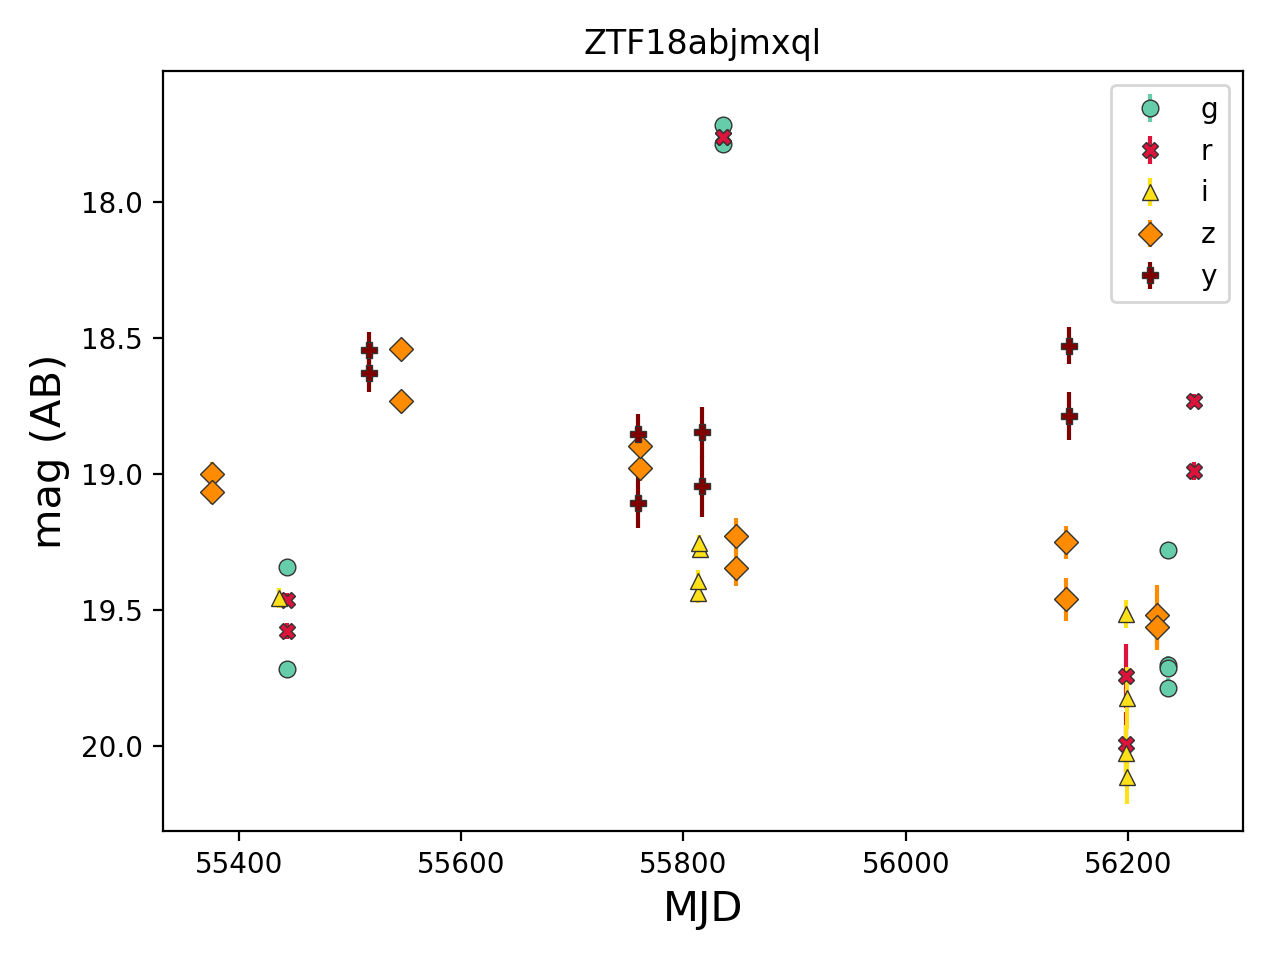

<IPython.core.display.Javascript object>


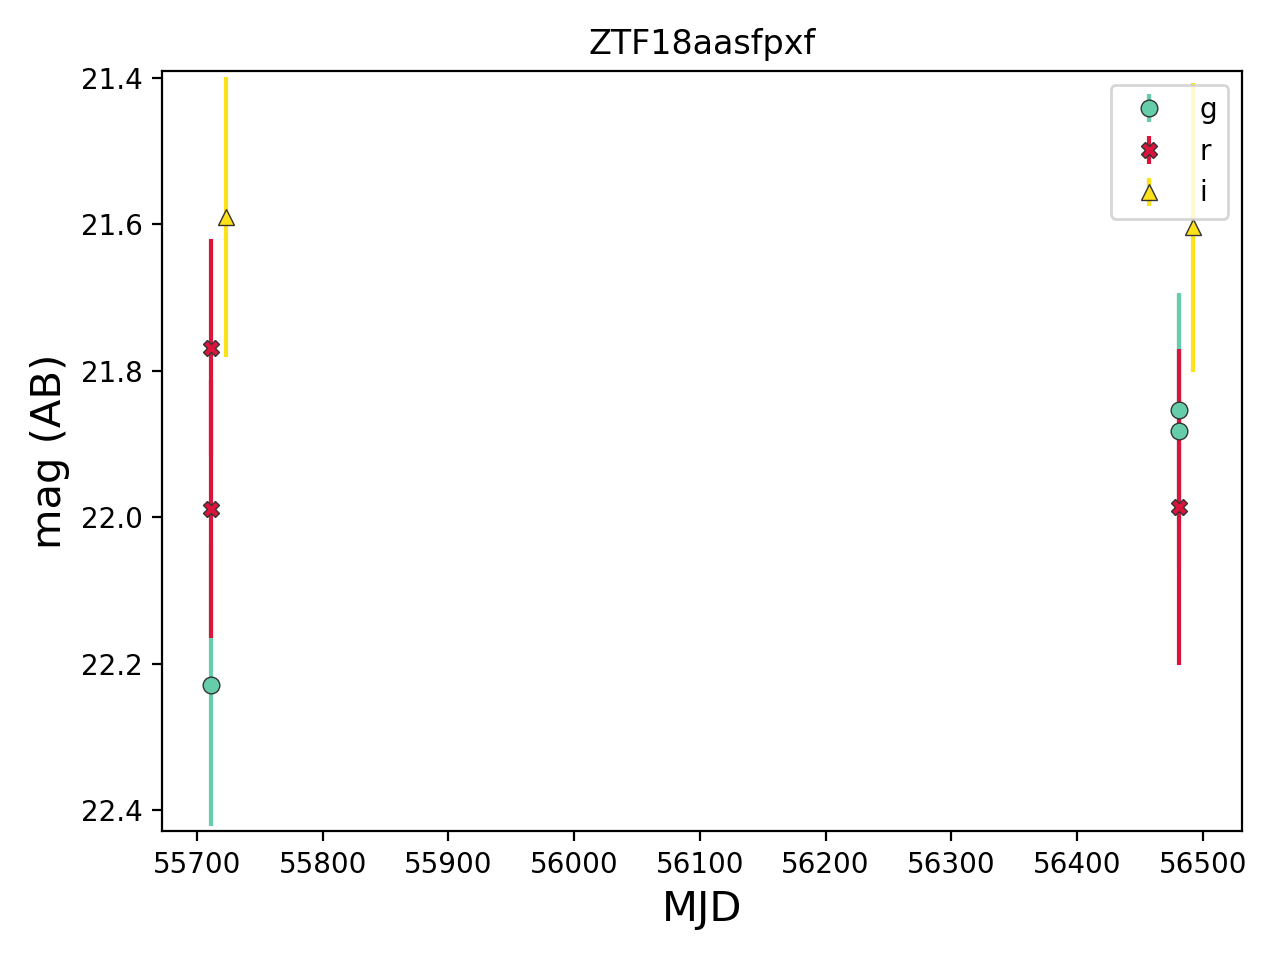

<IPython.core.display.Javascript object>


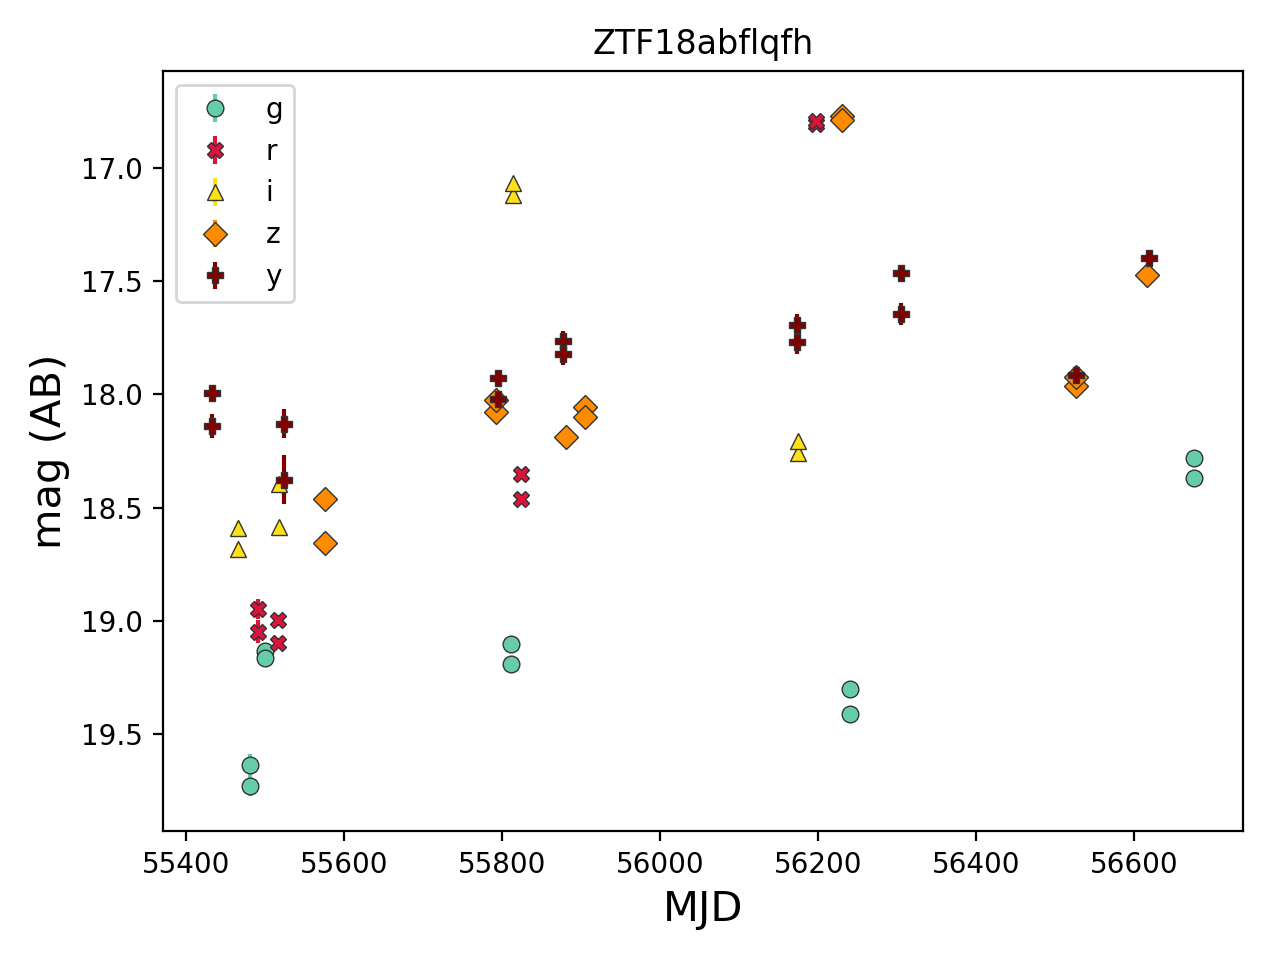

<IPython.core.display.Javascript object>


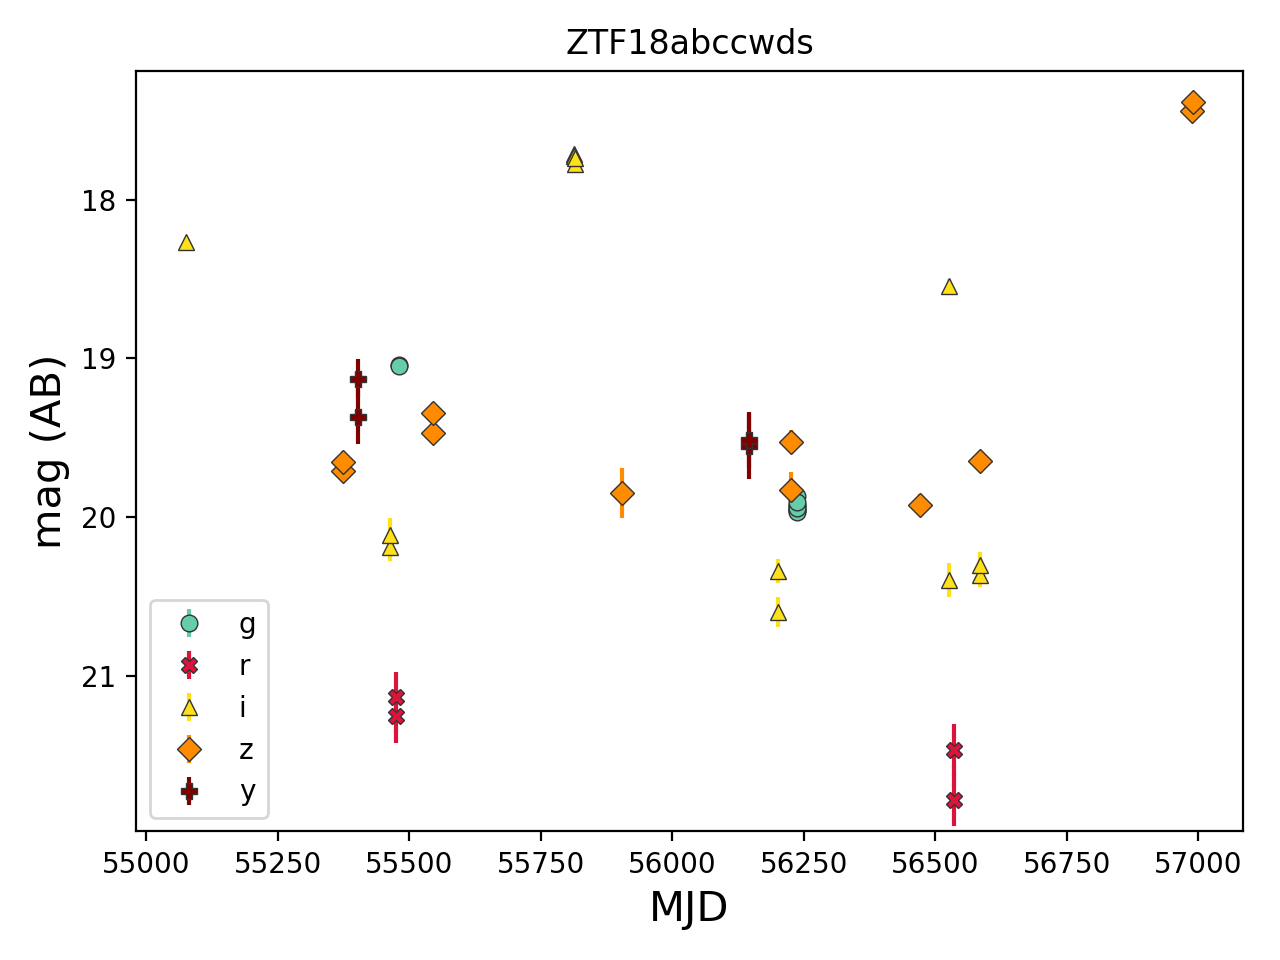

<IPython.core.display.Javascript object>


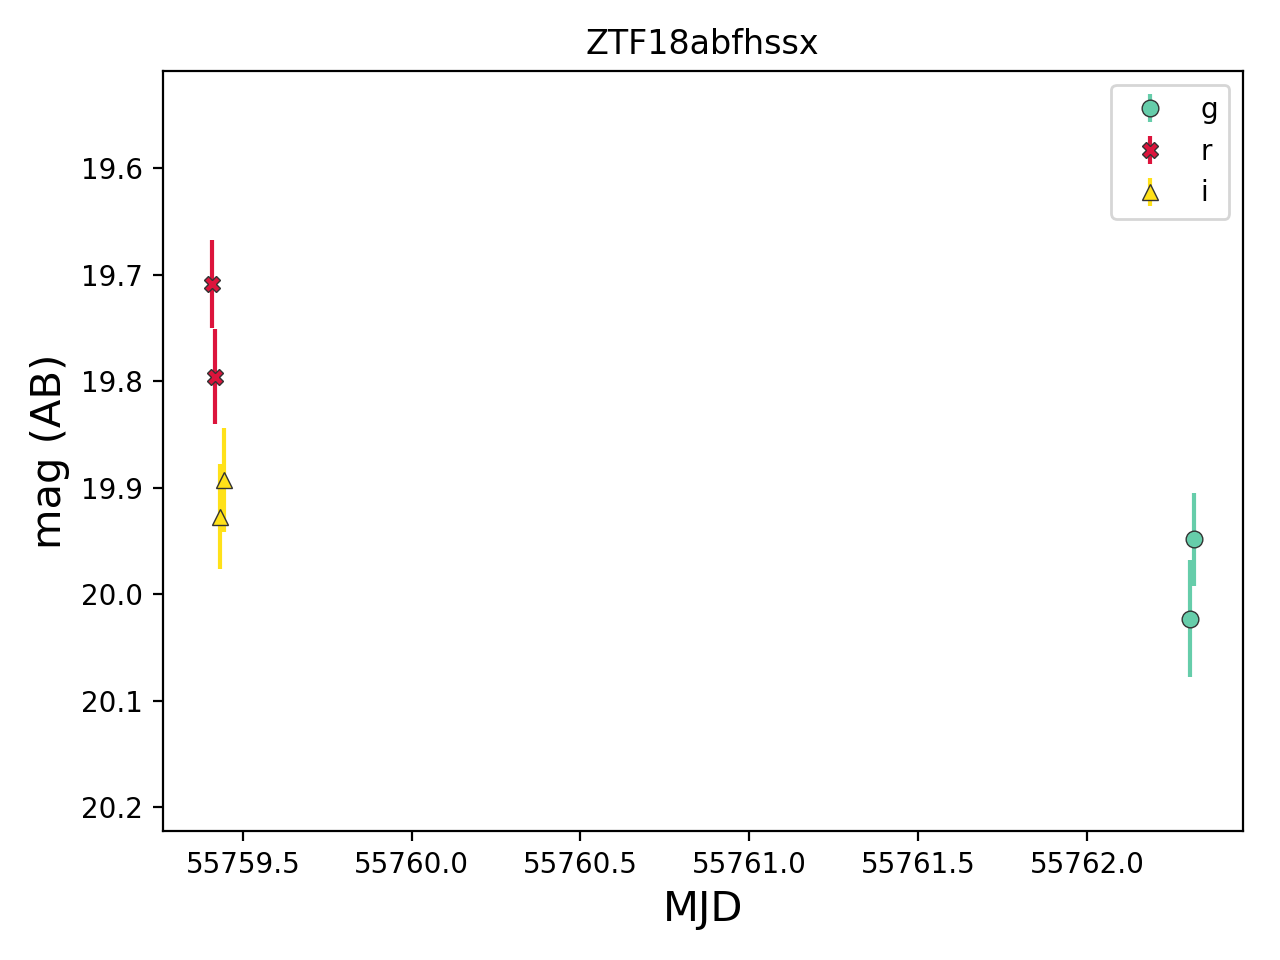

<IPython.core.display.Javascript object>


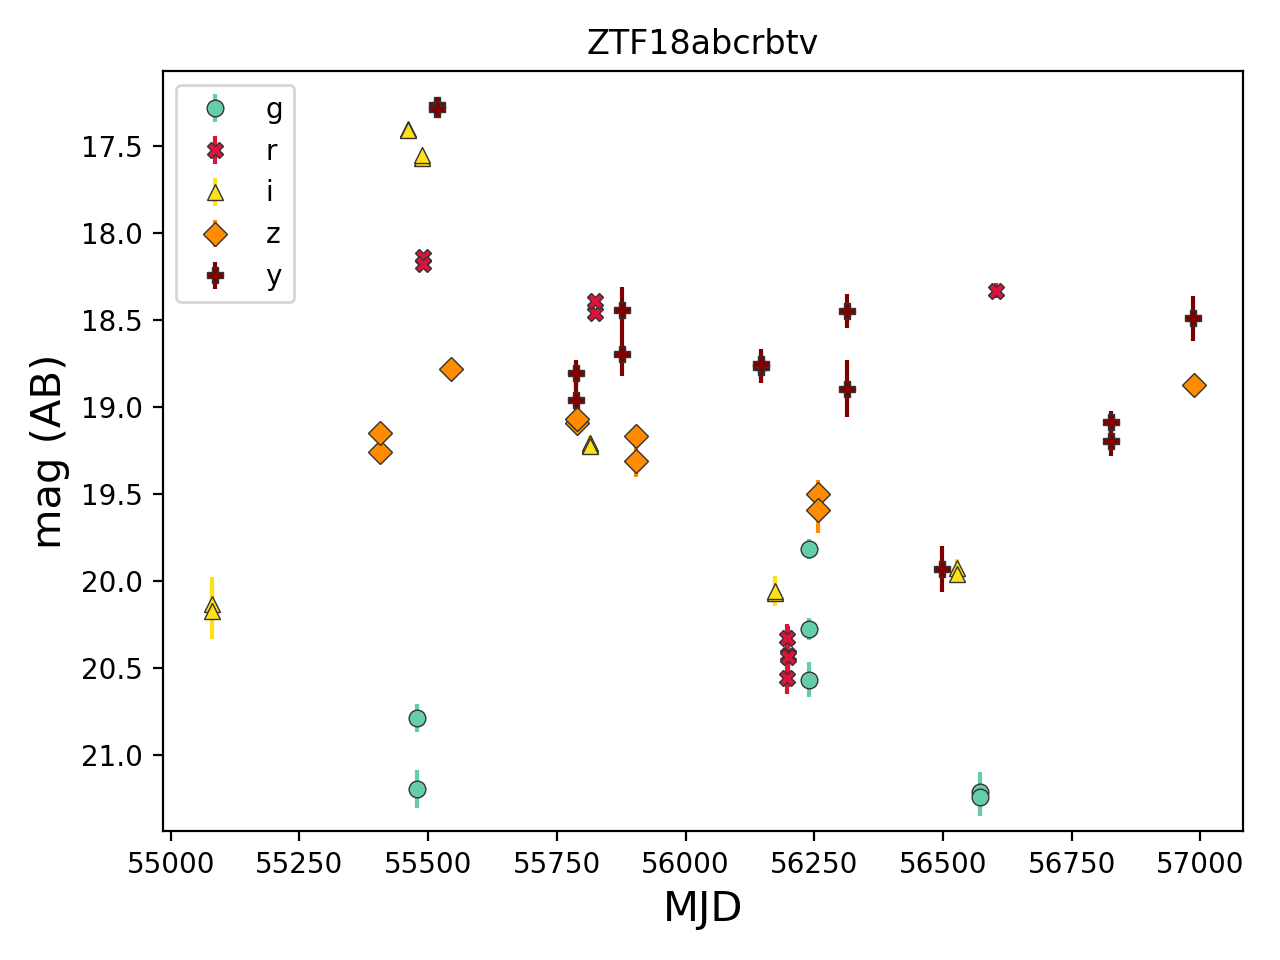

<IPython.core.display.Javascript object>


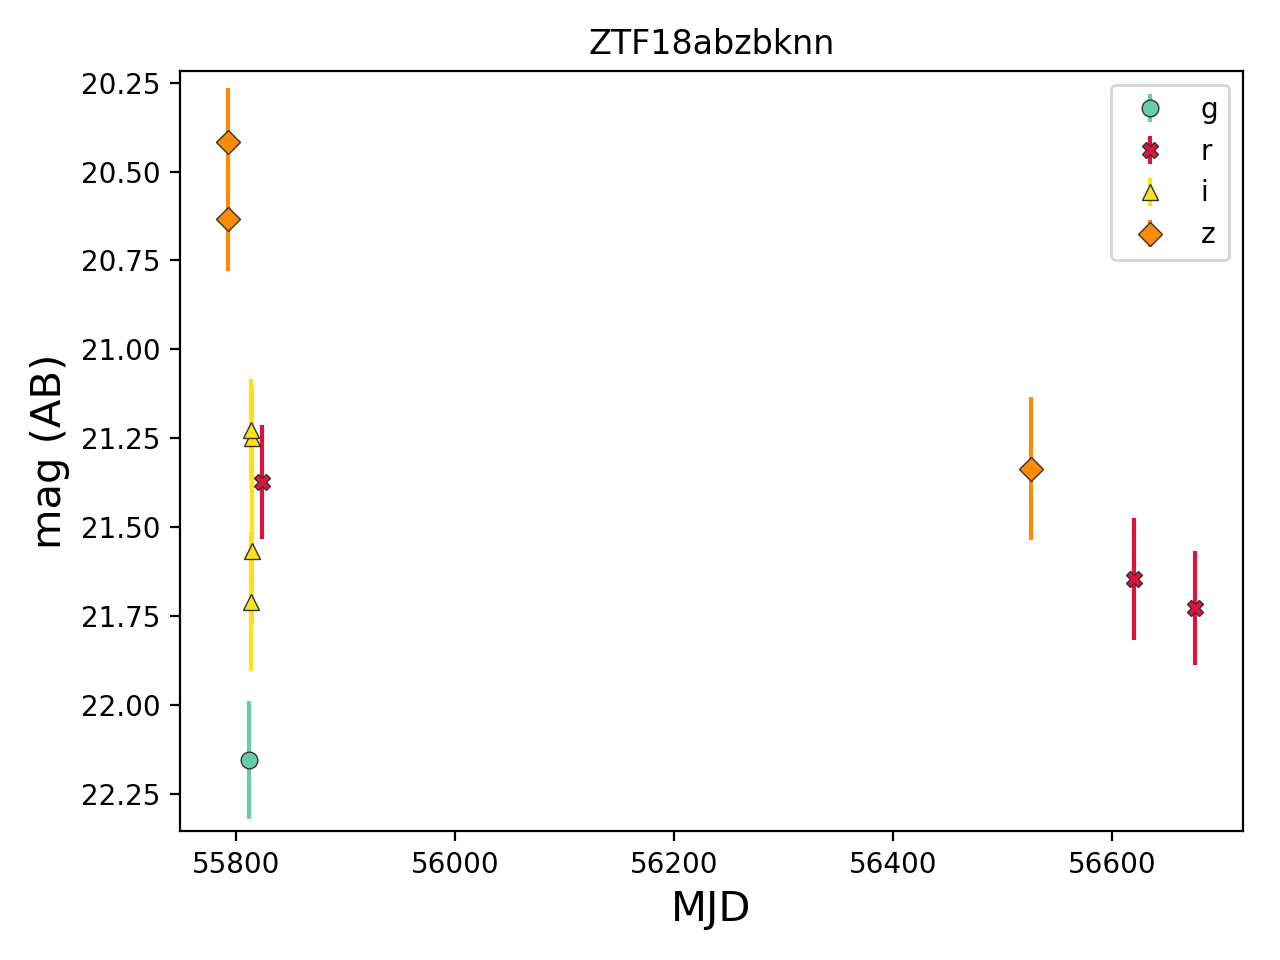

<IPython.core.display.Javascript object>


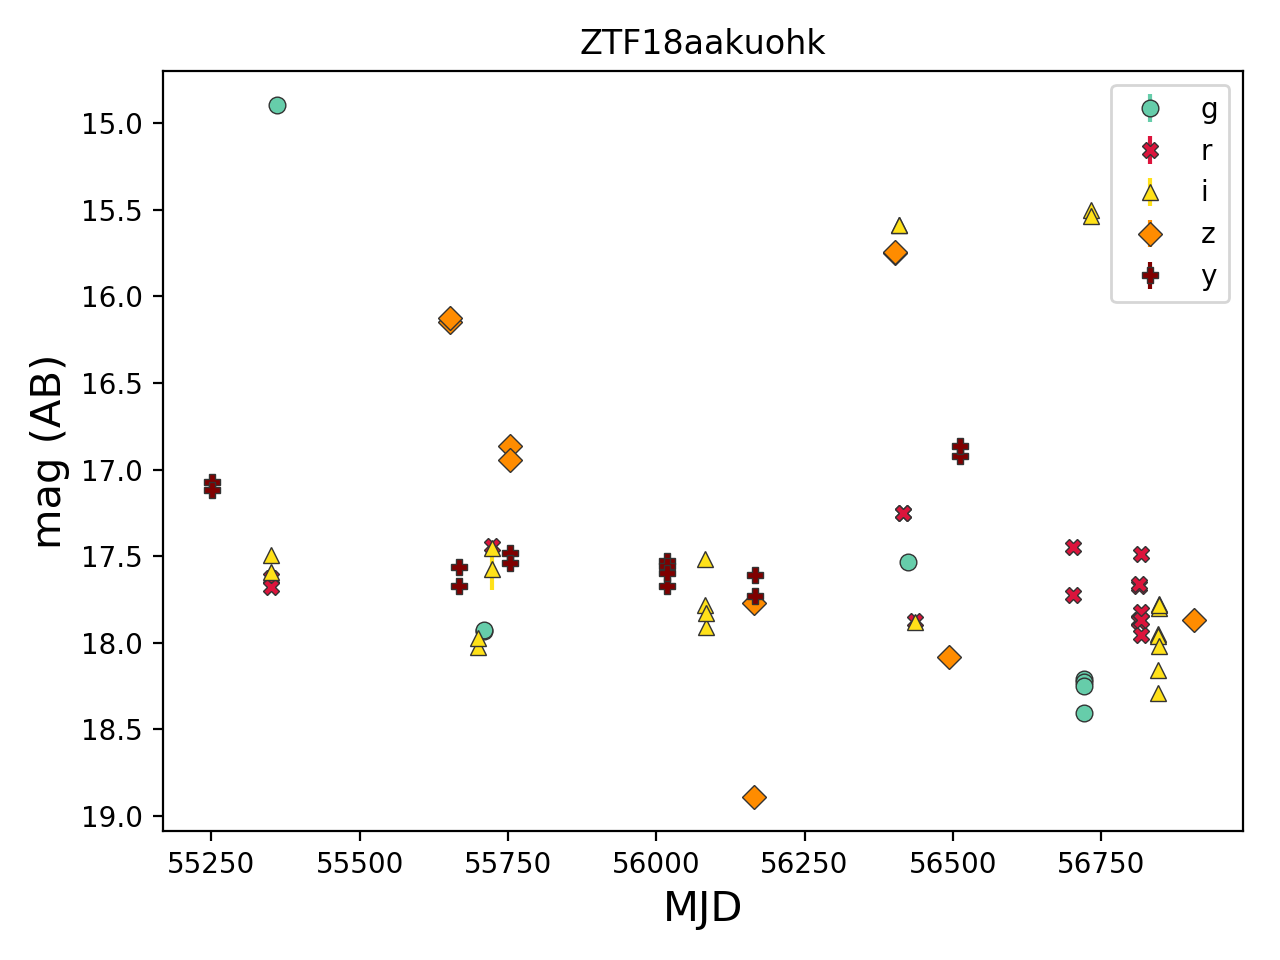

<IPython.core.display.Javascript object>


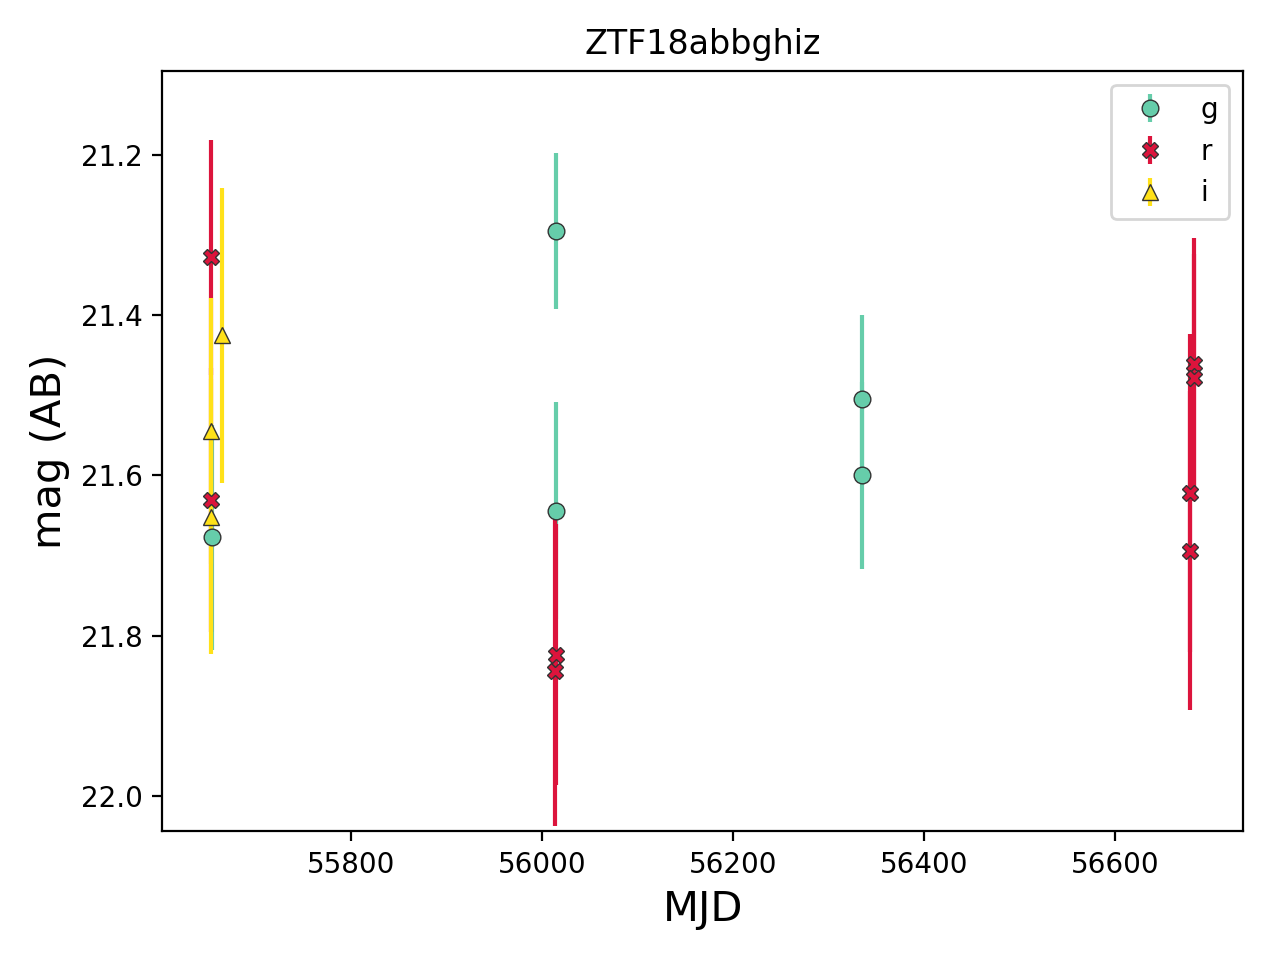

<IPython.core.display.Javascript object>


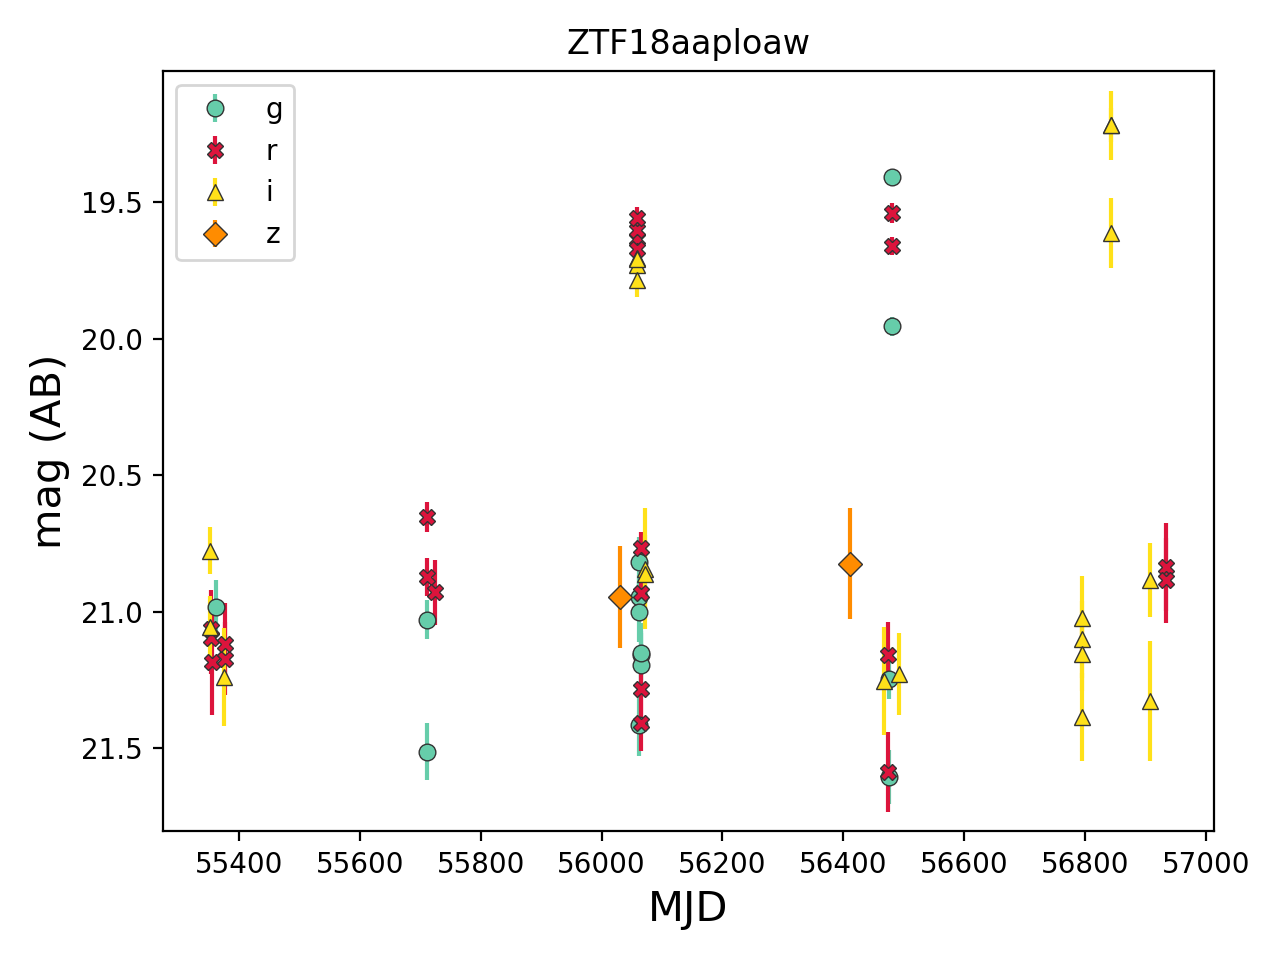

<IPython.core.display.Javascript object>


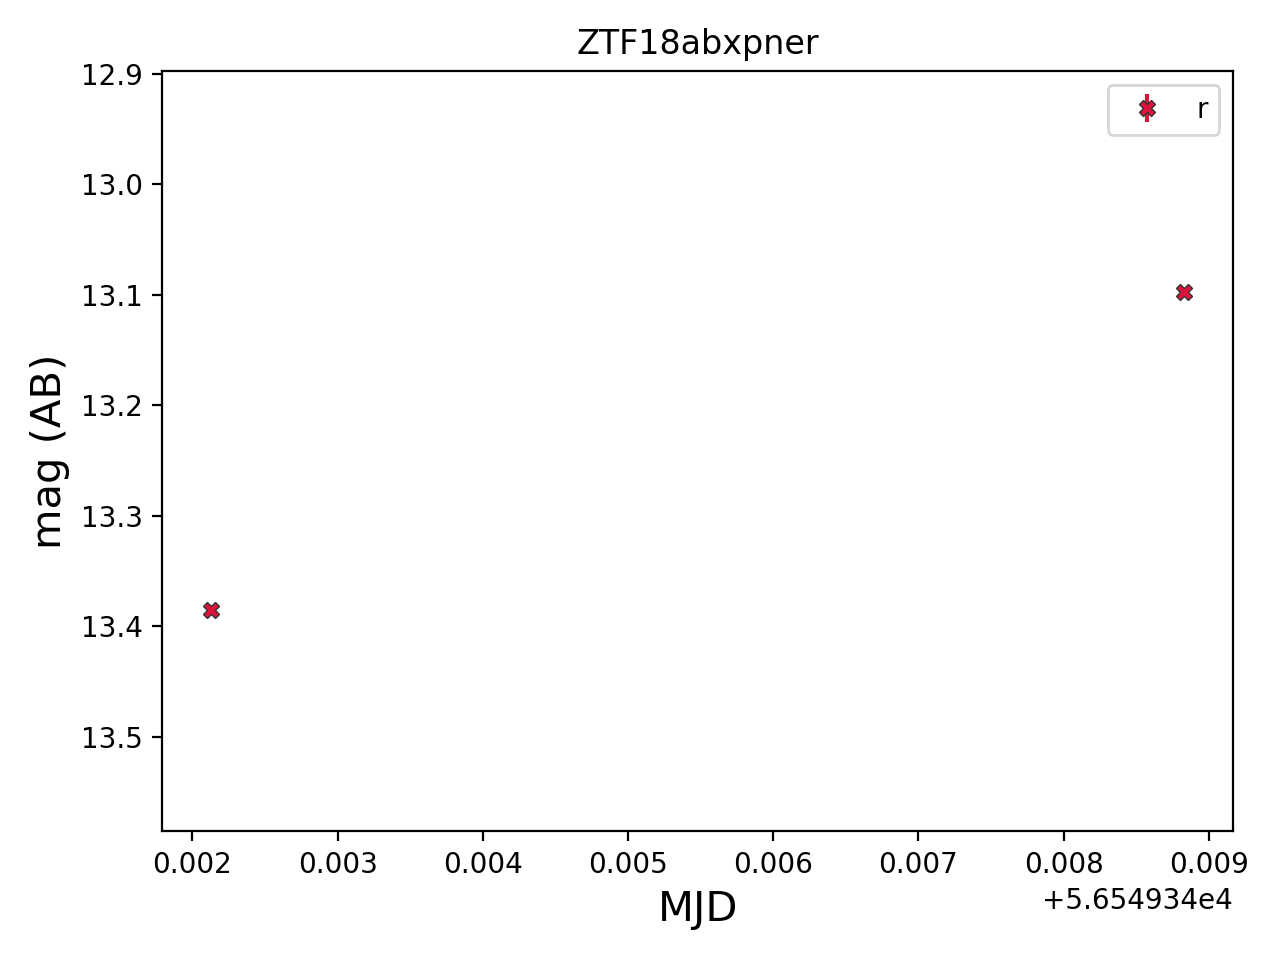

<IPython.core.display.Javascript object>


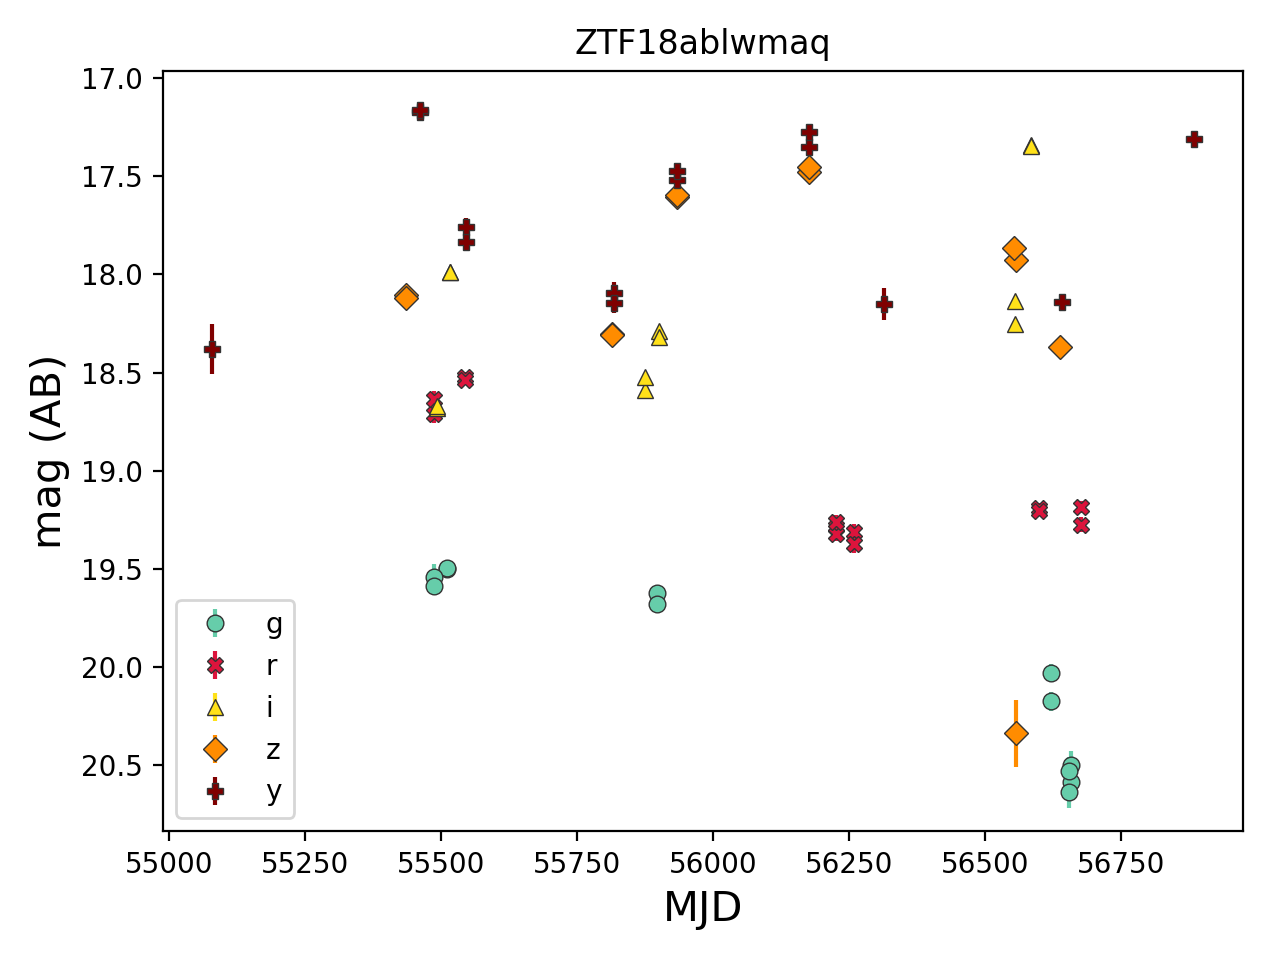

<IPython.core.display.Javascript object>


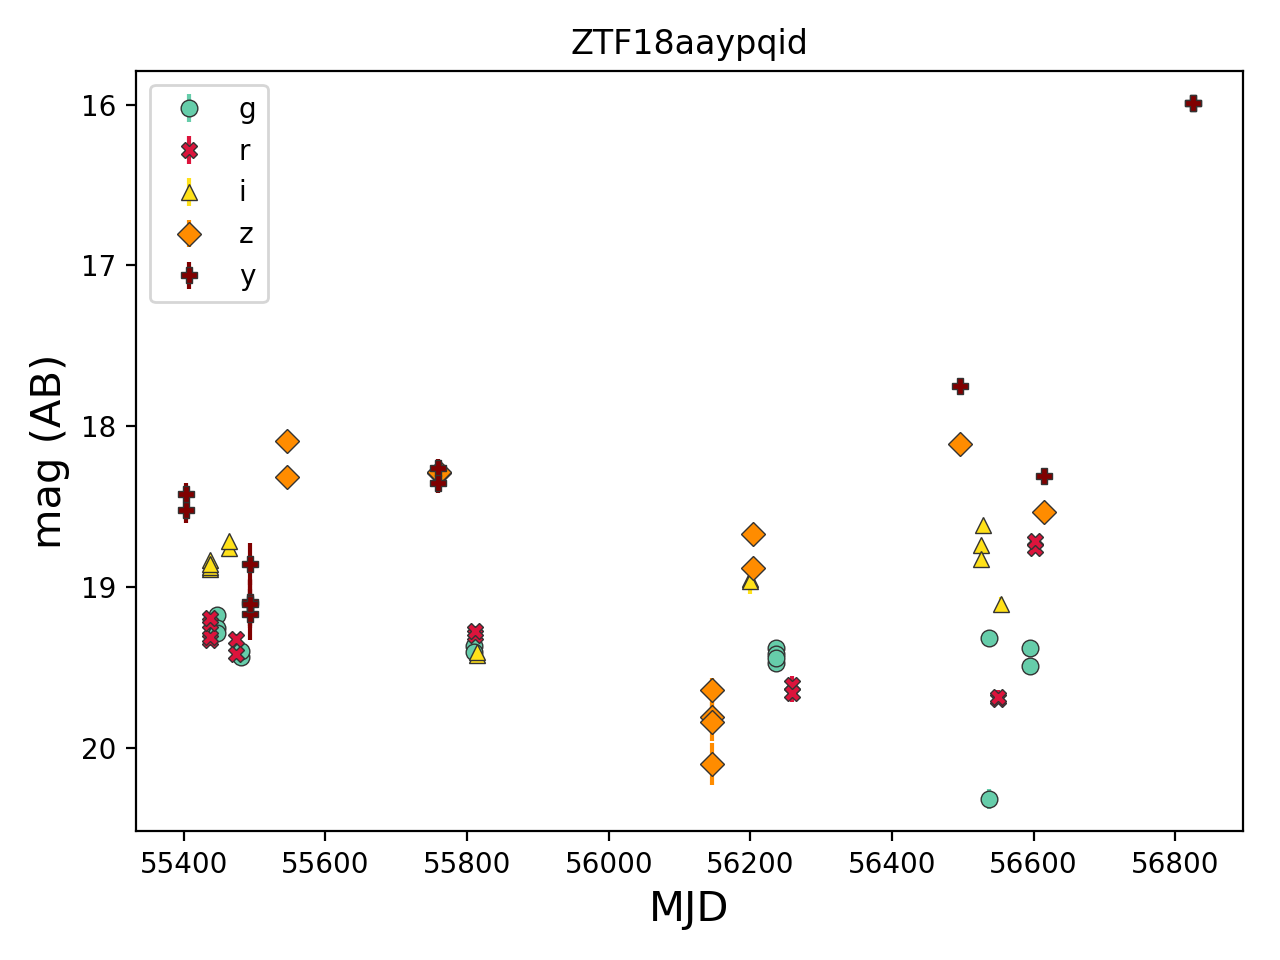

<IPython.core.display.Javascript object>


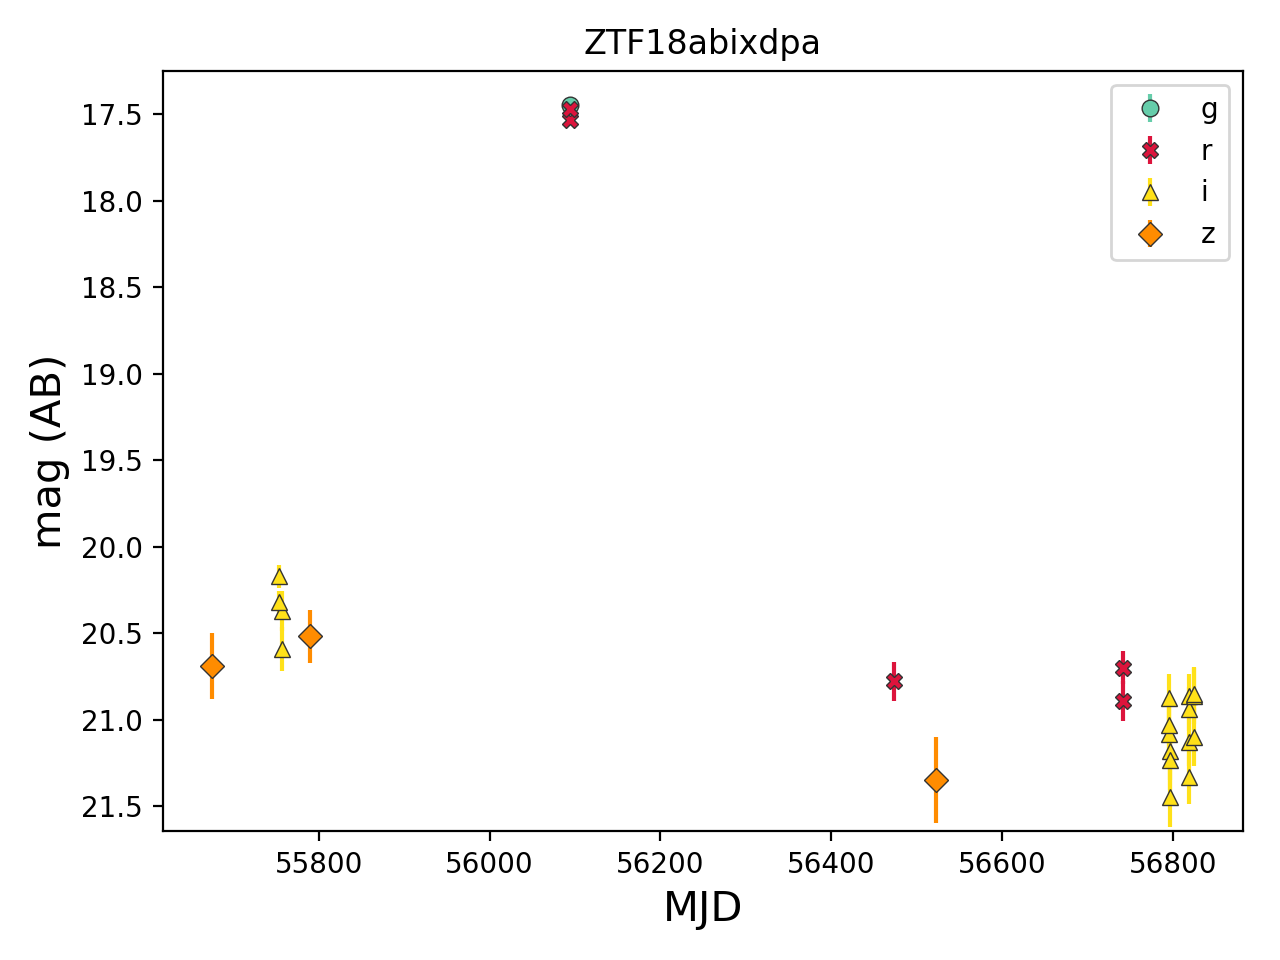

<IPython.core.display.Javascript object>


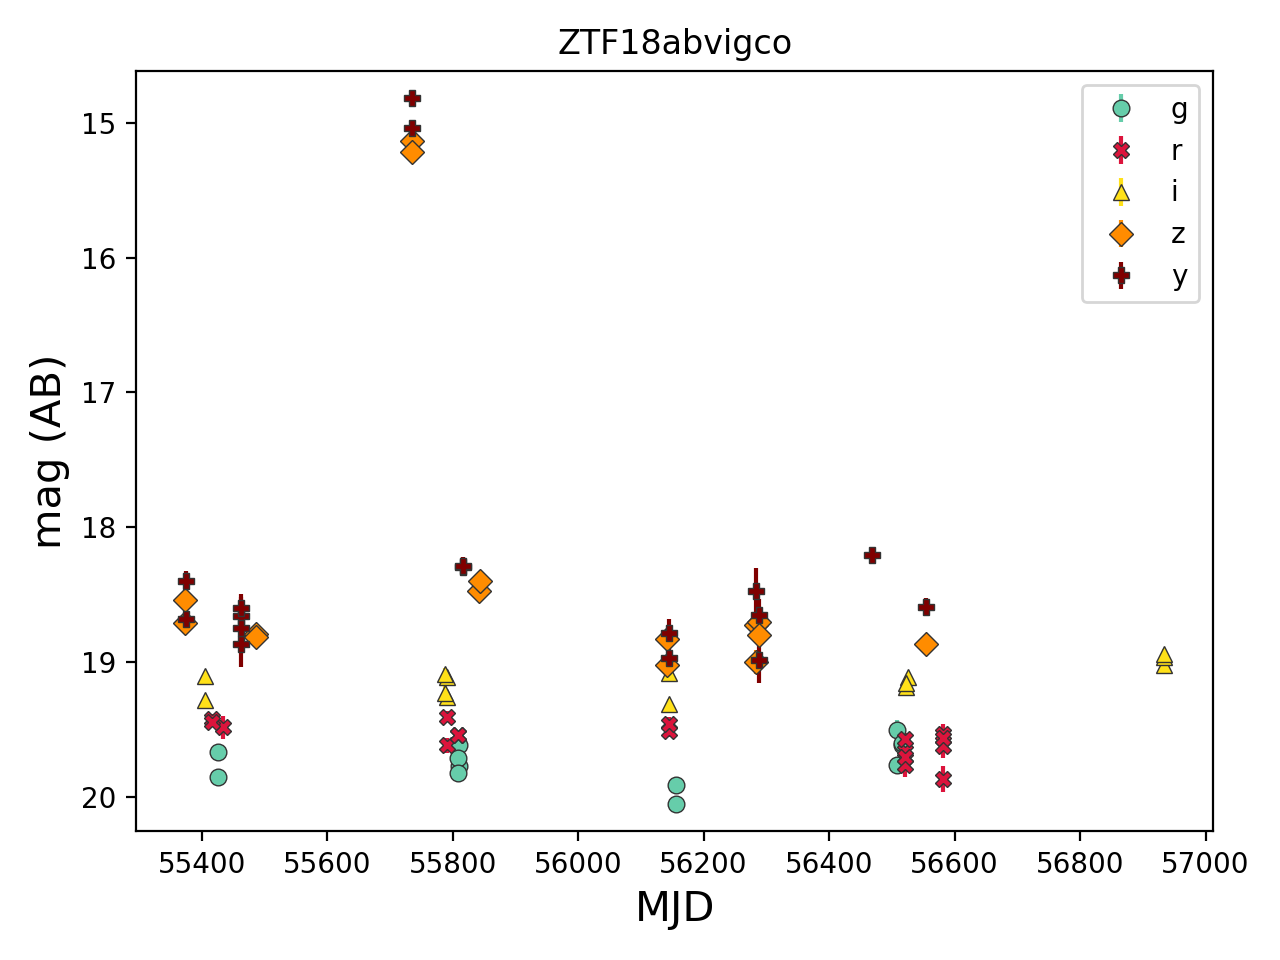

In [28]:
pdf = matplotlib.backends.backend_pdf.PdfPages("PS1_CVs.pdf")

for cv in df.name.unique():
    cv_rows = np.where(df.name == cv)
    fig, ax = plt.subplots()
    min_brightness = -1e6
    max_brightness = 1e6
    color_dict = {1: 'MediumAquaMarine',
                  2: 'Crimson',
                  3: '#ffe119',
                  4: 'DarkOrange',
                  5: '#800000'}
    filt_dict = {1: 'g',
                 2: 'r',
                 3: 'i',
                 4: 'z',
                 5: 'y'}
    sym_dict = {1: 'o',
                2: 'X',
                3: '^',
                4: 'D',
                5: 'P'}
    for filt in [1,2,3,4,5]:
        filt_rows = np.where((df.name == cv) & 
                             (df.filterID == filt) & 
                             (df.psfFlux > 0))
        if len(filt_rows[0]) > 0:
            mjd = df.obsTime.iloc[filt_rows]
            mag = 8.9 - 2.5*np.log10(df.psfFlux.iloc[filt_rows])
            mag_unc = 2.5/np.log(10)*df.psfFluxErr.iloc[filt_rows]/df.psfFlux.iloc[filt_rows]
            ax.errorbar(mjd, mag, mag_unc, 
                        mec='0.2', mew=0.5, 
                        fmt=sym_dict[filt], 
                        color=color_dict[filt],
                        label=filt_dict[filt])
            min_brightness = np.max(np.append(mag, min_brightness))
            max_brightness = np.min(np.append(mag, max_brightness))
    ax.set_ylim(min_brightness+0.2, max_brightness-0.2)
    ax.set_ylabel('mag (AB)', fontsize=15)
    ax.set_xlabel('MJD', fontsize=15)
    ax.set_title('{}'.format(str(cv)[2:-1]))
    ax.legend(fancybox=True)
    fig.tight_layout()
    pdf.savefig( fig )
pdf.close()